# In What Electoral System Would Donald Trump Have Won The 2020 US Election?

## Introduction

The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

As the fact is that Joe Biden won in the 2020 election, the goal of the paper is to find out whether there exists any electoral system which would have allowed Donald Trump to win in the 2020 election based the original votes.

The proposed electoral systems in this paper ALL have a common presumption, that the voting unit (county or state) which will be responsible to cast ALL of its votes to one candidate. This concept, known as the "winner-take-all" principle, is similar to the existing voting system in 48 of the 50 states and Washington, D.C. in the US.

As data analysis shows that Republican voters are disproportionally located in rural areas and small cities, the 4 electoral systems proposed in the paper all put higher focus on the number of voting unit (county or state), instead of the population of voting unit (county or state). Therefore, 3 of 4 electoral systems makes Donald to win in the 2020 election.

### Variables
- Input $X_1$: Raw votes of Joe Biden (the Democratic Party) in counties
- Input $X_2$: Raw votes of Donald Trump (the Republican Party) in counties
- Input $X_3$: Raw total votes in counties
-- $X_1$, $X_2$ and $X_3$ are all vectors, each component $X_{1,i}$, $X_{2,i}$, $X_{3,i}$, where i $\in$ [1,n], represents the raw votes of DEM, the raw votes of REP and the raw total votes in a specific county, n is the count of counties.
- Output $Y_1$: Fabricated Votes of Joe Biden (the Democratic Party) in US
- Output $Y_2$: Fabricated Votes of Donald Trump (the Republican Party) in US

* **Electoral System I - Elect By County**
Each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes.
According to the Electoral System I,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > $X_1$), X_{3,i}, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), X_{3,i}, 0) $$

* **Electoral System II - Elect By County**
Each county has one vote, it casts its vote on the party (candidate) that won the majority of votes.**
According to the Electoral System II,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > X_{2,i}), 1, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), 1, 0) $$

* **Electoral System III - Elect By State**
Each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties.
According to the Electoral System III,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), TVofState_{i}, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), TVofState_{i}, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} ((if (X_{1,j} < X_{2,j}), 1, 0) $$

$$ TVofState_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} X_{3,j} $$

* **Electoral System IV - Elect By State**
Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties.
According to the Electoral System IV,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), 1, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), 1, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} < X_{2,j}), 1, 0) $$

## Data Cleaning/Loading

### Datasets used in this article
1. Kaggle: US Election 2020
    The information includes, states, counties, candidates, parties, and their respective votes.
2. SimpleMaps: US cities except for District of Columbia
    The information includes counties' latitude, and longitude.
3. Census Reporter: District of Columbia
    The information includes 8 Wards of District of Columbia for their latitude, and longitude.
    Note: This information was searched manually, and is manually entered onto the second dataset.

### Data Loading

In [44]:
import pandas as pd
import numpy as np; np.random.seed(42)
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import requests
from bs4 import BeautifulSoup
import re

*Note a wrong data in president_county_candidate.csv: Maine, Glenwood Plt., Donald Trump, corrected based on
https://www.nytimes.com/interactive/2020/11/03/us/elections/results-maine.html

In [181]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [46]:
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_pc.head()

state             county  current_votes  total_votes  \
0              Delaware        Kent County          87025        87025   
1              Delaware  New Castle County         287633       287633   
2              Delaware      Sussex County         129352       129352   
3  District of Columbia             Ward 1          41681        41681   
4  District of Columbia             Ward 2          32881        32881   

   percent  
0      100  
1      100  
2      100  
3      100  
4      100

In [47]:
df_ps = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_state.csv')
df_ps.head()

state  total_votes
0              Delaware       504010
1  District of Columbia       344356
2               Florida     11067456
3               Georgia      4997716
4                Hawaii       574469

In [48]:
df_county_population = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/2020_county_population.csv')
df_county_population.head()

state   county  population
0  Alabama  Autauga     42496.0
1  Alabama  Baldwin    171296.0
2  Alabama  Barbour     19804.0
3  Alabama     Bibb     17790.0
4  Alabama   Blount     44383.0

In [49]:
df_white = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_white_population.csv')
df_white.head()

state   county White Population (%)
0  Alabama  Autauga           73.6091458
1  Alabama  Baldwin           83.6669937
2  Alabama  Barbour           47.5911394
3  Alabama     Bibb             74.83032
4  Alabama   Blount           87.5669009

In [50]:
df_voter = pd.read_csv(
    '/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/2020 November General Election - Turnout Rates.csv')
df_voter.head()

State                                             Source  \
0  United States                                                NaN   
1        Alabama  https://www2.alabamavotes.gov/electionnight/st...   
2         Alaska  https://www.elections.alaska.gov/results/20GEN...   
3        Arizona       https://results.arizona.vote/#/featured/18/0   
4       Arkansas  https://results.enr.clarityelections.com/AR/10...   

  Official/Unofficial Total Ballots Counted (Estimate)  \
0                 NaN                      158,835,004   
1          Unofficial                        2,306,587   
2                 NaN                          367,000   
3                 NaN                        3,400,000   
4          Unofficial                        1,212,030   

  Vote for Highest Office (President) VEP Turnout Rate  \
0                                 NaN            66.4%   
1                           2,297,295            62.6%   
2                                 NaN            69.8%   
3                                 NaN            65.5%   
4                           1,206,697            55.5%   

  Voting-Eligible Population (VEP) Voting-Age Population (VAP) % Non-citizen  \
0                      239,247,182                 257,605,088          7.8%   
1                        3,683,055                   3,837,540          2.3%   
2                          525,568                     551,117          3.4%   
3                        5,189,000                   5,798,473          8.9%   
4                        2,182,375                   2,331,171          3.6%   

      Prison  Probation   Parole Total Ineligible Felon Overseas Eligible  \
0  1,461,074  1,962,811  616,440              3,294,457         4,971,025   
1     25,898     50,997   10,266                 67,782               NaN   
2      4,293      2,074    1,348                  6,927               NaN   
3     38,520     76,844    7,536                 93,699               NaN   
4     17,510     36,719   24,698                 64,974               NaN   

  State Abv  
0       NaN  
1        AL  
2        AK  
3        AZ  
4        AR

In [51]:
df_county_vap = pd.read_csv("/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_VAP.csv")
df_county_vap['VAP'] = df_county_vap['VAP'].replace(',', '',regex=True).astype(int)
df_county_vap.head()

state   county     VAP
0  Alabama  Autauga   44523
1  Alabama  Baldwin  182471
2  Alabama  Barbour   20134
3  Alabama     Bibb   17533
4  Alabama   Blount   45403

In [52]:
df_trump_vote = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/trump_vote_2020.csv')
df_trump_vote.head()

state     TRUE    FALSE  Grand Total
0    California   709784  5296177      6005961
1         Texas  3382177  2508170      5890347
2       Florida  3070400  2598331      5668731
3  Pennsylvania  1913864  1464399      3378263
4      New York  1324507  1925723      3250230

In [53]:
df_age = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/age.csv')
df_age.head()

NAME  Median Age (years)
0     Alabama                39.8
1      Alaska                35.6
2     Arizona                30.1
3    Arkansas                37.4
4  California                24.7

In [54]:
df_unemployment = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/unemployment_rate.csv')
df_unemployment.head()

State Unemployment Rate
0     Alabama             3.10%
1      Alaska             4.30%
2     Arizona             3.50%
3    Arkansas             3.20%
4  California             5.20%

In [55]:
df_county_unemployment = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/laucnty20.csv')

df_county_unemployment.head()

State_ab   county  Labor Force  Employed  Unemployed  Unemployment Rate (%)
0       AL  Autauga        26405     24985        1420                    5.4
1       AL  Baldwin        98910     92751        6159                    6.2
2       AL  Barbour         8680      8004         676                    7.8
3       AL     Bibb         8712      8073         639                    7.3
4       AL   Blount        25116     23973        1143                    4.6

In [56]:
usa = gpd.read_file('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')
usa.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS       NAME LSAD          ALAND  \
0      22  01629543  0400000US22    22     LA  Louisiana   00   111915258185   
1      02  01785533  0400000US02    02     AK     Alaska   00  1478942847588   
2      24  01714934  0400000US24    24     MD   Maryland   00    25151992308   
3      55  01779806  0400000US55    55     WI  Wisconsin   00   140292321657   
4      12  00294478  0400000US12    12     FL    Florida   00   138961722096   

         AWATER                                           geometry  
0   23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  
1  245378425142  MULTIPOLYGON (((179.48132 51.97530, 179.58286 ...  
2    6979074857  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
3   29343646672  MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ...  
4   45972570361  MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...

In [57]:
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
df_geo.head()

city   city_ascii state_id  state_name  county_fips  county_name  \
0     New York     New York       NY    New York        36081       Queens   
1  Los Angeles  Los Angeles       CA  California         6037  Los Angeles   
2      Chicago      Chicago       IL    Illinois        17031         Cook   
3        Miami        Miami       FL     Florida        12086   Miami-Dade   
4       Dallas       Dallas       TX       Texas        48113       Dallas   

       lat       lng  population  density source  military  incorporated  \
0  40.6943  -73.9249    18680025  10768.0  shape     False          True   
1  34.1141 -118.4068    12531334   3267.0  shape     False          True   
2  41.8375  -87.6866     8586888   4576.0  shape     False          True   
3  25.7840  -80.2101     6076316   4945.0  shape     False          True   
4  32.7935  -96.7667     5910669   1522.0  shape     False          True   

              timezone  ranking  \
0     America/New_York        1   
1  America/Los_Angeles        1   
2      America/Chicago        1   
3     America/New_York        1   
4      America/Chicago        1   

                                                zips          id  
0  11229 11228 11226 11225 11224 11222 11221 1122...  1840034016  
1  91367 90291 90293 90292 91316 91311 90035 9003...  1840020491  
2  60018 60649 60641 60640 60643 60642 60645 6064...  1840000494  
3  33128 33129 33125 33126 33127 33149 33144 3314...  1840015149  
4  75098 75287 75230 75231 75236 75237 75235 7525...  1840019440

Since the geographical coordinates are incomplete with the above dataset, here I will include another dataset from Wikipedia that provides addition coordinates on the counties with missing data. As this data is important for almost all analysis, including those at the early stage of the project, I decided to move this part to the upfront.

In [58]:
web_url = 'https://en.wikipedia.org/wiki/User:Michael_J/County_table'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)

data_table = soup_object.find_all('table', 'wikitable sortable')[0]
all_values = data_table.find_all('tr')

col_names = df_geo.columns.tolist()
county_geo = pd.DataFrame(columns=col_names)
ix = 0
for row in all_values[1:]:
    values = row.find_all('td')
    state_id = values[1].text.split("\n")[0]
    county_fips = int(values[2].text.split("\n")[0])
    county_name = values[3].text.split("\n")[0]
    lat = float(values[12].text.split("\n")[0].replace('+', '').replace('°', ''))
    lng = float(values[13].text.split("\n")[0].replace('–', '').replace('°', ''))
    #population = values[5].text.split("\n")[0].astype(int)*1.074

    county_geo.loc[ix] = ['', '', state_id, '', county_fips, county_name, lat, lng,'','', '', '', '', '', '', '', '', ]
    ix += 1

county_geo.head()

city city_ascii state_id state_name  county_fips county_name        lat  \
0                       AL                    1001     Autauga  32.536382   
1                       AL                    1003     Baldwin  30.659218   
2                       AL                    1005     Barbour  31.870670   
3                       AL                    1007        Bibb  33.015893   
4                       AL                    1009      Blount  33.977448   

         lng population density source military incorporated timezone ranking  \
0  86.644490                                                                    
1  87.746067                                                                    
2  85.405456                                                                    
3  87.127148                                                                    
4  86.567246                                                                    

  zips id  
0          
1          
2          
3          
4

In [59]:
# assuming df1 and df2 are the two data frames you have
merged_df = pd.concat([df_geo, county_geo], ignore_index=True)

# drop duplicates based on state_id and county_name columns
merged_df.drop_duplicates(subset=['state_id', 'county_name'], inplace=True)
merged_df.head()

city   city_ascii state_id  state_name  county_fips  county_name  \
0     New York     New York       NY    New York        36081       Queens   
1  Los Angeles  Los Angeles       CA  California         6037  Los Angeles   
2      Chicago      Chicago       IL    Illinois        17031         Cook   
3        Miami        Miami       FL     Florida        12086   Miami-Dade   
4       Dallas       Dallas       TX       Texas        48113       Dallas   

       lat       lng population  density source military incorporated  \
0  40.6943  -73.9249   18680025  10768.0  shape    False         True   
1  34.1141 -118.4068   12531334   3267.0  shape    False         True   
2  41.8375  -87.6866    8586888   4576.0  shape    False         True   
3  25.7840  -80.2101    6076316   4945.0  shape    False         True   
4  32.7935  -96.7667    5910669   1522.0  shape    False         True   

              timezone ranking  \
0     America/New_York       1   
1  America/Los_Angeles       1   
2      America/Chicago       1   
3     America/New_York       1   
4      America/Chicago       1   

                                                zips          id  
0  11229 11228 11226 11225 11224 11222 11221 1122...  1840034016  
1  91367 90291 90293 90292 91316 91311 90035 9003...  1840020491  
2  60018 60649 60641 60640 60643 60642 60645 6064...  1840000494  
3  33128 33129 33125 33126 33127 33149 33144 3314...  1840015149  
4  75098 75287 75230 75231 75236 75237 75235 7525...  1840019440

In [60]:
pd.set_option('display.max_columns', None)

### Data Cleaning
#### Electoral System

##### Step 1: Remove the rows of US Election 2020 where the candidate did not win

In [61]:
df['county'] = df['county'].str.replace(' County', '')
df_pc['county'] = df_pc['county'].str.replace(' County', '')

##### Step 2: Match the geographical coordinates with votes

df_copy = df.copy()
df_pc_copy = df_pc.copy()

df_geo_copy = merged_df.copy()
df_geo_copy.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo_copy.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_copy.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = df_geo.copy()
df_geo_pop.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population'], axis = 1, inplace = True)
df_geo_pop.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_pop.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = pd.merge(df_geo_pop, df_county_population, on=['state', 'county'], how='left')

df_county_statistics = pd.merge(df_copy, df_geo_copy, on=['county', 'state'], how = 'left')
df_pc_copy.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county = df_county_statistics.copy()
df_county.drop(df_copy[df_copy['won'] == False].index, inplace = True)
df_county.reset_index(inplace=True)
df_county['total_votes'] = df_pc_copy['current_votes']
df_county.drop(['index'], axis = 1, inplace = True)
df_county.head()

In [62]:
df_copy = df.copy()
df_pc_copy = df_pc.copy()

df_geo_copy = merged_df.copy()
df_geo_copy.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo_copy.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_copy.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = df_geo.copy()
df_geo_pop.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis = 1, inplace = True)
df_geo_pop.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_pop.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)

df_county_statistics = pd.merge(df_copy, df_geo_copy, on=['county', 'state'], how = 'left')
df_pc_copy.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county = df_county_statistics.copy()
df_county.drop(df_copy[df_copy['won'] == False].index, inplace = True)
df_county.reset_index(inplace=True)
df_county['total_votes'] = df_pc_copy['current_votes']
df_county.drop(['index'], axis = 1, inplace = True)
df_county.head()

state      county     candidate party  total_votes   won  \
0              Delaware        Kent     Joe Biden   DEM        87025  True   
1              Delaware  New Castle     Joe Biden   DEM       287633  True   
2              Delaware      Sussex  Donald Trump   REP       129352  True   
3  District of Columbia      Ward 1     Joe Biden   DEM        41681  True   
4  District of Columbia      Ward 2     Joe Biden   DEM        32881  True   

       lat      lng  
0  39.1610 -75.5202  
1  39.7415 -75.5416  
2  38.9091 -75.4227  
3  38.9072 -77.0369  
4  38.9063 -77.0340

In [177]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        4633 non-null   object 
 1   county       4633 non-null   object 
 2   candidate    4633 non-null   object 
 3   party        4633 non-null   object 
 4   total_votes  4633 non-null   int64  
 5   won          4633 non-null   bool   
 6   lat          2985 non-null   float64
 7   lng          2985 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 258.0+ KB


##### Step 3: Calculating data for summary statistics table

In [63]:
df_county_won = df_county.copy()
df_county_won.drop(df_county_won[df_county_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_won.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_won.rename(columns={"total_votes": "county_total_votes"}, inplace = True)
df_county_won = pd.merge(df_county_won, df_copy, on=['county', 'state', 'candidate', 'party', 'won'], how='left')
df_county_won.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_won = df_county_won[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_won['share of votes in the winning counties'] = \
    df_county_won['won_votes'] / df_county_won['county_total_votes']
df_county_won.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True      71230   
1   Florida     Baker  Donald Trump   REP  True      11911   
2   Florida       Bay  Donald Trump   REP  True      66097   
3   Florida  Bradford  Donald Trump   REP  True      10334   
4   Florida   Brevard  Donald Trump   REP  True     207883   

   county_total_votes  share of votes in the winning counties  
0              129352                                0.550668  
1               14059                                0.847215  
2               93024                                0.710537  
3               13632                                0.758069  
4              360764                                0.576230

In [64]:
df_county_lost = df_county_statistics.copy()
df_county_lost.drop(df_copy[df_copy['won'] == True].index, inplace = True)
df_county_lost.drop(df_county_lost[df_county_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_lost.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_lost.reset_index(inplace=True)
df_county_lost.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_lost = pd.merge(df_county_lost, df_pc_copy, on = ['state', 'county'], how = 'left')
df_county_lost.rename(columns={"current_votes": "county_total_votes"}, inplace = True)
df_county_lost.drop(['index'], axis = 1, inplace = True)
df_county_lost = df_county_lost[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_lost['share of votes in the losing counties'] =\
    df_county_lost['won_votes'] / df_county_lost['county_total_votes']
df_county_lost.head()

state      county     candidate party    won  won_votes  \
0              Delaware        Kent  Donald Trump   REP  False      41009   
1              Delaware  New Castle  Donald Trump   REP  False      88364   
2  District of Columbia      Ward 1  Donald Trump   REP  False       1725   
3  District of Columbia      Ward 2  Donald Trump   REP  False       2918   
4  District of Columbia      Ward 3  Donald Trump   REP  False       3705   

   county_total_votes  share of votes in the losing counties  
0               87025                               0.471232  
1              287633                               0.307211  
2               41681                               0.041386  
3               32881                               0.088744  
4               44231                               0.083765

For Electoral System I and II, in which the county is the vote casting level, data cleaning is done. They share the same dataframe for plotting purposes.

For Electoral System III and IV, in which the state is the vote casting level, continue the following steps:

##### Step 4: Calculate the number of counties won by each candidate in each state.

In [65]:
df_state = df_copy.groupby(["state", "candidate", "party"]).sum(numeric_only = True)
df_state.rename(columns={"won": "# of counties won"}, inplace = True)
df_state.index = [df_state.index.get_level_values(0),
                  df_state.index.get_level_values(1),
                  df_state.index.get_level_values(2)]
df_state = df_state.reset_index() \
       .sort_values(['state','# of counties won'], ascending=[True,False]) \
       .set_index(['state','party'])
df_state.drop(['total_votes'], axis = 1, inplace = True)
df_state.head()

candidate  # of counties won
state   party                                 
Alabama REP    Donald Trump                 54
        DEM       Joe Biden                 13
        WRI       Write-ins                  0
        LIB    Jo Jorgensen                  0
Alaska  REP    Donald Trump                 20

##### Step 5: Keep the candidate of the highest voting only

In [66]:
df_state1 = df_state.copy()
df_state1.reset_index(inplace=True)
df_state1.drop_duplicates(
  subset = ['state'],
  keep = 'first', inplace = True)
df_state1 = df_state1.reset_index(drop=True)
df_state1.head()

state party     candidate  # of counties won
0     Alabama   REP  Donald Trump                 54
1      Alaska   REP  Donald Trump                 20
2     Arizona   REP  Donald Trump                 10
3    Arkansas   REP  Donald Trump                 67
4  California   DEM     Joe Biden                 35

##### Step 6: Replace all candidates and parties' name by the winner of each state, because now all the votes of a state belongs to the winner

In [67]:
df_state2 = df_county.copy()
df_state2.drop(['candidate'], axis = 1, inplace = True)
df_state2.drop(['party'], axis = 1, inplace = True)
df_state2 = pd.merge(df_state2, df_state1, on = 'state', how = 'left')
df_state2.head()

state      county  total_votes   won      lat      lng  \
0              Delaware        Kent        87025  True  39.1610 -75.5202   
1              Delaware  New Castle       287633  True  39.7415 -75.5416   
2              Delaware      Sussex       129352  True  38.9091 -75.4227   
3  District of Columbia      Ward 1        41681  True  38.9072 -77.0369   
4  District of Columbia      Ward 2        32881  True  38.9063 -77.0340   

  party  candidate  # of counties won  
0   DEM  Joe Biden                  2  
1   DEM  Joe Biden                  2  
2   DEM  Joe Biden                  2  
3   DEM  Joe Biden                  8  
4   DEM  Joe Biden                  8

##### Step 7: Generate geodataframe for US mainland maps

In [68]:
gpd_state = usa[~usa["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]
gpd_state = gpd_state.copy()
gpd_state.sort_values(by=['NAME'], ascending=True, axis=0, inplace =True)
df_state1_merge = df_state1.rename(columns={"state": "NAME"})
gpd_state = pd.merge(gpd_state, df_state1_merge, on="NAME", how="left")
gpd_state.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00  131175477769   
1      04  01779777  0400000US04    04     AZ     Arizona   00  294363973043   
2      05  00068085  0400000US05    05     AR    Arkansas   00  134660767709   
3      06  01779778  0400000US06    06     CA  California   00  403671756816   
4      08  01779779  0400000US08    08     CO    Colorado   00  268418796417   

        AWATER                                           geometry party  \
0   4591897964  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   REP   
1    855871553  POLYGON ((-114.79968 32.59362, -114.80939 32.6...   REP   
2   3121950081  POLYGON ((-94.61792 36.49941, -94.36120 36.499...   REP   
3  20293573058  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...   DEM   
4   1185716938  POLYGON ((-109.05996 38.49999, -109.05151 39.1...   REP   

      candidate  # of counties won  
0  Donald Trump                 54  
1  Donald Trump                 10  
2  Donald Trump                 67  
3     Joe Biden                 35  
4  Donald Trump                 40

##### Step 8: Generate dataframe for mapping the electoral systems

In [69]:
df_state3 = df_state2.copy()
df_state3.drop_duplicates(subset = ['state'], keep = 'first', inplace = True)
df_state3.drop(['county', 'total_votes', 'won', 'lat', 'lng', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state3 = df_state3[~df_state3["state"].isin(["Alaska", "Hawaii"])]
df_ps_copy = df_ps.copy()
df_state_vote = pd.merge(df_state3, df_ps_copy, on='state', how='left')
df_state_vote.rename(columns={"state": "NAME"}, inplace = True)
gpd_state4 = pd.merge(gpd_state, df_state_vote, on=['NAME', 'party'], how='left')
gpd_state4.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00  131175477769   
1      04  01779777  0400000US04    04     AZ     Arizona   00  294363973043   
2      05  00068085  0400000US05    05     AR    Arkansas   00  134660767709   
3      06  01779778  0400000US06    06     CA  California   00  403671756816   
4      08  01779779  0400000US08    08     CO    Colorado   00  268418796417   

        AWATER                                           geometry party  \
0   4591897964  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   REP   
1    855871553  POLYGON ((-114.79968 32.59362, -114.80939 32.6...   REP   
2   3121950081  POLYGON ((-94.61792 36.49941, -94.36120 36.499...   REP   
3  20293573058  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...   DEM   
4   1185716938  POLYGON ((-109.05996 38.49999, -109.05151 39.1...   REP   

      candidate  # of counties won  total_votes  
0  Donald Trump                 54      2323304  
1  Donald Trump                 10      3387326  
2  Donald Trump                 67      1219069  
3     Joe Biden                 35     17495906  
4  Donald Trump                 40      3256953

##### Step 9: Further data cleaning work for Electoral System III and IV on summary statistics table

In [70]:
df_state_statistics = df_state1.copy()
df_state_total = df_state.groupby(level=[0]).sum(numeric_only = True)
df_state_total.rename(columns={"# of counties won": "# of total counties"}, inplace = True)
df_state_statistics = pd.merge(df_state_statistics, df_state_total, on = 'state', how = 'left')
df_state_statistics.head()

state party     candidate  # of counties won  # of total counties
0     Alabama   REP  Donald Trump                 54                   67
1      Alaska   REP  Donald Trump                 20                   40
2     Arizona   REP  Donald Trump                 10                   15
3    Arkansas   REP  Donald Trump                 67                   75
4  California   DEM     Joe Biden                 35                   58

In [71]:
df_state_won = df_state_statistics.copy()
df_state_won.drop(df_state_won[df_state_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_won['share of counties in the winning states'] = \
    df_state_won['# of counties won'] / df_state_won['# of total counties']
df_state_won['won'] = True
df_state_won = df_state_won[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the winning states']]
df_state_won.head()

state     candidate party   won  # of counties won  # of total counties  \
0   Alabama  Donald Trump   REP  True                 54                   67   
1    Alaska  Donald Trump   REP  True                 20                   40   
2   Arizona  Donald Trump   REP  True                 10                   15   
3  Arkansas  Donald Trump   REP  True                 67                   75   
5  Colorado  Donald Trump   REP  True                 40                   64   

   share of counties in the winning states  
0                                 0.805970  
1                                 0.500000  
2                                 0.666667  
3                                 0.893333  
5                                 0.625000

In [72]:
df_state_lost = df_state1.copy()
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] == 'Donald Trump'].index, inplace = True)
df_state_lost.drop(['party', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state, on = ['state'], how = 'left')
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state_total, on = ['state'], how = 'left')
df_state_lost['share of counties in the losing states'] = \
    df_state_lost['# of counties won'] / df_state_lost['# of total counties']
df_state_lost['won'] = False
df_state_lost['party'] = 'REP'
df_state_lost = df_state_lost[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the losing states']]
df_state_lost

state     candidate party    won  # of counties won  \
0            California  Donald Trump   REP  False                 23   
1           Connecticut  Donald Trump   REP  False                 54   
2              Delaware  Donald Trump   REP  False                  1   
3  District of Columbia  Donald Trump   REP  False                  0   
4                Hawaii  Donald Trump   REP  False                  0   
5         Massachusetts  Donald Trump   REP  False                 53   
6            New Jersey  Donald Trump   REP  False                  7   
7          Rhode Island  Donald Trump   REP  False                 11   
8               Vermont  Donald Trump   REP  False                 45   

   # of total counties  share of counties in the losing states  
0                   58                                0.396552  
1                  169                                0.319527  
2                    3                                0.333333  
3                    8                                0.000000  
4                    4                                0.000000  
5                  351                                0.150997  
6                   21                                0.333333  
7                   39                                0.282051  
8                  246                                0.182927

#### VEP (Voting-Eligible Population) Turnout Rate at State Level

In [73]:
df_voter2 = pd.DataFrame()
df_voter2['NAME'] = df_voter['State']
df_voter2['VEP Turnout Rate (%)'] = df_voter['VEP Turnout Rate']
df_voter2['Voting-Eligible Population (VEP)'] = \
    df_voter['Voting-Eligible Population (VEP)'].replace(',', '',regex=True).astype(int)
df_voter2['VEP Turnout Rate (%)'] = df_voter2['VEP Turnout Rate (%)'].replace('%', '', regex=True).astype(float)
df_voter2.head()

NAME  VEP Turnout Rate (%)  Voting-Eligible Population (VEP)
0  United States                  66.4                         239247182
1        Alabama                  62.6                           3683055
2         Alaska                  69.8                            525568
3        Arizona                  65.5                           5189000
4       Arkansas                  55.5                           2182375

#### VEP Turnout Rate at County Level
I only found VEP and VEP Turnout Rate at state Level, therefore I will use the ratio of VEP/VAP for each state combined with the VAP statistics I found at the county level to estimate the VEP for each county

#### Summary of Trump Vote at State Level

In [74]:
df_trump_vote_sum = pd.merge(df_trump_vote, df_ps, on = 'state', how = 'left')
df_trump_vote_sum['ratio'] = df_trump_vote_sum['Grand Total'] / df_trump_vote_sum['total_votes']
df_trump_vote_sum.rename(columns={"state": "NAME"}, inplace = True)
df_trump_vote_sum.head()

NAME     TRUE    FALSE  Grand Total  total_votes     ratio
0    California   709784  5296177      6005961     17495906  0.343278
1         Texas  3382177  2508170      5890347     11317911  0.520445
2       Florida  3070400  2598331      5668731     11067456  0.512198
3  Pennsylvania  1913864  1464399      3378263      6925255  0.487818
4      New York  1324507  1925723      3250230      8613546  0.377339

In [75]:
df_voter_copy = df_voter.copy()
df_voter_copy['Voting-Eligible Population (VEP)'] = \
    df_voter_copy['Voting-Eligible Population (VEP)'].replace(',', '',regex=True).astype(int)
df_voter_copy['Voting-Age Population (VAP)'] = \
    df_voter_copy['Voting-Age Population (VAP)'].replace(',', '',regex=True).astype(int)

df_ratio = pd.DataFrame()
df_ratio['state'] = df_voter_copy['State']
df_ratio['VEP/VAP ratio'] = df_voter_copy['Voting-Eligible Population (VEP)']/df_voter_copy['Voting-Age Population (VAP)']
df_ratio = df_ratio.drop(index=0)

df_county_vep = pd.merge(df_county_vap, df_ratio, on='state', how='left')
df_county_vep['VEP'] = df_county_vep['VAP']*df_county_vep['VEP/VAP ratio']
df_county_vep.drop(['VAP', 'VEP/VAP ratio'], axis = 1, inplace = True)
df_county_vep.head()

state   county            VEP
0  Alabama  Autauga   42730.670629
1  Alabama  Baldwin  175125.400362
2  Alabama  Barbour   19323.480503
3  Alabama     Bibb   16827.187030
4  Alabama   Blount   43575.245122

In [179]:
df_voter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                52 non-null     object
 1   Source                               40 non-null     object
 2   Official/Unofficial                  25 non-null     object
 3   Total Ballots Counted (Estimate)     52 non-null     object
 4   Vote for Highest Office (President)  24 non-null     object
 5   VEP Turnout Rate                     52 non-null     object
 6   Voting-Eligible Population (VEP)     52 non-null     object
 7   Voting-Age Population (VAP)          52 non-null     object
 8   % Non-citizen                        52 non-null     object
 9   Prison                               52 non-null     object
 10  Probation                            52 non-null     object
 11  Parole                               52 non-nul

#### Unemployment Rate at County Level
Turn the state abbreviation into name

In [76]:
state_dict = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

df_county_unemployment['state'] = df_county_unemployment['State_ab'].map(state_dict)
df_county_unemployment['Unemployment Rate (%)'] = df_county_unemployment['Unemployment Rate (%)'].astype(float)
df_county_unemployment.head()

State_ab   county  Labor Force  Employed  Unemployed  Unemployment Rate (%)  \
0       AL  Autauga        26405     24985        1420                    5.4   
1       AL  Baldwin        98910     92751        6159                    6.2   
2       AL  Barbour         8680      8004         676                    7.8   
3       AL     Bibb         8712      8073         639                    7.3   
4       AL   Blount        25116     23973        1143                    4.6   

     state  
0  Alabama  
1  Alabama  
2  Alabama  
3  Alabama  
4  Alabama

#### Unemployment Rate at State Level

In [77]:
df_unemployment['Unemployment Rate'] = df_unemployment['Unemployment Rate'].replace('%', '', regex=True).astype(float)
df_unemployment = df_unemployment.rename(columns={'Unemployment Rate': 'Unemployment Rate (%)', 'State':'NAME'})
df_unemployment.head()

NAME  Unemployment Rate (%)
0     Alabama                    3.1
1      Alaska                    4.3
2     Arizona                    3.5
3    Arkansas                    3.2
4  California                    5.2

#### Summary of Trump Vote at County Level

In [184]:
df_county_plot = df_county_won.copy()
df_county_plot.rename(columns={'share of votes in the winning counties': 'trump_vote_share'}, inplace = True)
df_county_plot1 = df_county_lost.copy()
df_county_plot1.rename(columns={'share of votes in the losing counties': 'trump_vote_share'}, inplace = True)
df_county_plot = pd.concat([df_county_plot, df_county_plot1])
df_county_plot['trump_vote_share'] = df_county_plot['trump_vote_share']*100
df_county_pop = pd.merge(df_county_plot, df_geo_pop, on = ['state', 'county'])
df_county_pop.drop(df_county_pop[df_county_pop['population'] < df_county_pop['county_total_votes']].index, inplace = True)
df_county_pop['effective_voting_rate'] = df_county_pop['county_total_votes'] / df_county_pop['population'] *100
df_county_pop.head()

state    county     candidate party   won  won_votes  \
2   Florida       Bay  Donald Trump   REP  True      66097   
4   Florida   Brevard  Donald Trump   REP  True     207883   
13  Florida  Escambia  Donald Trump   REP  True      96674   
14  Florida   Flagler  Donald Trump   REP  True      43043   
22  Florida  Hernando  Donald Trump   REP  True      70412   

    county_total_votes  trump_vote_share      lat      lng  population  \
2                93024         71.053707  30.1995 -85.6003      149366   
4               360764         57.622989  27.9631 -80.6593      496640   
13              170372         56.742892  30.4413 -87.1911      360711   
14               71716         60.018685  29.5389 -81.2457      386415   
22              108922         64.644424  28.4798 -82.5300      165526   

    density  effective_voting_rate  
2     395.0              62.279234  
4     508.0              72.640947  
13    901.0              47.232272  
14    357.0              18.559321  
22    732.0              65.803560

In [185]:
df_county_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 2 to 2984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  804 non-null    object 
 1   county                 804 non-null    object 
 2   candidate              804 non-null    object 
 3   party                  804 non-null    object 
 4   won                    804 non-null    bool   
 5   won_votes              804 non-null    int64  
 6   county_total_votes     804 non-null    int64  
 7   trump_vote_share       804 non-null    float64
 8   lat                    804 non-null    float64
 9   lng                    804 non-null    float64
 10  population             804 non-null    int64  
 11  density                804 non-null    float64
 12  effective_voting_rate  804 non-null    float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 82.4+ KB


## Summary Statistics Tables

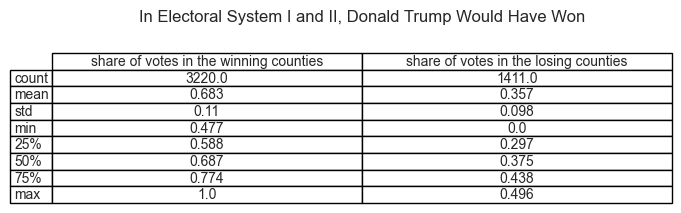

In [80]:
df_I_II_statistics = pd.DataFrame({
    "share of votes in the winning counties" : df_county_won['share of votes in the winning counties'].describe(),
    "share of votes in the losing counties" : df_county_lost['share of votes in the losing counties'].describe(),
})
df_I_II_statistics = df_I_II_statistics.round(decimals = 3)
fig=plt.figure(figsize = (8, 0.3))
ax = fig.add_subplot(111)
ax.table(cellText = df_I_II_statistics.values, colLabels = df_I_II_statistics.columns,
         rowLabels = df_I_II_statistics.index, cellLoc = 'center')
ax.set_title ("In Electoral System I and II, Donald Trump Would Have Won")
ax.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System I and II. Let's revisit the definition of the two electoral systems. For electoral system I, each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes. For electoral system II, each county has one vote, it casts its vote on the party (candidate) that won the majority of votes. Both electoral systems share a same characteristic, that is the decision-making level is at the county. Therefore, systematically speaking, there exists a great potential for the counties with large population to overstep the ones with less population, which is not beneficial to the Republican policy. The gap between the two 50%-data is about 31%, keep this data in mind, and we will compare it with the next table.

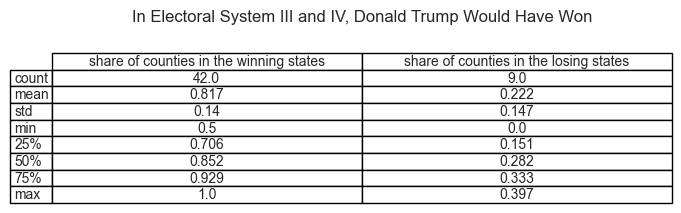

In [81]:
df_III_IV_statistics = pd.DataFrame({
    "share of counties in the winning states": df_state_won['share of counties in the winning states'].describe(),
    "share of counties in the losing states": df_state_lost['share of counties in the losing states'].describe(),
})
df_III_IV_statistics = df_III_IV_statistics.round(decimals = 3)
fig2 = plt.figure(figsize = (8, 0.3))
ax2 = fig2.add_subplot(111)
ax2.table(cellText = df_III_IV_statistics.values, colLabels = df_III_IV_statistics.columns,
         rowLabels = df_III_IV_statistics.index, cellLoc = 'center')
ax2.set_title("In Electoral System III and IV, Donald Trump Would Have Won")
ax2.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System III and IV. Let's revisit the definition of the two electoral systems. For electoral system III, each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties. For electoral system IV, Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties. Both electoral systems here also share a same characteristic, that is the decision-making level is at the state. Therefore, systematically speaking, no matter how many votes the Democrat receives at the large counties, it only counts as 1 vote per county at the state level. As a result, the advantage of Trump being popular with smaller counties is now fully exploited. The gap between the two 50%-data is about 57%, which is almost a double of the 31% from the above, which proves the previous reasoning.

## Plots, Histograms, Figures
### County Level Analysis

#### Effective Voting Rate Versus Population
The voting-eligible population in the US refers to individuals who are eligible to vote in federal elections, such as presidential, congressional, and senatorial elections. To be eligible, a person must be a citizen of the United States, at least 18 years old, and registered to vote in their state of residence. Excluded from this population are non-citizens, individuals under 18 years old, and unregistered individuals. It is worth noting that while all eligible citizens can vote, not all choose to do so. To better understand the voting patterns in US counties, it is important to analyze not only the eligible voter population but also the level of voter participation. This can be done by evaluating the effectiveness of votes cast by introducing a new concept called Effective Voting Rate, which provides a more accurate picture of the level of voter participation within a county. With that said, allow me to introduce the formula of Effective Voting Rate, which refers to the percentage of effective votes (county_total_votes) in the total population within a county.

$$\text{Effective Voting Rate (\%) in a county} = 100*\frac{\text{Effective Votes in a county}}{\text{Population in a county}} $$

In [182]:
df_county_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 2 to 2984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  804 non-null    object 
 1   county                 804 non-null    object 
 2   candidate              804 non-null    object 
 3   party                  804 non-null    object 
 4   won                    804 non-null    bool   
 5   won_votes              804 non-null    int64  
 6   county_total_votes     804 non-null    int64  
 7   trump_vote_share       804 non-null    float64
 8   lat                    804 non-null    float64
 9   lng                    804 non-null    float64
 10  population             804 non-null    int64  
 11  density                804 non-null    float64
 12  effective_voting_rate  804 non-null    float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 114.7+ KB


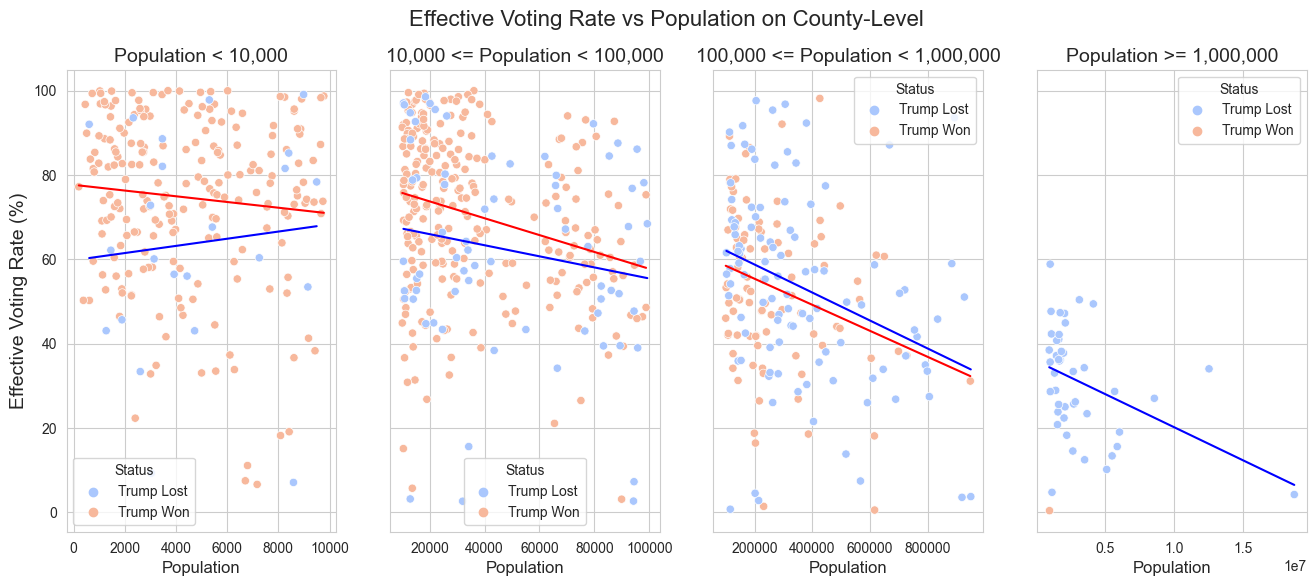

In [83]:
df_county_pop1 = df_county_pop.copy()
df_county_pop1.drop(df_county_pop1[df_county_pop1['population'] >= 10000].index, inplace = True)
df_county_pop2 = df_county_pop.copy()
df_county_pop2.drop(df_county_pop2[df_county_pop2['population'] < 10000].index, inplace = True)
df_county_pop2.drop(df_county_pop2[df_county_pop2['population'] >= 100000].index, inplace = True)
df_county_pop3 = df_county_pop.copy()
df_county_pop3.drop(df_county_pop3[df_county_pop3['population'] < 100000].index, inplace = True)
df_county_pop3.drop(df_county_pop3[df_county_pop3['population'] >= 1000000].index, inplace = True)
df_county_pop4 = df_county_pop.copy()
df_county_pop4.drop(df_county_pop4[df_county_pop4['population'] < 1000000].index, inplace = True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6), sharey=True)
sns.scatterplot(data=df_county_pop1, x="population", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax1)
ax1.set_title("Population < 10,000", fontsize=14)
ax1.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop2, x="population", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax2.set_title("10,000 <= Population < 100,000", fontsize=14)
ax2.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop3, x="population", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax3)
ax3.set_title("100,000 <= Population < 1,000,000", fontsize=14)
ax3.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop4, x="population", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax4)
ax4.set_title("Population >= 1,000,000", fontsize=14)
ax4.set_xlabel("Population", fontsize=12)

ax1.set_ylabel("Effective Voting Rate (%)", fontsize=14)

axes = [ax1, ax2, ax3, ax4]
list_df_pop = [df_county_pop1, df_county_pop2, df_county_pop3, df_county_pop4]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Trump Lost")
        if i == 1:
            label.set_text("Trump Won")
    axes[j].get_legend().set_title("Status")
    list_df_pop[j] = list_df_pop[j].dropna(subset=['population', 'effective_voting_rate'])
    X = list_df_pop[j]
    X_won = X[X['won'] == True]["population"]
    y_won = X[X['won'] == True]['effective_voting_rate']
    axes[j].plot(np.unique(X_won),
                 np.poly1d(np.polyfit(X_won, y_won, 1))(np.unique(X_won)),
                 color='red')
    X_lost = X[X['won'] == False]["population"]
    y_lost = X[X['won'] == False]['effective_voting_rate']
    axes[j].plot(np.unique(X_lost),
                 np.poly1d(np.polyfit(X_lost, y_lost, 1))(np.unique(X_lost)),
                 color='blue')
plt.suptitle("Effective Voting Rate vs Population on County-Level", fontsize = 16)
plt.show()

The above 4 scatterplots hold population against Effective Voting Rate with regression lines that demonstrate the linear relationship between the two variables. What we can see from the pattern is that in general, the higher the population, the lower the Effective Voting Rate. By differentiating counties where Trump won or lost, we see that there is smaller and smaller divergence between distribution of the red dots and the blue dots as the population of counties increases. Effective Voting Rate is negatively associated with county population in both conditions.

There is one exception that in the first plot where population is under 10,000, the regression line for counties which Trump had lost is moving slightly upward, opposing the general trend. A possible explanation for this is that in those small counties - almost the same meaning as where Biden won - there might have been a higher level of engagement and motivation among voters, leading to a higher Effective Voting Rate. However, this deviation from the overall pattern is not consistent across all small counties, as the regression line for counties where Trump won remains consistent with the general trend.

Another notable observation is that the slope of the regression line for counties where Trump won is steeper than that of counties where Biden won. This suggests that in counties where Trump had stronger support, the negative association between population and Effective Voting Rate is more pronounced. On the other hand, in counties where Biden had stronger support, the negative association is less steep, indicating that these counties may have a higher level of political engagement or more efficient voting systems that help increase voter turnout. Therefore, we could draw a conclusion that as the population gets higher, Trump is suffering more from the declined Effective Voting Rate than Biden.

#### Effective Voting Rate Versus Density
After conducting an analysis on the relationship between the Effective Voting Rate and population, it is natural to believe that density, another crucial population variable, is likely to play a significant role in influencing the Effective Voting Rate. The association between the two factors is worth exploring further, as it may provide valuable insights into the factors that impact voting behavior. With this in mind, it is important to delve deeper into the relationship between density and Effective Voting Rate to gain a more comprehensive understanding of their interplay.

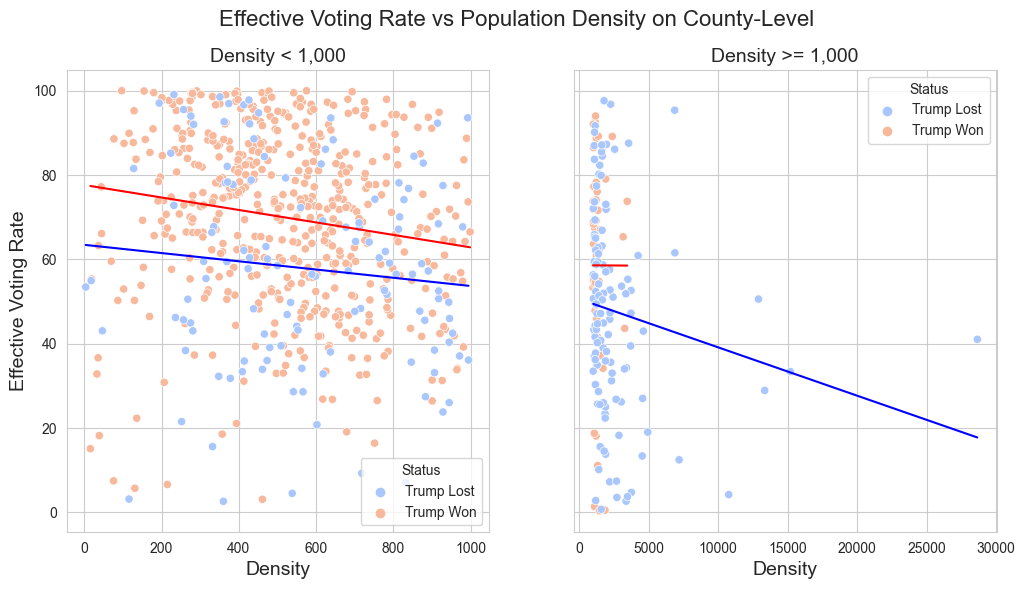

In [84]:
df_county_density1 = df_county_pop.copy()
df_county_density1.drop(df_county_density1[df_county_density1['density'] >= 1000].index, inplace = True)
df_county_density2 = df_county_pop.copy()
df_county_density2.drop(df_county_density2[df_county_density2['density'] < 1000].index, inplace = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.scatterplot(data=df_county_density1, x="density", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax1)
sns.scatterplot(data=df_county_density2, x="density", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax1.set_ylabel("Effective Voting Rate", fontsize=14)
ax1.set_title("Density < 1,000", fontsize=14)
ax2.set_title("Density >= 1,000", fontsize=14)
ax1.set_xlabel("Density", fontsize=14)
ax2.set_xlabel("Density", fontsize=14)

axes = [ax1, ax2]
list_df_density = [df_county_density1, df_county_density2]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Trump Lost")
        if i == 1:
            label.set_text("Trump Won")
    axes[j].get_legend().set_title("Status")
    list_df_density[j] = list_df_density[j].dropna(subset=['density', 'effective_voting_rate'])
    X = list_df_density[j]
    X_won = X[X['won'] == True]["density"]
    y_won = X[X['won'] == True]['effective_voting_rate']
    axes[j].plot(np.unique(X_won),
                 np.poly1d(np.polyfit(X_won, y_won, 1))(np.unique(X_won)),
                 color='red')
    X_lost = X[X['won'] == False]["density"]
    y_lost = X[X['won'] == False]['effective_voting_rate']
    axes[j].plot(np.unique(X_lost),
                 np.poly1d(np.polyfit(X_lost, y_lost, 1))(np.unique(X_lost)),
                 color='blue')


plt.suptitle("Effective Voting Rate vs Population Density on County-Level", fontsize = 16)
plt.show()

Although the regression lines suggest a weak negative correlation between Effective Voting Rate and density, the scatter dots provide evidence that such a relationship is likely to be insignificant. This finding helps to dispel a potential misconception that may have arisen from the previous discussion, which suggested that a negative correlation between population and Effective Voting Rate would also imply a negative relationship between density and Effective Voting Rate.

However, it is worth noting that the regression line for Trump Won lies above the regression line for Trump lost in both subplots by about 10% Effective Voting Rate. The higher participation rate may be an attribute to Trump's winning in those counties, since more eligible voters were willing to effectively cast their votes when the population density was the same. While the scatterplot in the previous section suggests that Trump was not popular in counties with high population density, this does not necessarily mean that he was also not popular in densely populated counties. In other words, Trump may have had an equal if not a higher chance of winning a small but dense county as Biden did. This highlights the importance of effective voter engagement in the US presidential election.

#### Vote Share of Trump Versus County Total Votes
To further explore the relationship between county size and support for Trump, it is worth examining the vote share of Trump against the total number of votes cast in each county. This can help us determine if Trump's popularity is indeed higher in smaller counties and rural regions, as is commonly believed.

$$\text{Vote Share of Trump (\%) in a county} = 100*\frac{\text{Votes for Trump in a county}}{\text{Total Votes in a county}} $$

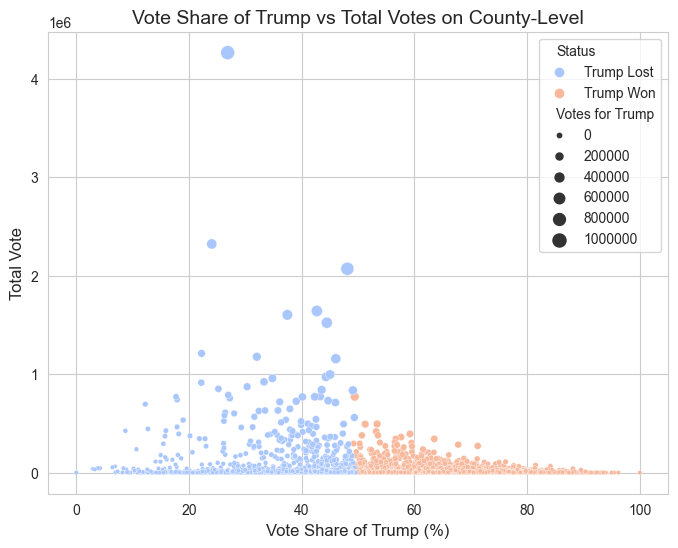

In [85]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_county_plot, x = "trump_vote_share", y = 'county_total_votes', hue = "won", size = "won_votes", palette = "coolwarm", sizes=(10,100))

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Trump Lost")
    if i == 2:
        label.set_text("Trump Won")
    if i == 3:
        label.set_text("Votes for Trump")

plt.title("Vote Share of Trump vs Total Votes on County-Level", fontdict={'family': 'sans-serif', 'size': 14})
plt.xlabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
plt.ylabel("Total Vote", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
plt.show()

The scatterplot above provides a visual representation of the relationship between the number of votes cast in a county and the vote share of Donald Trump in the 2020 presidential election. The plot is divided into two triangular clusters of dots, with blue dots representing counties where Trump lost to other candidates (primarily Joe Biden), and red dots representing counties where Trump emerged as the winner.

Upon closer inspection, we can see that the distribution of dots is denser on the bottom of the red triangle, where Trump won the county. This indicates that Trump was more popular in counties with smaller populations, which tend to be more rural and less densely populated. In contrast, the blue triangle, representing counties where Trump lost, has a higher peak above 4 million votes, indicating that Biden had stronger support in more populous areas.

Overall, the scatterplot confirms the widely held belief that Trump is more popular in rural areas and smaller communities. The stark difference between the peak of the red triangle and that of the blue triangle suggests that Trump's support was more evenly spread across the population in smaller counties, while Biden had more concentrated support in larger counties.

#### Vote Share of Trump Versus Latitude
To further analyze the US political landscape, it is worth considering the role of geography. First we will study one of the two geographical coordinates - latitude. By plotting the share of Trump votes against latitude, the map of the United States is reorganized along the East-West direction, with counties that Trump won on the left and those he lost on the right. The northern counties remain in the north, and the southern counties remain in the south. This allows us to observe potential patterns of support for Trump based on latitude.

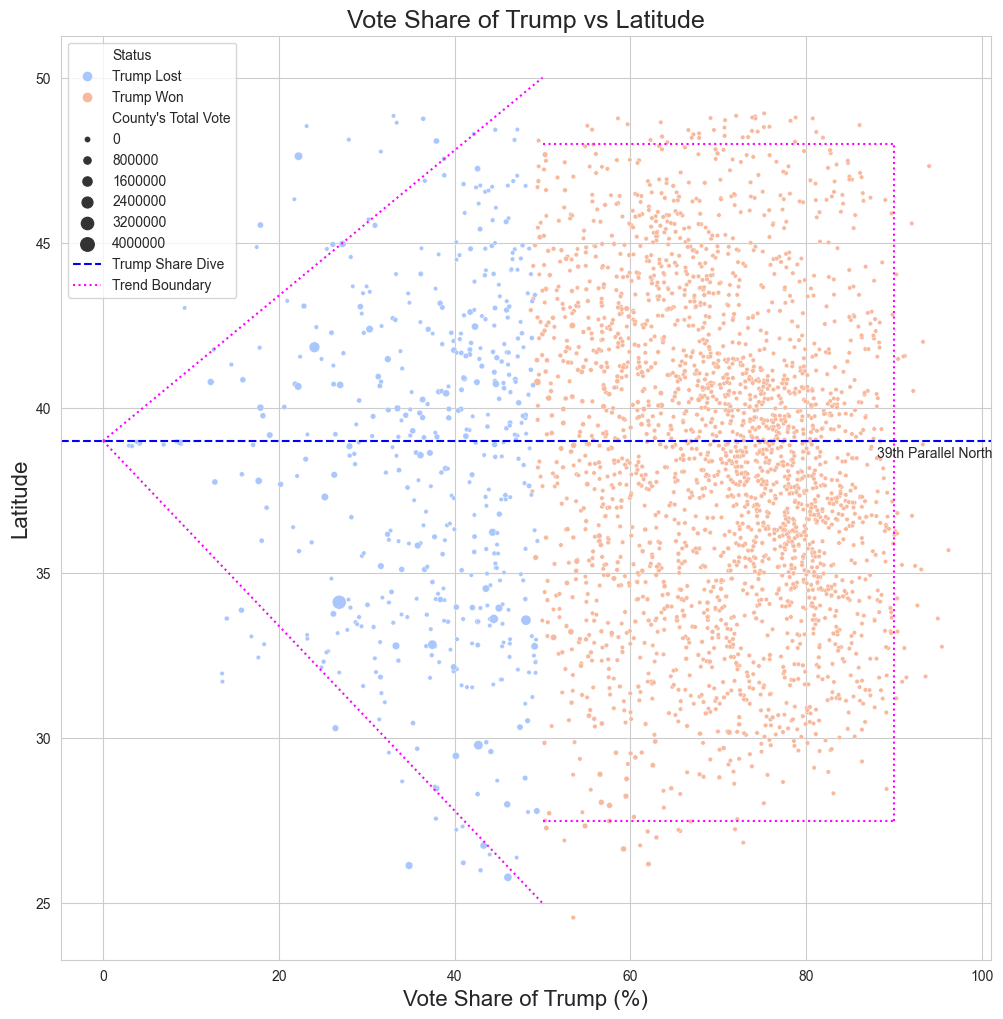

In [86]:
df_county_geo = df_county.copy()
df_county_geo.drop(['candidate', 'party', 'won', 'total_votes'], axis = 1, inplace = True)
df_county_geo = pd.merge(df_county_plot, df_county_geo, on = ['state', 'county'], how = 'left')
df_county_geo = df_county_geo[~df_county_geo["state"].isin(["Alaska", "Hawaii"])]
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df_county_geo, x="trump_vote_share",
                y='lat', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100))

plt.axhline(y=39, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.text(88, 38.4, '39th Parallel North', rotation=0, va='bottom', ha='left')
plt.legend()

plt.plot([0, 50], [39, 25], color="magenta", linestyle=':')
plt.plot([0, 50], [39, 50], color="magenta", linestyle=':')
plt.plot([90, 90], [27.5, 48], color="magenta", linestyle=':')
plt.plot([50, 90], [48, 48], color="magenta", linestyle=':')
plt.plot([50, 90], [27.5, 27.5], color="magenta", linestyle=':', label='Trend Boundary')
plt.legend()

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Trump Lost")
    if i == 2:
        label.set_text("Trump Won")
    if i == 3:
        label.set_text("County's Total Vote")

plt.title("Vote Share of Trump vs Latitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

plt.show()

Looking at the scatterplot, we can observe that on the red side where Trump had won, the dots are evenly distributed on both sides of the 39th parallel north, which is the horizontal line dividing the plot into two parts. This indicates that if Trump wins a county, the likelihood of it being located at any latitude is random, and the advantage that Trump has over his opponent is also random, regardless of its geographical location. This suggests that Trump's popularity and vote share in these counties are not significantly influenced by geographical factors.

On the other hand, the blue side where Trump had lost shows a distinctive convergence of dots on the left side of the plot. This suggests that for a county where Trump lost with a weak disadvantage, it is more likely to be located in the north or south rather than in the center of the country. This observation suggests that geographical factors may have had some influence on the outcome of the election in these counties.

#### Trump Vote Share Versus Longitude
After analyzing the relationship between Trump's vote share and latitude, it is also essential to examine the variable of longitude. The following graph displays longitude on the x-axis, reorganizing the US map by the North-South direction, with counties that Trump won at the top and those he lost at the bottom. East counties are still on the right side of the plot, and the west counties are still on the left.

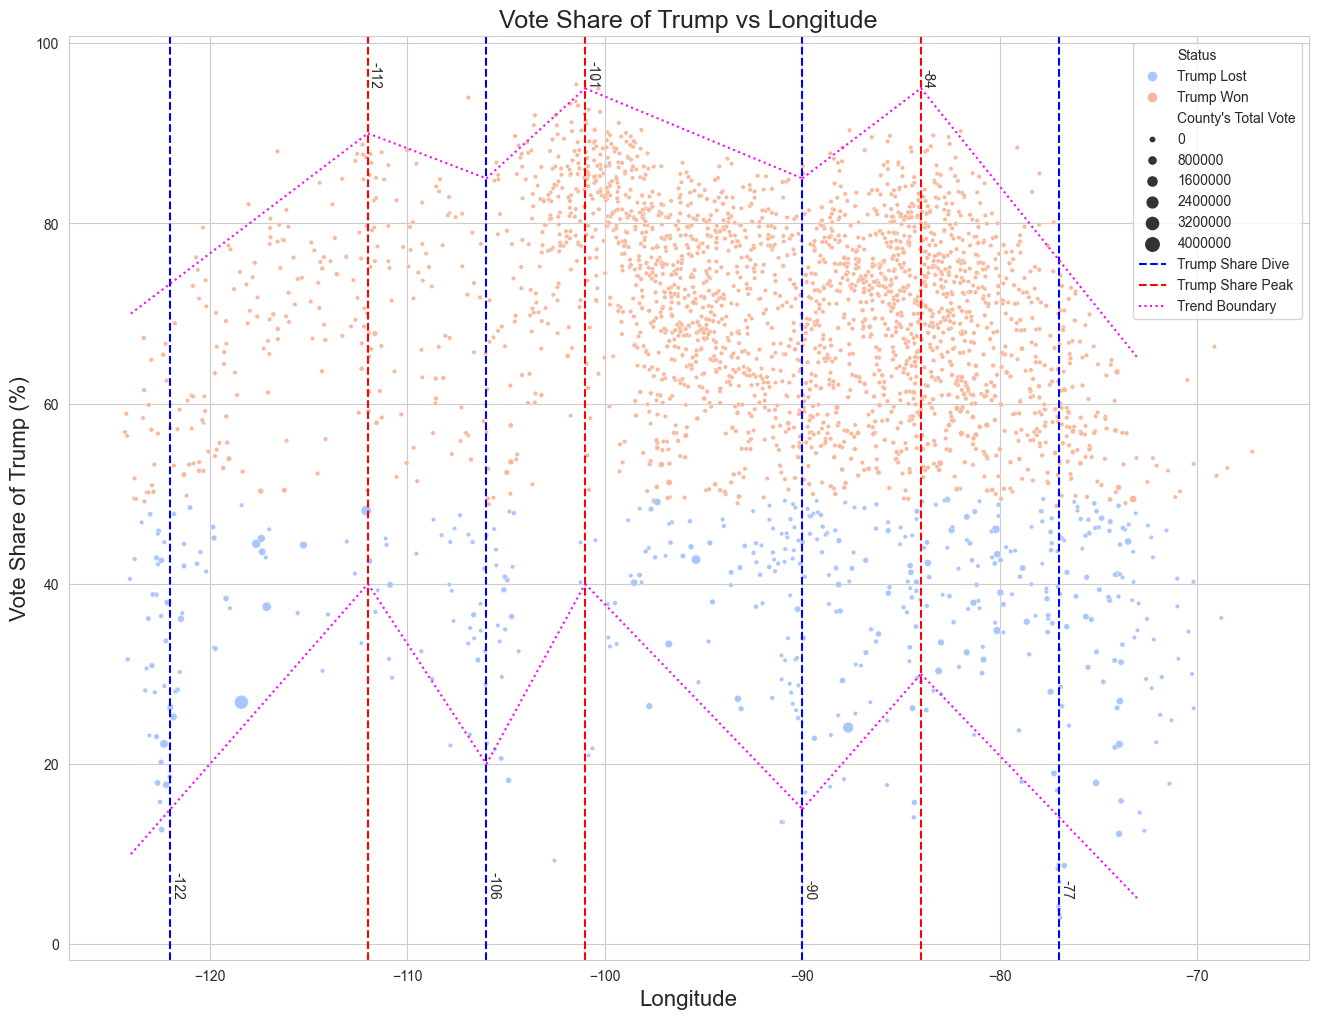

In [87]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_county_geo, x="lng",
                y='trump_vote_share', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100))
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.legend()
plt.text(-122, 5, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
plt.legend()
plt.text(-112, 95, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 5, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 95, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 5, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 95, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 5, '-77', rotation=-90, va='bottom', ha='left')

plt.plot([-124, -112], [10, 40], color="magenta", linestyle=':', label='Trend Boundary')
plt.legend()
plt.plot([-124, -112], [70, 90], color="magenta", linestyle=':')
plt.plot([-112, -106], [40, 20], color="magenta", linestyle=':')
plt.plot([-112, -106], [90, 85], color="magenta", linestyle=':')
plt.plot([-106, -101], [20, 40], color="magenta", linestyle=':')
plt.plot([-106, -101], [85, 95], color="magenta", linestyle=':')
plt.plot([-101, -90], [40, 15], color="magenta", linestyle=':')
plt.plot([-101, -90], [95, 85], color="magenta", linestyle=':')
plt.plot([-90, -84], [15, 30], color="magenta", linestyle=':')
plt.plot([-90, -84], [85, 95], color="magenta", linestyle=':')
plt.plot([-84, -73], [30, 5], color="magenta", linestyle=':')
plt.plot([-84, -73], [95, 65], color="magenta", linestyle=':')
plt.legend()

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Trump Lost")
    if i == 2:
        label.set_text("Trump Won")
    if i == 3:
        label.set_text("County's Total Vote")

plt.title("Vote Share of Trump vs Longitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

plt.show()

The scatterplot of longitude against the share of Trump votes reveals a very interesting pattern of distribution. As we move from the farthest west (longitude -122) to the east, we observe that the general votes are relatively unfavored for Donald Trump. However, as we move slightly to the east (longitude -112), we see a local peak in the Trump's vote share. Continuing eastward to longitude -106, we see a local dive in the vote share. This pattern continues, and we observe four total dives at longitudes -122, -106, -90, and -77, and three peaks in between them at longitudes -112, -101, and -84.

This wave-like movement of Trump's vote share from west to east is a fascinating phenomenon that may be influenced by several factors, such as population density, regional culture and values, and historical context. However, the exact cause of this pattern is beyond the scope of this analysis and requires further research. It is possible that future studies may shed light on the underlying reasons for this phenomenon and help us better understand the complex interplay between geography and politics in the United States.

#### Geographical Distribution of Trump Share Votes
By combining the latitude and longitude graph, we have a comprehensive map that illustrates the Trump share of votes in the US mainland. The map is divided into areas represented by blue and red lines, where the blue lines represent areas with lower Trump share, and the red lines represent areas with higher Trump share.

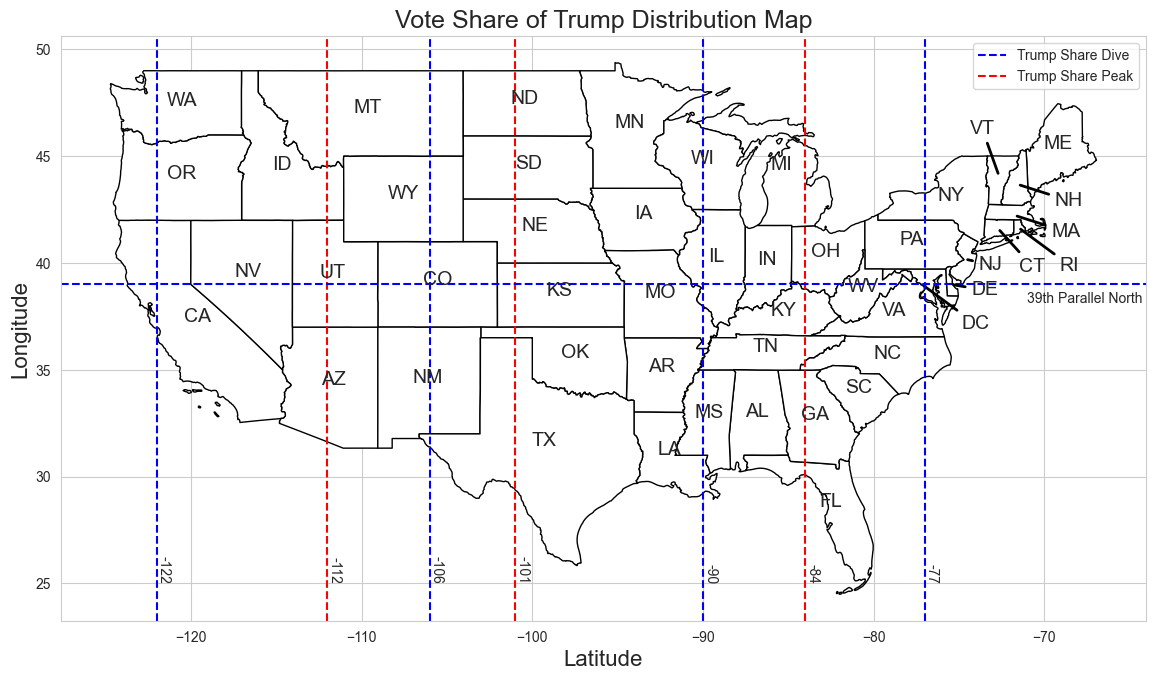

In [88]:
fig, gax = plt.subplots(1, figsize=(14, 8))
ax = fig.add_subplot()
gpd_state4.plot(ax=ax, edgecolor="black", color="white")
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.legend()
plt.text(-122, 25, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
plt.legend()
plt.text(-112, 25, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 25, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 25, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 25, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 25, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 25, '-77', rotation=-90, va='bottom', ha='left')
plt.axhline(y=39, color='blue', linestyle='dashed')
plt.text(-71, 38, '39th Parallel North', rotation=0, va='bottom', ha='left')

for idx, row in gpd_state4.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['VT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['NJ']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['RI']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DC']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
    else:
        ax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
gax.axis('off')
plt.title("Vote Share of Trump Distribution Map", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

The map shows that the areas with the highest Trump share are mostly located in the central and southern regions of the country, where more small counties are located. These regions include Texas, Oklahoma, Arkansas, Louisiana, Mississippi, Alabama, Tennessee, Kentucky, West Virginia, and parts of Georgia, South Carolina, and North Carolina. On the other hand, the areas with the lowest Trump share are mostly located in the western and northeastern regions of the country. These regions include California, Oregon, Washington, Minnesota, Illinois, Michigan, New York, Vermont, Massachusetts, Connecticut, and parts of New Hampshire, Maine, and Rhode Island.

The map also reveals a pattern of wave-like movement, where the Trump share of votes tends to peak and dive as we move from west to east. The peaks are located in the western part of Texas, eastern Colorado, and western Ohio, while the dives are located in the western part of Washington, eastern Montana, eastern Iowa, and western Pennsylvania.

Overall, the map provides a comprehensive and detailed view of the distribution of Trump share of votes in the US mainland. It highlights the regions where Trump was more popular and the regions where he was less popular, and it reveals a pattern of wave-like movement that may be worth exploring in future studies.

# Project Two
## The Message
The more the electoral system is leaning towards the smaller counties, the more likely Donald Trump is going to win the election.

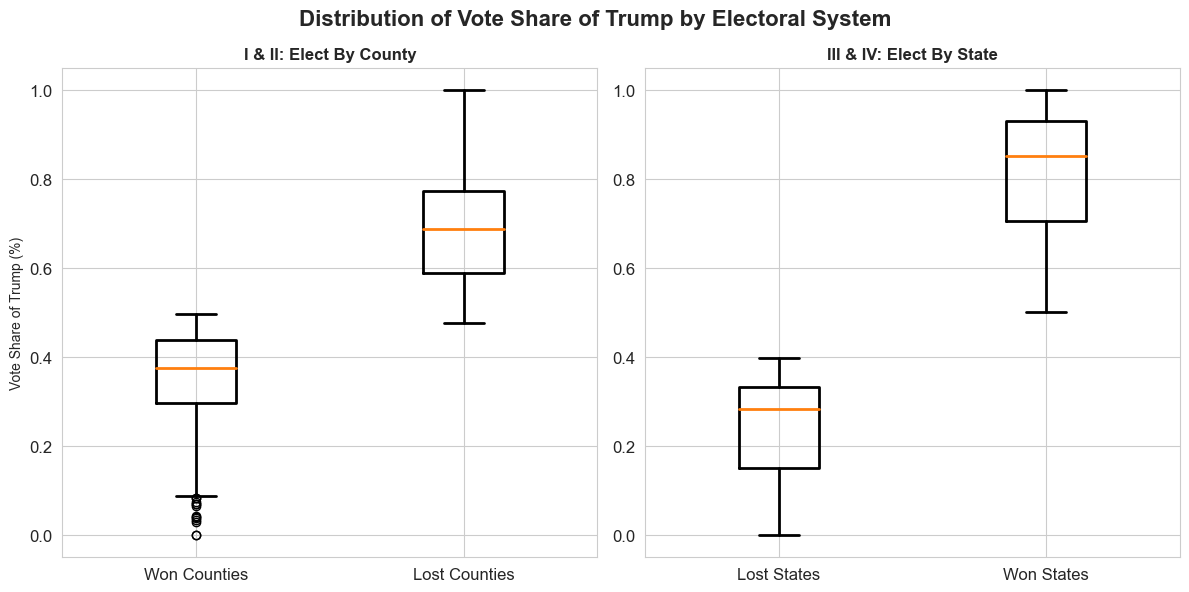

In [89]:
df_boxplot1 = pd.DataFrame({
    'share of votes in the winning counties': df_county_won['share of votes in the winning counties'],
})
df_boxplot1['Electoral Systems'] = 'share of votes in the winning counties'
df_boxplot1.rename(columns={'share of votes in the winning counties': 'Value'}, inplace=True)

df_boxplot2 = pd.DataFrame(data=df_county_lost, columns=['share of votes in the losing counties'])
df_boxplot2['Electoral Systems'] = 'share of votes in the losing counties'
df_boxplot2.rename(columns={'share of votes in the losing counties': 'Value'}, inplace=True)

df_boxplot1 = pd.concat([df_boxplot1, df_boxplot2])
df_boxplot1['Group'] = 'I & II: Elect By County'

df_boxplot3 = pd.DataFrame(data=df_state_won, columns=['share of counties in the winning states'])
df_boxplot3['Electoral Systems'] = 'share of counties in the winning states'
df_boxplot3.rename(columns={'share of counties in the winning states': 'Value'}, inplace=True)

df_boxplot4 = pd.DataFrame(data=df_state_lost, columns=['share of counties in the losing states'])
df_boxplot4['Electoral Systems'] = 'share of counties in the losing states'
df_boxplot4.rename(columns={'share of counties in the losing states': 'Value'}, inplace=True)

df_boxplot3 = pd.concat([df_boxplot3, df_boxplot4])
df_boxplot3['Group'] = 'III & IV: Elect By State'

df_boxplot = pd.concat([df_boxplot1, df_boxplot3])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

for i, (name, group) in enumerate(df_boxplot.groupby('Group')):
    ax = axes[i]
    group.boxplot(by='Electoral Systems', ax=ax, positions=[1, 2], widths=0.3,
                  boxprops=boxprops, medianprops=medianprops,
                  whiskerprops=whiskerprops, capprops=capprops)

    ax.set_xlabel('')

    if i == 0:
        ax.set_xticklabels(['Won Counties', 'Lost Counties'])
        ax.set_ylabel('Vote Share of Trump (%)')
    else:
        ax.set_xticklabels(['Lost States', 'Won States'])

    ax.set_title(name, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Distribution of Vote Share of Trump by Electoral System', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


Recalling the two general types of electoral systems defined at the beginning of this paper:

*Elect By County:* A county casts all of its votes on the party (candidate) that won the majority of votes.

*Elect By State:* A state casts all of its votes on the party (candidate) that won the majority of counties.

According to these rules, if a county is large enough in the first general type, it has the potential to overstep multiple small counties using its large volume of votes. In contrast, in the second general type, since the decision-making level is at the state, and the majority of counties in a state are small counties, Donald Trump's victory would have been dominant.

The two groups of boxplots presented in this paper show a significant difference in the gap between losing and winning districts between the two general types of electoral systems. The first group, which stands for electing by county, shows that the gap between the two median quantiles marked by the color orange is about 0.3. In contrast, the second group, which represents electing by state, shows that the gap between the two median quantiles marked by the color orange is almost about 0.6, doubling the gap in the first group. A larger gap between the two median quantiles indicates a more overwhelming victory by Trump.

Overall, this observation suggests that the electoral system has a significant impact on the gap between losing and winning districts. This highlights the importance of understanding the weighing by the electoral system analyzing election results.

## Maps and Interpretations
To obtain a clearer representation of the US mainland, we removed Hawaii and Alaska from both county-level and state-level dataframes before generating the graphs.

In [90]:
df_county_mainland = df_county[~df_county["state"].isin(["Alaska", "Hawaii"])]
df_state_mainland = df_state2[~df_state2["state"].isin(["Alaska", "Hawaii"])]

### Electoral System I - Elect By County
The first electoral system we will examine is Electoral System I, where each county has same number of votes as its voters, and it casts all of its votes on the party (candidate) that won the majority of votes. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}), \text{Total Votes in a county}, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}), \text{Total Votes in a county}, 0) $$

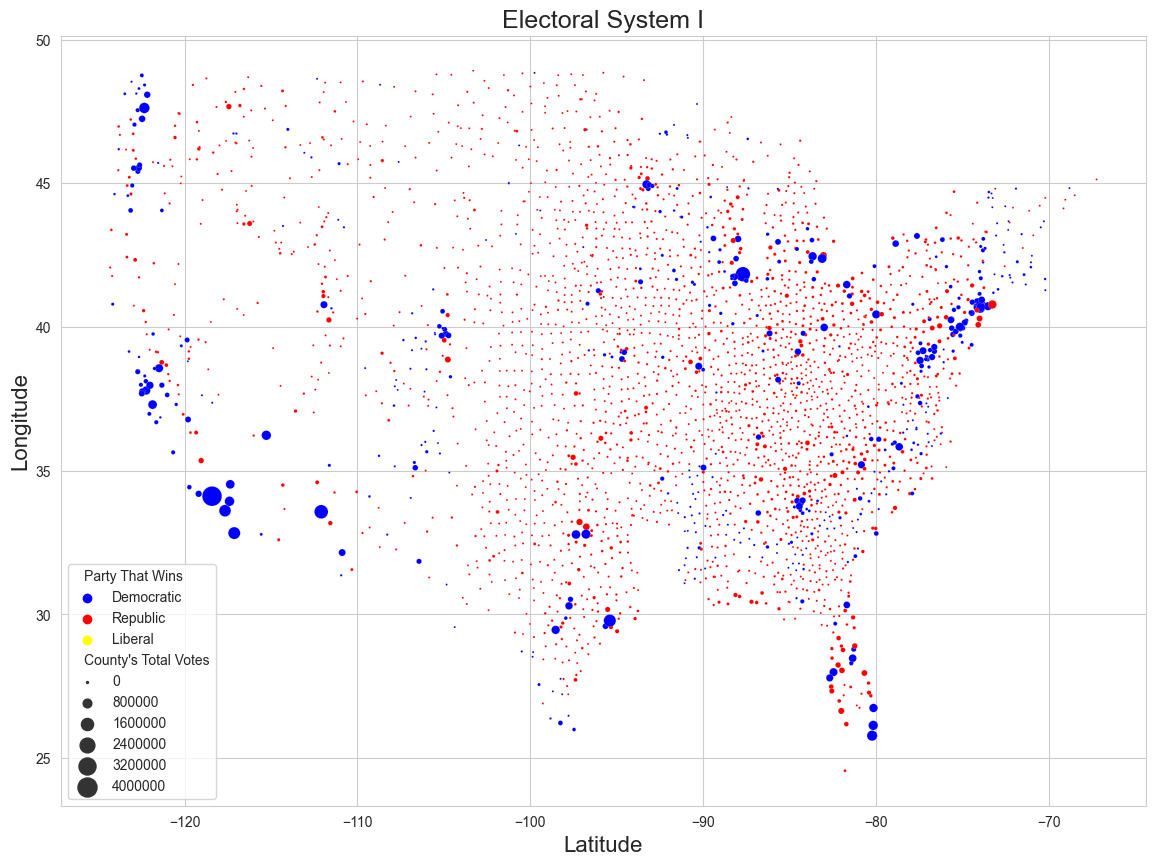

In [91]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System I", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Party That Wins")
    if i == 1:
        label.set_text("Democratic")
    if i == 2:
        label.set_text("Republic")
    if i == 3:
        label.set_text("Liberal")
    if i == 4:
        label.set_text("County's Total Votes")
plt.show()

In [92]:
y1 = df_county.groupby('party')['total_votes'].sum()['DEM']
y2 = df_county.groupby('party')['total_votes'].sum()['REP']
y3 = df_county.groupby('party')['total_votes'].sum()['LIB']
y4 = df_county.groupby('party')['total_votes'].sum()['WRI']
result_1 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_1 = pd.DataFrame(result_1, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_1

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden          94602377   True
1   REP  Donald Trump          64940909  False
2   LIB  Jo Jorgensen                42  False
3   WRI     Write-ins             64909  False

The Electoral System I assigns each county a number of votes equal to the number of registered voters in the county, and all of these votes are cast for the party (candidate) that received the majority of votes in that county.

According to the table, Joe Biden emerged as the winner with a total of 94,602,377 votes, and he won the election under this system. In the context of the 2020 United States presidential election, Joe Biden won the majority of votes in a number of megacities, which had a significant impact on the outcome of the election. Biden was able to accumulate a large number of electoral votes due to his success in densely populated areas. On the other hand, Donald Trump won a large number of counties but failed to secure enough votes from densely populated areas to win the election.

### Electoral System II - Elect By County
The second electoral system we will examine is Electoral System II, where each county has one vote, it casts its vote on the party (candidate) that won the majority of votes. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}), 1, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}), 1, 0) $$

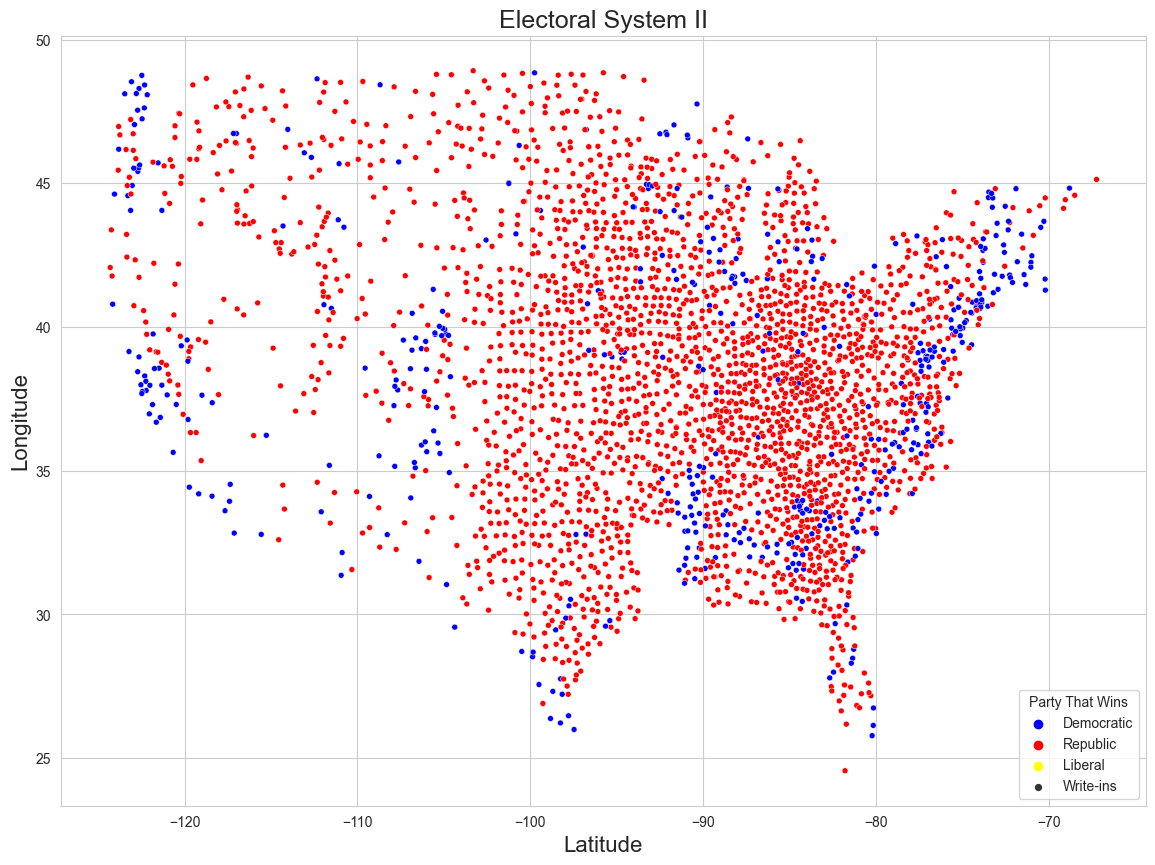

In [93]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = 20, palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System II", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.legend(title='Party That Wins', loc='lower right')
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Democratic")
    if i == 1:
        label.set_text("Republic")
    if i == 2:
        label.set_text("Liberal")
    if i == 3:
        label.set_text("Write-ins")
plt.show()

In [94]:
y1 = df_county['party'].value_counts()['DEM']
y2 = df_county['party'].value_counts()['REP']
y3 = df_county['party'].value_counts()['LIB']
y4 = df_county['party'].value_counts()['WRI']
result_2 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_2 = pd.DataFrame(result_2, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_2

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden              1409  False
1   REP  Donald Trump              3220   True
2   LIB  Jo Jorgensen                 1  False
3   WRI     Write-ins                 3  False

Electoral System II assigns each county a single vote, which is cast for the party (candidate) that won the majority of votes in that county. Under this system, Donald Trump emerged as the winner, with a significant lead over Joe Biden. This is in contrast to the outcome under Electoral System I, where Biden was declared the winner. The difference in the results can be attributed to the fact that in Electoral System II, all counties are weighted equally, regardless of their population or number of registered voters. As a result, Trump's popularity in small counties and traditional Republican strongholds gave him an advantage under this system. In addition, the fact that each county is weighted equally means that the influence of larger urban areas, which tend to lean Democratic, is minimized, leading to a more Republican-leaning outcome.

### Electoral System III - Elect By State
The third electoral system we will examine is Electoral System III, where each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} > \text{State Votes for Trump}, \text{Total Votes of }State_{i}, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} < \text{State Votes for Trump}, \text{Total Votes of }State_{i}, 0) $$

$$ \text{State Votes for Biden} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{State Votes for Trump} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} ((if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{Total Votes of }State_{i} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} \text{Total Votes in a county} $$

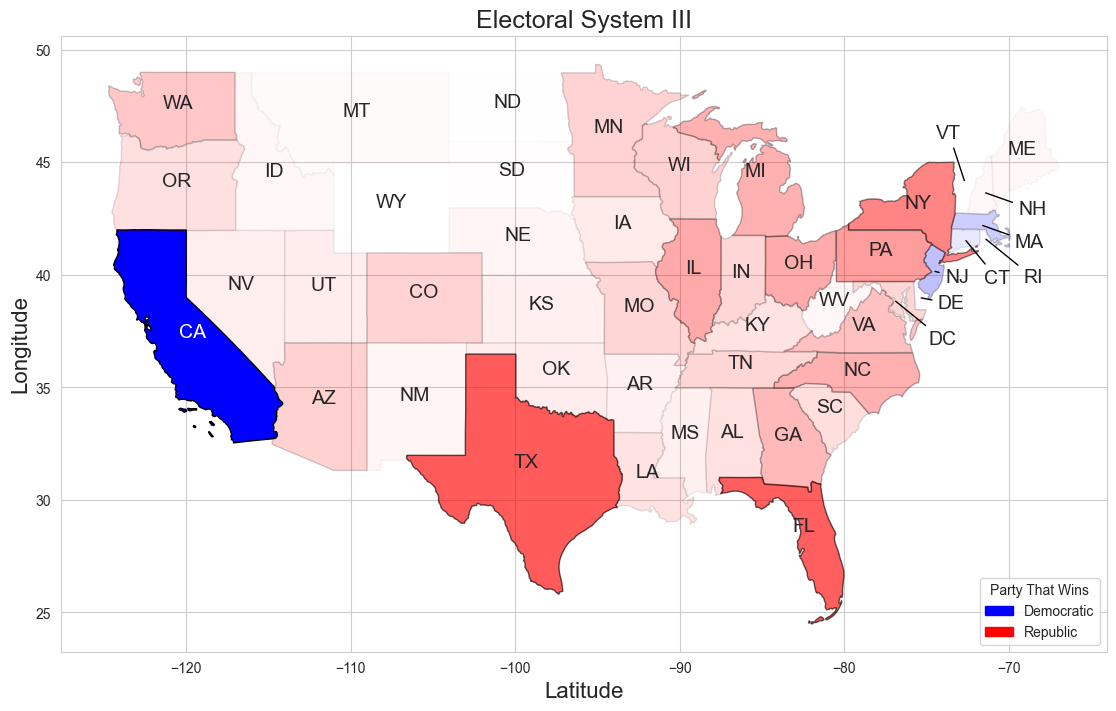

In [95]:
fig, gax= plt.subplots(figsize=(14, 8))

# Define color mapping
colors = {'DEM': 'blue', 'REP': 'red'}

# Define minimum and maximum values for color scale
vmin = gpd_state4['total_votes'].min()
vmax = gpd_state4['total_votes'].max()

# Plot each state with the appropriate color and shade
for index, row in gpd_state4.iterrows():
    color = colors.get(row['party'], 'gray')
    total_votes = row['total_votes']
    shade = (total_votes - vmin) / (vmax - vmin)
    gpd_state4[gpd_state4.index == index].plot(ax=gax, color=color, edgecolor='black', linewidth=1, alpha=shade)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = colors.keys()
gax.legend(handles, labels, loc='lower right')

for idx, row in gpd_state4.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC', 'CA']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['RI', 'DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CA']:
            gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14, color = 'white')
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)

# Set plot title
plt.title("Electoral System III", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = ['Democratic', 'Republic']
legend = gax.legend(handles, labels, loc='lower right')

# Set legend title
legend.set_title("Party That Wins")

# Show plot
plt.show()


In [96]:
y1 = df_state2.groupby('party')['total_votes'].sum()['DEM']
y2 = df_state2.groupby('party')['total_votes'].sum()['REP']
try:
    y3 = df_state2.groupby('party')['total_votes'].sum()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state2.groupby('party')['total_votes'].sum()['WRI']
except KeyError:
    y4 = 0
result_3 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_3 = pd.DataFrame(result_3, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_3

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden          29822468  False
1   REP  Donald Trump         129785769   True
2   LIB  Jo Jorgensen                 0  False
3   WRI     Write-ins                 0  False

Under Electoral System III, Donald Trump won this system with a significant lead over Joe Biden. This can be attributed to the fact that Trump won the majority of counties in many states, including those with a higher number of rural counties. In contrast, Biden's support was mainly concentrated in urban areas and some Democrat's conservative base states. The result is notably different from the previous two systems, as the number of small counties is significantly higher than the number of large counties, and that the state-level decision is purely based on which candidate wins the majority counties. This system gives substantial advantage to Donald Trump, due to the popularity of his policy among people live in the small towns and rural regions. In Electoral System III, because the number of counties won by a party (candidate) plays a significant role in determining the winner, while in the previous two systems, the total number of votes won by a party (candidate) was the deciding factor, the system heavily leans towards small counties rather than populated cities.

### Electoral System IV - Elect By State
The last electoral system we will examine is Electoral System IV, where each state has one vote, it casts all of its votes on the party (candidate) that won the majority of counties. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} > \text{State Votes for Trump}, 1, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} < \text{State Votes for Trump}, 1, 0) $$

$$ \text{State Votes for Biden} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{State Votes for Trump} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} ((if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{Total Votes of }State_{i} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} \text{Total Votes in a county} $$

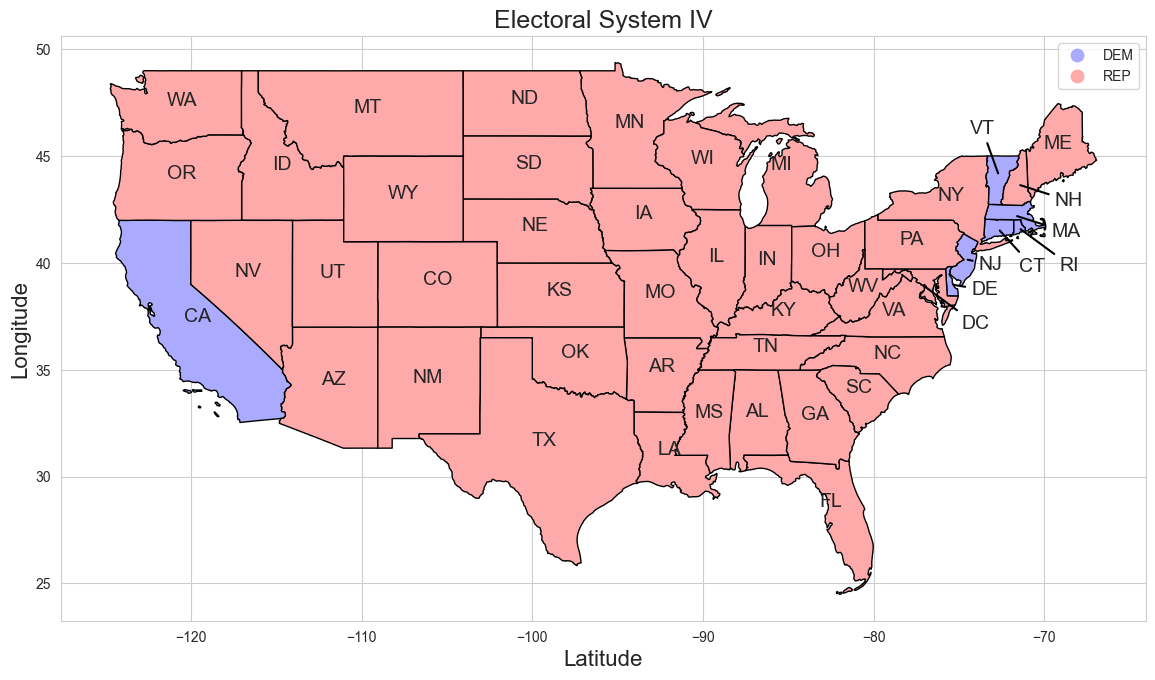

In [97]:
fig, gax= plt.subplots(1, figsize = (14,8))
gpd_state4.plot(ax=gax, edgecolor='black', column='party', legend=True, cmap='bwr', categorical=True, vmin=-1, vmax=2)
for idx, row in gpd_state4.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['RI']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
plt.title("Electoral System IV", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

In [98]:
y1 = df_state1['party'].value_counts()['DEM']
y2 = df_state1['party'].value_counts()['REP']
try:
    y3 = df_state1['party'].value_counts()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state1['party'].value_counts()['WRI']
except KeyError:
    y4 = 0
result_4 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_4 = pd.DataFrame(result_4, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_4

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden                 9  False
1   REP  Donald Trump                42   True
2   LIB  Jo Jorgensen                 0  False
3   WRI     Write-ins                 0  False

Under Electoral System IV, Donald Trump emerges as the winner under this system with 42 votes, while Joe Biden receives only 9 votes. The ratio of victory is even higher than the ratio in Electoral System III.

The reason why Trump wins even more under this system compared to Electoral System III is that this system places higher emphasis on the number of counties won rather than the number of votes. This system ignores the huge population supporting the Democatic Party in California, making the scale tip further towards Trump. Without the pressure from the california population, Trump won a higher number of counties in most states, and this allowed him to win the majority of states and, subsequently, the election.

However, it's worth noting that this system is not reflective of the principle of "one person, one vote." It gives more weight to less populous states and ignores the popular vote. This system can lead to an unfair result where the candidate who receives fewer votes nationwide can still win the election if they win the majority of states.

### Summary of Four Electoral Systems

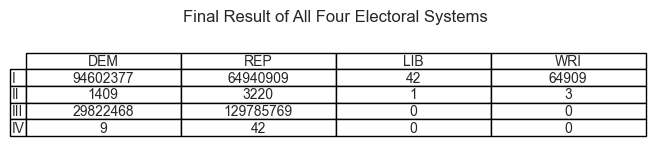

In [99]:
result = df_result_1.copy()
result.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result.rename(columns={"Fabricated Votes": "I"}, inplace = True)
result = result.T
new_header = result.iloc[0]
result = result[1:]
result.columns = new_header

result_add = df_result_2.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "II"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_3.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "III"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_4.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "IV"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

fig=plt.figure(figsize = (8, 0.3))
ax = fig.add_subplot(111)
ax.table(cellText = result.values, colLabels = result.columns,
         rowLabels = result.index, cellLoc = 'center')
ax.set_title ("Final Result of All Four Electoral Systems")
ax.axis ('off')
plt.show()

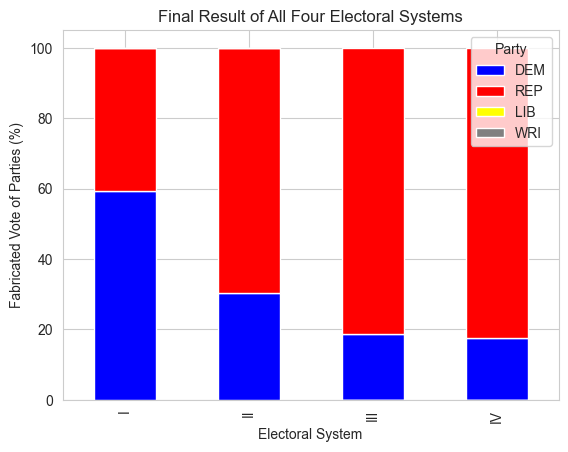

In [100]:
stacked_data = result.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, color = ['blue', 'red', 'yellow', 'grey'])
plt.title("Final Result of All Four Electoral Systems")
plt.xlabel("Electoral System")
plt.ylabel("Fabricated Vote of Parties (%)")
plt.show()

The table above shows the number of votes for each party in four different hypothetical electoral systems. The summary suggests that Trump's advantage increases as we move from the first to the fourth system, as smaller counties carry more weight. This highlights the fact that Trump is more popular among people living in smaller counties.

Additionally, it is important to note that the number of votes for the Libertarian (LIB) and Write-in (WRI) parties are relatively small in all systems, indicating that they do not have significant support among voters.

# Project Three
## Potential Data to Scrape
### First Dataset: 2020 Presidential Campaign Funding
One potential addition to the campaign funding data by candidate and state in the 2020 US presidential election dataset could be web scraping data on funding sources by sector. By scraping data on the fundraising, we could gain insights into which sector were spending money to support or oppose the candidates, and by how much.

One potential website to scrape this data from is OpenSecrets.org, which is a website that tracks money in politics. OpenSecrets.org provides data on funding source by candidate and by sector, which could help shed light on which groups were most active in trying to influence the election on a county-level.

To have an understanding of how this data could be parallel on our previous findings, we can take a look at whether the funding from the argricultural sector confirmed that Trump's policy is more appealing to people and businesses in the rural places, so that he attracts more funding than Biden; and whether Biden's policy is more attractive to urban cities so that finance sector is more willing to support him rather than Trump.

The above are just examples on how we could then use this new information to help answer my research question, the discussion later in this chapter will analyze the data in detail.

### Second Dataset: 2020 Trump Presidential Campaigns

## Potential Challenges
### First Dataset: 2020 Presidential Campaign Funding
Firstly, the website does not provide all the data that we need in a single location or in a format that is easy to scrape. We need to scrape data from multiple pages or even multiple websites to gather all the relevant information.

Secondly, merging the scraped data with our existing dataset may require more information on a state-level, which the website does not provide complete information on. In future work, we can find such information either by searching in other websites, or we can contact the website holder OpenSecrets for a more detailed dataset.

Side Note: I have also found a dataset that contains contribution details including industry, organization name, amount and states on https://www.fec.gov/data/candidates/president/presidential-map/. However, the size of the file was too large to be handled, therefore I choose to not use this in Project 3.

Here is the file:

In [101]:
#df_candidate_funding = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/P00000001-ALL.csv')
#df_candidate_funding.head(10)

## Scraping Data from a Website
### First Dataset: 2020 Presidential Campaign Funding
Since the website I am working on does not have all the information on one page, therefore I have to run a for loop to scrape all the related HTML pages.

Create essential lists that will be used in scrapping. Since the funds can come from two channels, one is campaign committee, the other one is outside groups, we will also set a third channel which combines the previous two.

In [102]:
sectors = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources', 'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business', 'Labor', 'Ideology/Single-Issue', 'Other']

# Total funding from campaign committee and outside groups by sector
channel_combined = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W']

# Funding from campaign committee by sector
channel_campaign_committee = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=c']

# Funding from outside groups by sector
channel_outside_groups = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=o',
                          'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=o']

channel_fund = [channel_combined, channel_campaign_committee, channel_outside_groups]

For explanation purposes, I will use the first website link:'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A' to demonstrate detailed steps.


The requests library can be used to work with webpages and web content. A request is made to get the content of the webpage with the get() method.

In [103]:
import requests
from bs4 import BeautifulSoup

web_url = "https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A"
response = requests.get(web_url)

A response is received from the web server. This response will have response headers and status codes associated to that particular request. Response headers give the detailed information about the request made to the web server.

In [104]:
response.headers

{'Date': 'Tue, 11 Apr 2023 06:49:52 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=3600, public', 'CF-Connecting-IP': '138.51.93.79', 'Set-Cookie': '_opensecrets_session=ViyQisGjrk61vieyAjM%2FnbSAbLCX%2FENUJJzMghay9B%2FBwRQmOhFMgBNFusQs89IOuO2AFOE9wuBa%2BNm5pTp8Rsp2qW%2FfOErpqhfnu18g810nwZumwhQ%2FEDFChCE4Ihm3YvFTeiTbUHWkqgC96aPl2EcTvPletUjFUU8Jp09Yr9BuizC9E8UBHhW0EAB2p8H%2FuQ29OyWm8jiaO84D1gHNpflQkyDip64Msn30qUKMMCXDDpxzbdXTH0BZL1YokmLTXWrPEu7zr85A87rjXdqp8oT%2FRkPfN%2B3CfOjLKA%3D%3D--Hlc4KBbgorGuGQdB--H18ZOqHqTdongoHmCThZwQ%3D%3D; path=/; HttpOnly', 'Status': '200 OK', 'Strict-Transport-Security': 'max-age=30758400', 'Vary': 'Origin', 'X-Cache-Server': 'ip-10-33-5-93', 'X-Cache-Status': 'MISS', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'DENY', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Powered-By': 'Phusion Passenger(R) 6.0.8', 'X-RAILS-IP': '172.

Every response will have a status code. The status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped in five classes:

Informational responses (100–199)
Successful responses (200–299)
Redirects (300–399)
Client errors (400–499)
Server errors (500–599)
Sometimes you get a client error like (403), then you should add your user agent as header to your Get request (google how to get user agent), you can also look at this stackoverflow page: https://stackoverflow.com/questions/38489386/python-requests-403-forbidden

Let us check the response status code for the HTTP request we placed

In [105]:
response.status_code

200

The response has a status code of 200. This is a successful response and hence there should be relevant content of the webpage in the obtained response. This can be checked by printing the content. This content received is the HTML source code of the webpage.

### Parsing HTML and accessing different elements
bs4 is a Python library which parses through HTML content and understands the complete structure of the content. The response content can be passed to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [106]:
soup_object = BeautifulSoup(response.content, 'html.parser')

str(soup_object)[0:1000]

'<!DOCTYPE html>\n\n<!--[if lte IE 8]><html class="no-js lte-ie9 lte-ie8" lang="en" dir="ltr"><![endif]-->\n<!--[if IE 9]><html class="no-js lte-ie9" lang="en" dir="ltr"><![endif]-->\n<!--[if gt IE 9]><!-->\n<html class="no-js" dir="ltr" lang="en">\n<!--<![endif]-->\n<head>\n<!-- Google Tag Manager -->\n<script>\n    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n      new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n      j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n      \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n      })(window,document,\'script\',\'dataLayer\',\'GTM-MKPRXNV\');\n  </script>\n<!-- End Google Tag Manager -->\n<meta charset="utf-8"/>\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-b7f93d6e9afef1935a5","applicationID":"1109265918","transactionName":"dFpeQk

### Explore the schema: Manipulating it into a tabular structure
---
To be able to accurately extract relevant data from the webpage, it is important to explore the schema and understand the structure of the webpage. A good way to do this is to inspect the webpage directly on a web browser.
<br>

To do this,
- Open the webpage on a browser
- Right click on the data content to be extracted
- Click on `Inspect` or `Inspect element` option

This will open a console window which shows the real time HTML code corresponding to the web content. Now identify the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In our case, the data is enclosed in the `<table>` HTML tag with the class name `'data-table'`. This information can be used to search for the web content directly in our soup object with the `find_all()` method. This will return a soup object.

It is important to look for <table class="??????">, where the "??????" will be used down below. In our case, the "??????" would be "DataTable":

...
<table class="DataTable" data-order='[[ 1, "desc" ]]'>
<thead>
<tr>
<th>Candidate</th>
<th class="number">Total</th>
</tr>
</thead>
<tbody>
<tr>
<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
<td class="number">$16,091,308</td>
</tr>
<tr>
...

In [107]:
data_table = soup_object.find_all('table', 'DataTable')[0]

str(data_table)[0:1000]

'<table class="DataTable" data-order=\'[[ 1, "desc" ]]\'>\n<thead>\n<tr>\n<th>Candidate</th>\n<th class="number">Total</th>\n</tr>\n</thead>\n<tbody>\n<tr>\n<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>\n<td class="number">$16,091,308</td>\n</tr>\n<tr>\n<td><a href="/2020-presidential-race/joe-biden/candidate?id=N00001669">Biden, Joe (D)</a></td>\n<td class="number">$6,928,442</td>\n</tr>\n<tr>\n<td><a href="/2020-presidential-race/bernie-sanders/candidate?id=N00000528">Sanders, Bernie (D)</a></td>\n<td class="number">$2,592,617</td>\n</tr>\n<tr>\n<td><a href="/2020-presidential-race/pete-buttigieg/candidate?id=N00044183">Buttigieg, Pete (D)</a></td>\n<td class="number">$788,650</td>\n</tr>\n<tr>\n<td><a href="/2020-presidential-race/elizabeth-warren/candidate?id=N00033492">Warren, Elizabeth (D)</a></td>\n<td class="number">$728,008</td>\n</tr>\n<tr>\n<td><a href="/2020-presidential-race/amy-klobuchar/candidate?id=N00027500">Klobuc

It can be seen that relevant block of data has been extracted but further extraction needs to be done to individually extract the rank, company name and the company website data. On further analysis, it can be seen that every row of data is enclosed under a `<tr>` HTML tag which means `table row`. All these row values can be extracted into a list of values by finding the `<tr>` values from our newly created soup object `data_table`.

`<th>` means header row.
`<td>` defines a standard data cell in an HTML table.
`<a>`  defines a hyperlink.
If you happen to see a tag that you don't know what it means (which is most of the time!), you can google the name of the tage + HTML; for example, google this `<th> HTML`

Take a closer look at the data that we are interested in:

In [108]:
all_values = data_table.find_all('tr')
all_values[:3] # Prints the first 3 captured tag elements

[<tr>
 <th>Candidate</th>
 <th class="number">Total</th>
 </tr>,
 <tr>
 <td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
 <td class="number">$16,091,308</td>
 </tr>,
 <tr>
 <td><a href="/2020-presidential-race/joe-biden/candidate?id=N00001669">Biden, Joe (D)</a></td>
 <td class="number">$6,928,442</td>
 </tr>]

In [109]:
print(all_values[0])
print('--')
print(all_values[1])
print('--')
print(all_values[2])

<tr>
<th>Candidate</th>
<th class="number">Total</th>
</tr>
--
<tr>
<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
<td class="number">$16,091,308</td>
</tr>
--
<tr>
<td><a href="/2020-presidential-race/joe-biden/candidate?id=N00001669">Biden, Joe (D)</a></td>
<td class="number">$6,928,442</td>
</tr>


### Organize the value we find
The first element of the list contains the column names 'Candidate' and 'Total'. The next elements of the list contain soup objects which contain the funding data. This data can be extracted in a loop since the structure for all the list elements is the same.

- An empty dataframe `df_fund` is created with the column names 'Candidate' and 'Total'
- The index is initiated to zero
- A for loop is designed to go through all the elements of the list in order and extract the candidate name and total funding amount from the list element which are enclosed in the `<td>` HTML tag. A `find_all()` will return a list of td tags.
- The `.text` attribute can be used to just pick the text part from the tag. In our case this is the rank, company name and the company website
- These values are then put into the dataframe and the index value is incremented

In [110]:
all_values[1].find_all('td')

[<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>,
 <td class="number">$16,091,308</td>]

In [111]:
all_values[1].find_all('td')[0].text

'Trump, Donald (R)'

In [112]:
all_values[1].find_all('td')[1].text

'$16,091,308'

In [113]:
df_fund = pd.DataFrame(columns = ['Candidate', 'Total'])
ix = 0 # Initializing the row index for the DataFrame

# Scraping data from each row in the table and storing it in the DataFrame
for row in all_values[1:]:
    values = row.find_all('td')
    candidate = values[0].text
    total = values[1].text
    df_fund.loc[ix] = [candidate, total]# Store it in the dataframe as a row
    ix += 1

# Print the first 5 rows of the dataframe
df_fund.head()

Candidate        Total
0      Trump, Donald (R)  $16,091,308
1         Biden, Joe (D)   $6,928,442
2    Sanders, Bernie (D)   $2,592,617
3    Buttigieg, Pete (D)     $788,650
4  Warren, Elizabeth (D)     $728,008

Now the scrapping demonstration for one website is completed. Let's use a for loop to iterate through all the websites.

In [114]:
# Part 1: Initializing the Data Structures
df_funds = list() #Creating an empty list to store all sector funds data.

# Part 2: Scraping Data for each channel (Combined, Campaign Committee, Outside Groups)
for fund in channel_fund:
    df_total_lists = [] # Creating an empty list to store each channel's data for all sectors
    for i in range(len(sectors)):
        totals = fund[i] # Generating the url to scrape data from
        response = requests.get(totals) # Requesting the web page for the url
        soup_object = BeautifulSoup(response.content, 'html.parser') # Parsing the html content using BeautifulSoup
        data_table = soup_object.find_all('table', 'DataTable')[0] # Finding the table containing the data we want to scrape
        all_values = data_table.find_all('tr') # Finding all rows in the table
        df_fund = pd.DataFrame(columns = ['Candidate', sectors[i]]) # Creating a DataFrame to store the scraped data for a single sector

        ix = 0 # Initializing the row index for the DataFrame
        # Scraping data from each row in the table and storing it in the DataFrame
        for row in all_values[1:]:
            values = row.find_all('td')
            candidate = values[0].text
            total = values[1].text
            df_fund.loc[ix] = [candidate, total]
            ix += 1

        df_total_lists.append(df_fund) # Storing the DataFrame for a single sector in the list of DataFrames for all sectors

    # Part 3: Merging Channel Data for fund
    # Performing a left join on the 'Candidate' column of all sector DataFrames
    df_channel_combined = df_total_lists[0]
    for df in df_total_lists[1:]:
        df_channel_combined = pd.merge(df_channel_combined, df, on='Candidate', how='left')

    df_funds.append(df_channel_combined)# Storing the merged DataFrame for a single channel in the list of all channel funds data

In [115]:
import re

# Part 4: Convert DataFrame tp plot-friendly
# Change the datatype from object to integer, and convert the unit into millions.
df_funds_copy = df_funds.copy()
for df_f in df_funds:
    for col in df_f.columns[1:]:
        df_f[col] = df_f[col].apply(lambda x: int(re.sub(r'\D', '', str(x))) if str(x) != 'nan' else 0)
        df_f[col] = df_f[col] / 1000000

### Second Scrapped Dataset: 2020 Trump Presidential Campaign

In [116]:
web_url = 'https://en.wikipedia.org/wiki/List_of_post%E2%80%932016_election_Donald_Trump_rallies'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)

Rallies_2020=pd.DataFrame()

for i in [3,4,5]:

    data_table = soup_object.find_all('table', 'wikitable sortable')[i]
    all_values = data_table.find_all('tr')

    Rallies2020 = pd.DataFrame(columns = ['City', 'State', 'Venue', 'Other speakers'])
    ix = 0

    for row in all_values[1:]:
        values = row.find_all('td')

        city = values[0].text.split("\n")[0]
        if len(values[1].text.split("\n")[0]) == 2:
            state = values[1].text.split("\n")[0]
            venue = values[2].text.split("\n")[0]
            other = values[3].text.split("\n")[0]
        else:
            venue = values[1].text.split("\n")[0]
            other = values[2].text.split("\n")[0]
        Rallies2020.loc[ix] = [city, state, venue, other]
        ix += 1

    Rallies_2020 = pd.concat([Rallies_2020, Rallies2020], axis=0)

Rallies_2020.head()#A total of 100 rallies

City State                            Venue  \
0            El Paso    TX          El Paso County Coliseum   
1       Grand Rapids    MI                  Van Andel Arena   
2          Green Bay    WI                     Resch Center   
3  Panama City Beach    FL  Aaron Bessant Park Amphitheater   
4      Montoursville    PA    Williamsport Regional Airport   

                                      Other speakers  
0  Brad Parscale, John Cornyn, Lance Berkman, Ted...  
1                    Donald Trump Jr., Brad Parscale  
2  Mike Gallagher, Diamond and Silk, Sean Duffy, ...  
3                          Ron DeSantis, Marco Rubio  
4                                        Fred Keller

In [117]:
rallies_county = {
    'El Paso County Coliseum': 'El Paso',
    'Van Andel Arena': 'Kent',
    'Resch Center': 'Brown',
    'Aaron Bessant Park Amphitheater': 'Bay',
    'Williamsport Regional Airport': 'Lycoming',
    'Amway Center': 'Orange',
    'Williams Arena': 'Pitt',
    'U.S. Bank Arena': 'Hamilton',
    'SNHU Arena': 'Hillsborough',
    'Crown Expo Center': 'Cumberland',
    'Santa Ana Star Center': 'Sandoval',
    'NRG Stadium': 'Harris',
    'Target Center': 'Hennepin',
    'James E. Sudduth Coliseum': 'Calcasieu',
    'American Airlines Center': 'Dallas',
    'BancorpSouth Arena': 'Lee',
    'Rupp Arena': 'Fayette',
    'Monroe Civic Center': 'Ouachita',
    'CenturyLink Center': 'Bossier',
    'BB&T Center': 'Broward',
    'Giant Center': 'Dauphin',
    'Kellogg Arena': 'Calhoun',
    'El Rey Jes√∫s': 'Miami-Dade',
    'Huntington Center': 'Lucas',
    'UW‚ÄìMilwaukee Panther Arena': 'Milwaukee',
    'Wildwoods Convention Center': 'Cape May',
    'Knapp Center': 'Polk',
    'Arizona Veterans Memorial Coliseum': 'Maricopa',
    'Broadmoor World Arena': 'El Paso',
    'Las Vegas Convention Center': 'Clark',
    'North Charleston Coliseum & Performing Arts Center': 'Charleston',
    "Bojangles' Coliseum": 'Mecklenburg',
    'BOK Center': 'Tulsa',
    'Dream City Church': 'Maricopa',
    'Mankato Regional Airport': 'Blue Earth',
    'Wittman Regional Airport': 'Winnebago',
    'Yuma International Airport': 'Yuma',
    'Mariotti Building Products': 'Lackawanna',
    'Manchester-Boston Regional Airport': 'Hillsborough',
    'Arnold Palmer Regional Airport': 'Westmoreland',
    'Smith Reynolds Airport': 'Forsyth',
    'MBS International Airport': 'Saginaw',
    'Minden‚ÄìTahoe Airport': 'Douglas',
    'Xtreme Manufacturing': 'Clark',
    'Central Wisconsin Airport': 'Marathon',
    'Bemidji Regional Airport': 'Beltrami',
    'Fayetteville Regional Airport': 'Cumberland',
    'Dayton International Airport': 'Montgomery',
    'Toledo Express Airport': 'Lucas',
    'Pittsburgh International Airport': 'Allegheny',
    'Cecil Airport': 'Duval',
    'Newport News/Williamsburg International Airport': 'Newport News City',
    'Harrisburg International Airport': 'Dauphin',
    'Duluth International Airport': 'St. Louis',
    'Orlando Sanford International Airport': 'Seminole',
    'John Murtha Johnstown-Cambria County Airport': 'Cambria',
    'Des Moines International Airport': 'Polk',
    'Pitt-Greenville Airport': 'Pitt',
    'Ocala International Airport': 'Marion',
    'Middle Georgia Regional Airport': 'Bibb',
    'Muskegon County Airport': 'Muskegon',
    'Southern Wisconsin Regional Airport': 'Rock',
    'Carson City Airport': 'Ormsby',
    'Prescott Regional Airport': 'Yavapai',
    'Tucson International Airport': 'Pima',
    'Erie International Airport': 'Erie',
    'Gastonia Municipal Airport': 'Gaston',
    'Des Moines International Airport': 'Polk',
    'Pitt-Greenville Airport': 'Pitt',
    'Ocala International Airport': 'Marion',
    'Middle Georgia Regional Airport': 'Bibb',
    'Muskegon County Airport': 'Muskegon',
    'Southern Wisconsin Regional Airport': 'Rock',
    'Carson City Airport': 'Ormsby',
    'Laughlin/Bullhead International Airport': 'Mohave',
    'Phoenix Goodyear Airport': 'Maricopa',
    'Oakland County International Airport': 'Oakland',
    'Green Bay–Austin Straubel International Airport': 'Brown',
    'Rochester International Airport': 'Olmsted',
    'Keith House': 'Bucks',
    'Reading Regional Airport': 'Berks',
    'Pittsburgh-Butler Regional Airport': 'Butler',
    'Washington-Michigan Stars Sports Center': 'Macomb',
    'Dubuque Regional Airport': 'Dubuque',
    'Hickory Regional Airport': 'Catawba',
    'Richard B. Russell Airport': 'Floyd',
    'Miami-Opa Locka Executive Airport': 'Miami-Dade',
    'Wilkes-Barre Scranton International Airport': 'Lackawanna',
    'Cherry Capital Airport': 'Grand Traverse',
    'Kenosha Regional Airport': 'Kenosha',
    'Gerald R. Ford International Airport': 'Kent'}
Rallies_2020['county'] = Rallies_2020['Venue'].map(rallies_county)
Rallies_2020['state'] = Rallies_2020['State'].map(state_dict)
Rallies_2020.head()

City State                            Venue  \
0            El Paso    TX          El Paso County Coliseum   
1       Grand Rapids    MI                  Van Andel Arena   
2          Green Bay    WI                     Resch Center   
3  Panama City Beach    FL  Aaron Bessant Park Amphitheater   
4      Montoursville    PA    Williamsport Regional Airport   

                                      Other speakers    county         state  
0  Brad Parscale, John Cornyn, Lance Berkman, Ted...   El Paso         Texas  
1                    Donald Trump Jr., Brad Parscale      Kent      Michigan  
2  Mike Gallagher, Diamond and Silk, Sean Duffy, ...     Brown     Wisconsin  
3                          Ron DeSantis, Marco Rubio       Bay       Florida  
4                                        Fred Keller  Lycoming  Pennsylvania

In [118]:
df_rallies = Rallies_2020.groupby(['state', 'county']).size().reset_index(name='# of 2020 Trump Presidential Campaigns')
df_rallies.head()

state    county  # of 2020 Trump Presidential Campaigns
0  Arizona  Maricopa                                       3
1  Arizona    Mohave                                       1
2  Arizona      Pima                                       1
3  Arizona   Yavapai                                       1
4  Arizona      Yuma                                       1

## Merging the Scraped Dataset
### First Dataset: 2020 Presidential Campaign Funding
The previous results achieved in Project 1 and 2 are mostly discussing the vote on a geographical level such as county or state. Since I introduced a new dimension - sector - in this section, it is not very suitable for merging the datasets together.

In [119]:
df_campaign = Rallies_2020.copy()
df_campaign.rename(columns={"State": "STUSPS"}, inplace = True)
df_campaign = pd.merge(df_campaign, gpd_state4[['STUSPS', 'NAME']], on='STUSPS', how='left')

name_counts = df_campaign['NAME'].value_counts()
df_campaign_num = pd.DataFrame({'NAME': name_counts.index, 'count': name_counts.values})

In [120]:
# Count entries in the first dataframe (total funding for sectors)
df_funds[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Candidate                      33 non-null     object 
 1   Agribusiness                   33 non-null     float64
 2   Communications/Electronics     33 non-null     float64
 3   Construction                   33 non-null     float64
 4   Defense                        33 non-null     float64
 5   Energy/Natural Resources       33 non-null     float64
 6   Finance/Insurance/Real Estate  33 non-null     float64
 7   Health                         33 non-null     float64
 8   Lawyers & Lobbyists            33 non-null     float64
 9   Transportation                 33 non-null     float64
 10  Misc Business                  33 non-null     float64
 11  Labor                          33 non-null     float64
 12  Ideology/Single-Issue          33 non-null     float

Up to this point, we have three dataframes of the same size, the total # of observations from the webscrapping is 33*14*3 = 1386

### Second Dataset: 2020 Trump Presidential Campaign
In recent years, political polarization has become a major issue in many countries, including the United States. It refers to the growing divide between people who hold different political beliefs, resulting in increased conflict and decreased cooperation. To measure the level of political polarization in each state, we introduce a Solid Indicator. This indicator calculates the difference in votes between the two major presidential candidates (Trump and Biden) in a state, relative to the votes for other candidates. This is an important indicator for our research paper as it allows us to better understand the extent of political polarization in each state, which can help us identify potential causes and consequences of polarization. Formula for Solid Indicator, which takes value from 0 to positive infinity:

$$ \text{Solid Indicator} = \frac{|\text{Total Votes for Trump in a state} - \text{Total Votes for Biden in a state}|}{\text{Total Votes for other candidates in a state}}$$

Based on this formula, the more dominate Trump or Biden is, the greater the indicator, the more politically polarized the state is.

In [121]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [122]:
df_copy2 = df.copy()

# create a new column to group candidates as "Donald Trump", "Joe Biden", or "Others"
df_copy2['Candidate_Group'] = df_copy2['candidate'].apply(lambda x: x if x in ['Donald Trump', 'Joe Biden'] else 'Others')

# group the data by state and candidate group and sum the total_votes column
grouped_df = df_copy2.groupby(['state', 'Candidate_Group'])['total_votes'].sum().reset_index()

# pivot the table on the Candidate_Group column
pivoted_df = grouped_df.pivot_table(index='state', columns='Candidate_Group', values='total_votes', aggfunc='sum').reset_index()

# rename the columns to the desired names
pivoted_df.columns = ['state', 'Donald Trump', 'Joe Biden', 'Others']

pivoted_df['Solid Indicator'] = (np.abs(pivoted_df['Donald Trump']-pivoted_df['Joe Biden'])/pivoted_df['Others']).apply(np.sqrt)

pivoted_df.head()

state  Donald Trump  Joe Biden  Others  Solid Indicator
0     Alabama       1441168     849648   32488         4.267006
1      Alaska        189892     153405   48049         0.871419
2     Arizona       1661686    1672143   53497         0.442119
3    Arkansas        760647     423932   34490         3.124530
4  California       6005961   11109764  380181         3.663969

In [123]:
df_copy2 = df.copy()
df_copy2['Candidate_Group'] = df_copy2['candidate'].apply(lambda x: x if x in ['Donald Trump', 'Joe Biden'] else 'Others')
df_pivot = pd.pivot_table(df_copy2, values='total_votes', index=['state', 'county'], columns=['Candidate_Group'], aggfunc=np.sum, fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None
df_pivot.columns = ['state', 'county', 'Donald Trump', 'Joe Biden', 'Others']
df_pivot['county'] = df_pivot['county'].replace(' County', '', regex=True)
df_pivot['Solid Indicator'] = np.where(df_pivot['Others'] == 0, 5,#16.99 is the maximum of other counties
                                              (np.abs(df_pivot['Donald Trump']-df_pivot['Joe Biden'])/df_pivot['Others']).apply(np.log))
df_pivot['Polarization Indicator'] = (df_pivot['Donald Trump'] - df_pivot['Others'])/(df_pivot['Joe Biden'] - df_pivot['Others'])/(df_pivot['Donald Trump'] + df_pivot['Joe Biden'] + df_pivot['Others']).apply(np.log)
df_pivot.head()

state   county  Donald Trump  Joe Biden  Others  Solid Indicator  \
0  Alabama  Autauga         19838       7503     429         3.358739   
1  Alabama  Baldwin         83544      24578    1557         3.634200   
2  Alabama  Barbour          5622       4816      80         2.310057   
3  Alabama     Bibb          7525       1986      84         4.188752   
4  Alabama   Blount         24711       2640     237         4.533960   

   Polarization Indicator  
0                0.268157  
1                0.306877  
2                0.126358  
3                0.426677  
4                0.996052

In [124]:
df_county_polar = pd.DataFrame()
df_county_polar['state'] = df_pivot['state']
df_county_polar['county'] = df_pivot['county']
df_county_polar['Solid Indicator'] = df_pivot['Solid Indicator']
df_county_polar.head()

state   county  Solid Indicator
0  Alabama  Autauga         3.358739
1  Alabama  Baldwin         3.634200
2  Alabama  Barbour         2.310057
3  Alabama     Bibb         4.188752
4  Alabama   Blount         4.533960

The total # of observations from the webscrapping is 51*4 = 204.

### Another geodataframe
At the beginning of this article, in the Data Loading section, I introduced a new geo dataframe to help filling the missing geographical coordinates. It is merged with df_geo.

In [125]:
county_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3143 non-null   object 
 1   city_ascii    3143 non-null   object 
 2   state_id      3143 non-null   object 
 3   state_name    3143 non-null   object 
 4   county_fips   3143 non-null   int64  
 5   county_name   3143 non-null   object 
 6   lat           3143 non-null   float64
 7   lng           3143 non-null   float64
 8   population    3143 non-null   object 
 9   density       3143 non-null   object 
 10  source        3143 non-null   object 
 11  military      3143 non-null   object 
 12  incorporated  3143 non-null   object 
 13  timezone      3143 non-null   object 
 14  ranking       3143 non-null   object 
 15  zips          3143 non-null   object 
 16  id            3143 non-null   object 
dtypes: float64(2), int64(1), object(14)
memory usage: 442.0+ KB


The total number of observation is 3143.

## Visualizing the Scraped Dataset
### First Dataset: 2020 Presidential Campaign Funding

In [126]:
# Loading dataframes
df0 = df_funds[0].copy()
df1 = df_funds[1].copy()
df2 = df_funds[2].copy()

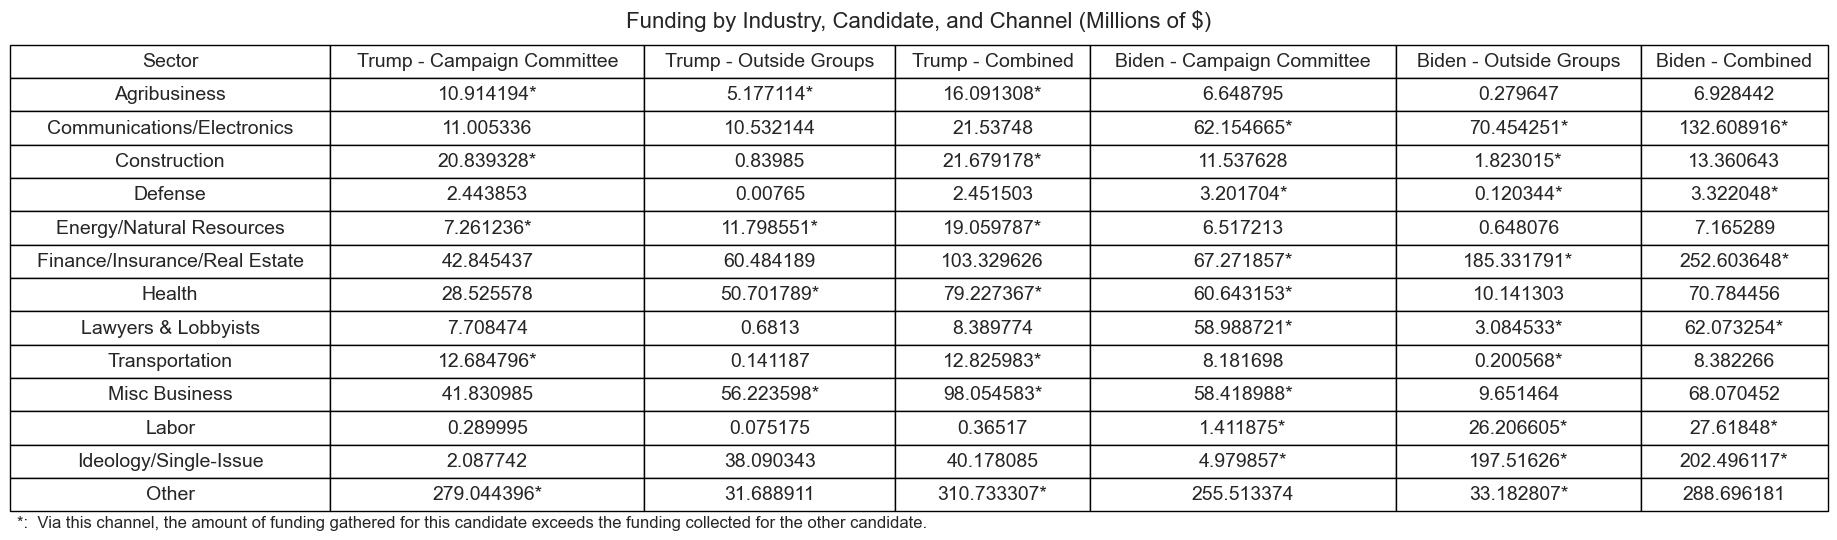

In [127]:
# TABLE
# Selecting needed rows from dataframes
trump_cc = pd.DataFrame(df1.iloc[0]).transpose()
trump_og = pd.DataFrame(df2.iloc[0]).transpose()
trump_c = pd.DataFrame(df0.iloc[0]).transpose()
biden_cc = pd.DataFrame(df1.iloc[1]).transpose()
biden_og = pd.DataFrame(df2.iloc[1]).transpose()
biden_c = pd.DataFrame(df0.iloc[1]).transpose()

# Combining all the rows to one dataframe
stacked_df = pd.concat([trump_cc, trump_og, trump_c, biden_cc, biden_og, biden_c], axis=0)
stacked_df['Candidate'] = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Trump - Combined', 'Biden - Campaign Committee', 'Biden - Outside Groups', 'Biden - Combined']
stacked_df.set_index('Candidate', inplace=True)
stacked_df = stacked_df.transpose()
stacked_df = stacked_df.reset_index().rename(columns={'index': 'Sector'})

# create function to compare and add asterisk
def add_asterisk(row):
    # compare columns 2 and 5
    if row[1] > row[4]:
        row[1] = str(row[1]) + '*'
    else:
        row[4] = str(row[4]) + '*'

    # compare columns 3 and 6
    if row[2] > row[5]:
        row[2] = str(row[2]) + '*'
    else:
        row[5] = str(row[5]) + '*'

    # compare columns 4 and 7
    if row[3] > row[6]:
        row[3] = str(row[3]) + '*'
    else:
        row[6] = str(row[6]) + '*'

    return row

# apply function to each row of dataframe
stacked_df = stacked_df.apply(add_asterisk, axis=1)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=stacked_df.values, colLabels=stacked_df.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(stacked_df.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Funding by Industry, Candidate, and Channel (Millions of $)'
plt.text(0, 0.08, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# add note below the plot
note = "*:  Via this channel, the amount of funding gathered for this candidate exceeds the funding collected for the other candidate."
plt.text(-0.2, -0.075, note, ha='left', va='bottom', fontsize=12)

# Show the plot
plt.show()

To summarize the table, Trump received more funds than Biden on these sectors: Agribusiness, Construction, Energy/Natrual Resources, Health, Transportation, Misc Business, and Other; while Biden received more funds than Trump on these sectors: Communications/Electronics, Defense, Finance/Insurance/Real Estate, Lawyers & Lobbyists, Labor, and Ideology/Single-Issue.

Trump's focus on deregulation and reducing environmental protections may have made him more attractive to industries such as Agribusiness, Construction, and Energy/Natural Resources, which often face regulatory hurdles that can be costly and time-consuming. On the other hand, Biden's policies on climate change, healthcare, and workers' rights may have resonated more with the Communications/Electronics, Defense, and Labor sectors.

Furthermore, the support of certain industries for a particular candidate can also be influenced by the interests of the businesses or individuals within those industries. For instance, the Finance/Insurance/Real Estate sector may have supported Biden due to his policies on taxes and financial regulation, while the Lawyers & Lobbyists sector may have supported him due to his support for civil rights and social justice issues.

The fact that Trump received more funds than Biden in the Transportation and Health sectors could also be attributed to his administration's handling of the COVID-19 pandemic, which heavily impacted these industries. Trump's focus on reopening the economy and his skepticism towards public health measures may have resonated with certain businesses within these sectors.

Overall, the differences in funding received by Trump and Biden in different sectors highlight the complex interplay between policy positions, industry interests, and political strategy in the 2020 US Presidential election. It also suggests that different groups of voters may have been more attracted to either Trump's or Biden's policies, depending on their respective industries or personal interests.

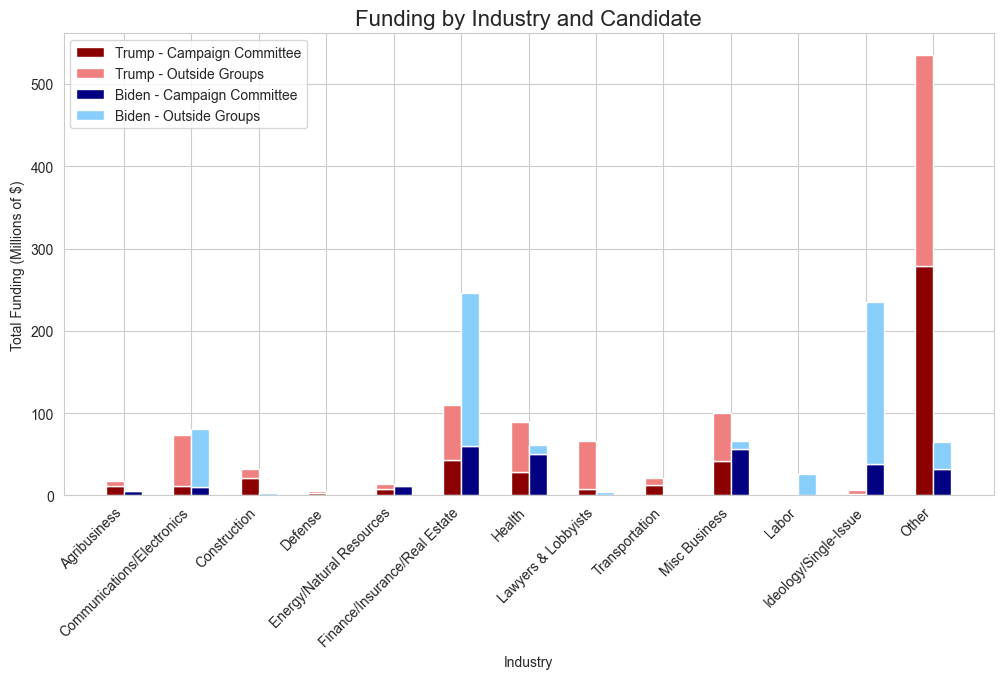

In [128]:
# PLOT
# define the column groups
groups = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources',
          'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business',
          'Labor', 'Ideology/Single-Issue', 'Other']

# define the two candidates
candidates = ['Trump, Donald (R)', 'Biden, Joe (D)']

# define the x-axis positions for each group of bars
x_positions = np.arange(len(groups)) * 3

# define the bar width
bar_width = 0.8

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# define the labels for the legend
labels = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Biden - Campaign Committee', 'Biden - Outside Groups']

# loop over each group of columns
for i in range(1, df1.shape[1]):

    # get the data for this group from the two dataframes
    data1 = np.array([df1.loc[df1['Candidate'] == 'Trump, Donald (R)', df_funds[1].columns[i]].values[0],
                      df1.loc[df1['Candidate'] == 'Biden, Joe (D)', df_funds[1].columns[i]].values[0]])
    data2 = np.array([df2.loc[df2['Candidate'] == 'Trump, Donald (R)', df_funds[2].columns[i]].values[0],
                      df2.loc[df2['Candidate'] == 'Biden, Joe (D)', df_funds[2].columns[i]].values[0]])

    # calculate the x-axis positions for the two bars in this group
    x_pos_left = x_positions[i - 1] - bar_width / 2
    x_pos_right = x_positions[i - 1] + bar_width / 2

    # plot the bars for the two candidates, stacked on top of each other
    ax.bar(x_pos_left, data1[0], width=bar_width, label=labels[0], color='darkred')
    ax.bar(x_pos_left, data1[1], width=bar_width, bottom=data1[0], color='lightcoral')
    ax.bar(x_pos_right, data2[0], width=bar_width, label=labels[2], color='navy')
    ax.bar(x_pos_right, data2[1], width=bar_width, bottom=data2[0], color='lightskyblue')

# set the x-axis tick labels to be the group names
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=45, ha = 'right')

# set the legend parameters
ax.legend(labels=labels, loc='upper left', title=None)

# set the axis labels and title
ax.set_xlabel('Industry')
ax.set_ylabel('Total Funding (Millions of $)')
ax.set_title('Funding by Industry and Candidate', fontsize=16)

# show the plot
plt.show()

From the above bar chart, for both Trump and Biden, the funding from the outside groups is almost equal to if not larger than the funding from the campaign committee. The fact is significant for several reasons, particularly in relation to the 2020 US Presidential election.

Firstly, it suggests that the official campaign committees of both Trump and Biden may have been limited in their ability to raise funds, or may have chosen to focus their efforts elsewhere, such as on grassroots organizing or digital advertising. This could reflect a shift in campaign strategy towards more decentralized, bottom-up approaches to fundraising and mobilization.

Secondly, the fact that the outside groups' funding is almost equal to or larger than the campaign committee funding for both candidates suggests that the 2020 US Presidential election was fiercely competitive and hotly contested. Both campaigns were likely aware of the importance of funding in securing victory, and may have gone to great lengths to secure support from outside groups, particularly those with deep pockets and significant influence.

Overall, the significant role played by outside groups in the 2020 US Presidential election highlights the importance of money and resources in modern political campaigns.

Another graph: pie chart of Trump and Biden

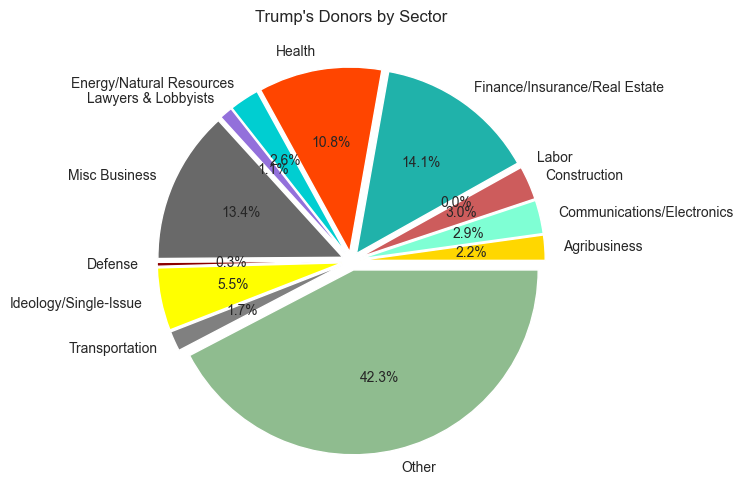

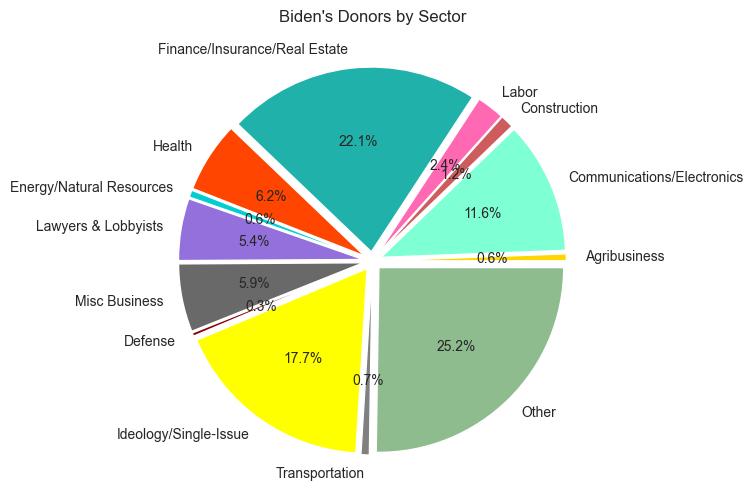

In [129]:
# Define the desired column order
new_order = ['Candidate',
             'Agribusiness', 'Communications/Electronics', 'Construction',
             'Labor', 'Finance/Insurance/Real Estate', 'Health',
             'Energy/Natural Resources', 'Lawyers & Lobbyists', 'Misc Business',
             'Defense', 'Ideology/Single-Issue', 'Transportation',
             'Other']

# Use reindex to reorder the columns
df00 = df0.reindex(columns=new_order)

# Filter data for Trump and Biden
trump_data = df00[df00['Candidate'] == 'Trump, Donald (R)'].iloc[:, 1:]
biden_data = df00[df00['Candidate'] == 'Biden, Joe (D)'].iloc[:, 1:]

# Sum contributions across sectors
trump_total = trump_data.sum(axis=0)
biden_total = biden_data.sum(axis=0)

# Set up colors for the pie chart
colors = ['#ffd700', '#7fffd4', '#cd5c5c',
          '#ff69b4', '#20b2aa', '#ff4500',
          '#00ced1', '#9370db', '#696969',
          '#8b0000', '#ffff00', '#808080',
          '#8fbc8f']

# Set up labels for the pie chart
labels_trump = trump_data.columns
labels_biden = biden_data.columns

# Set up explode parameter for the pie chart
explode_trump = [0.05] * len(labels_trump)
explode_biden = [0.05] * len(labels_biden)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(trump_total, labels=labels_trump, colors=colors, explode=explode_trump, autopct='%1.1f%%', textprops={'fontsize': 10})
ax.set_title("Trump's Donors by Sector")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(biden_total, labels=labels_biden, colors=colors, explode=explode_biden, autopct='%1.1f%%', textprops={'fontsize': 10})
ax.set_title("Biden's Donors by Sector")

plt.show()


In the above two pie charts, it is clear that for both Trump and Biden, the Finance/Insurance/Real Estate sector is contributing substantially to the fundraising. One reason could be that this sector is intrinsically holding higher margins in their business, and the other reason could be that its business environment is heavily depending on the government's policy, so they have larger incentives to influence the result of the election.

For Trump, the Other sector stands out from all and ranked top for the highest contribution. It would be attributed to Trump's business career before he ran for the US President. As a billionaire real estate developer, he made use of the Trump Organization to provide him huge financial support for his campaign. And this contribution is categorized in the Other sector.

For Biden, the portion of Ideology/Single-Issue sector is significantly higher than its portion in Trump's funds pool. The Ideology/Single-Issue sector includes organizations that focus on a single-issue area or are heavily partisan, such as those related to abortion, gun control, healthcare, environment, and foreign policy. Therefore, the reason could be that some certain groups - which were likely taking a more liberal stance on their issue - were severely unsatisfied with Trump administration from 2016 to 2020, so that they choose to firmly support Trump's opposition, Biden, by donating to his campaign financially.

### Second Dataset: 2020 Trump Presidential Campaign

In [130]:
df_polar = pd.DataFrame()
df_polar['state'] = pivoted_df['state']
df_polar['Solid Indicator'] = pivoted_df['Solid Indicator']

df_campaign = Rallies_2020.copy()
df_campaign['state'] = df_campaign['State'].map(state_dict)

name_counts = df_campaign['state'].value_counts()
df_campaign_num = pd.DataFrame({'state': name_counts.index, 'count': name_counts.values})

df_polar = pd.merge(df_polar, df_campaign_num[['state', 'count']], on='state', how='left')
df_polar['count'] = df_polar['count'].fillna(0)
df_polar.rename(columns={"count": "# of 2020 Trump Presidential Campaigns"}, inplace = True)

df_polar.head()

state  Solid Indicator  # of 2020 Trump Presidential Campaigns
0     Alabama         4.267006                                     0.0
1      Alaska         0.871419                                     0.0
2     Arizona         0.442119                                     7.0
3    Arkansas         3.124530                                     0.0
4  California         3.663969                                     0.0

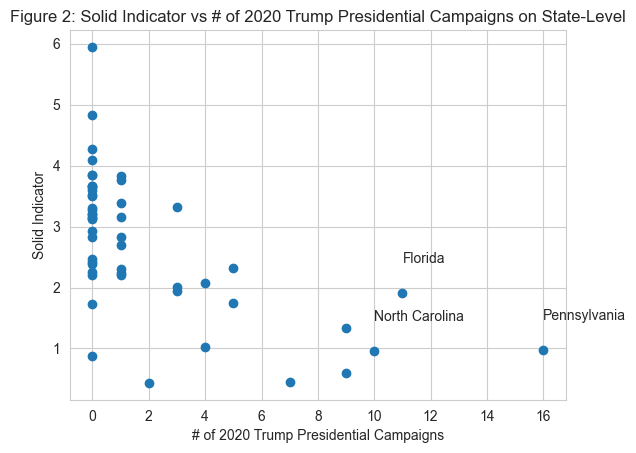

In [131]:
df_1 = df_polar.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['Solid Indicator', "# of 2020 Trump Presidential Campaigns"])

X = df_2["# of 2020 Trump Presidential Campaigns"]
y = df_2['Solid Indicator']
labels = df_2['state']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o')

for i, label in enumerate(labels):
    if X.iloc[i] >= 10:
        ax.annotate(label, (X.iloc[i], y.iloc[i]+0.5))

ax.set_xlabel("# of 2020 Trump Presidential Campaigns")
ax.set_ylabel('Solid Indicator')
ax.set_title("Figure 2: Solid Indicator vs # of 2020 Trump Presidential Campaigns on State-Level")
plt.show()

In the above plot, we can see that the frequency of Trump's rallies is reciprocally correlated with the level of polarization in each state, as indicated by the Solid Indicator. This suggests that Trump's campaign strategy focused on targeting states with low levels of solidness, perhaps in an effort to win over swing voters and expand his base of support. This makes great sense to spend most of his energy on the swing states with large population such as Pennsylvania, Florida, and North Carolina, so that it would be most cost-efficient for him to win the most votes.

Moreover, it is important to note that Trump's campaign strategy may have also been influenced by the electoral college system in the United States, which awards votes on a winner-takes-all basis in most states. This means that a candidate who wins a state by a small margin can potentially win all the votes, making it crucial to focus resources on swing states with large populations.

## Adding a New Dataset

### First Dataset
New Dataset: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project?resource=download&select=states_all.csv

Recall that the one of purposes of this paper was to study what kind of citizen would vote for Trump in the 2020 Election. From the previous discussion, we learned that Trump was more favored by people holding conservative views, who may potentially have lower educational attainments. This dataset contains the percentage of population over 25 years old who have obtained Bachelor's degree or higher, which can be a good approximation for the educational attainment level of each state when the 2020 election happened.

In [132]:
df_higher_edu = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_education.csv')
df_higher_edu["Bachelor's degree or higher"] = df_higher_edu["Bachelor's degree or higher"].replace('%', '', regex=True).astype(float)
df_higher_edu.rename(columns={"Bachelor's degree or higher":"Bachelor's degree or higher (%)"}, inplace = True)

df_higher_edu.head()

NAME  Bachelor's degree or higher (%)
0     Alabama                             24.5
1      Alaska                             29.0
2     Arizona                             28.9
3    Arkansas                             21.5
4  California                             32.6

Scatter plot of Educational attainment and vote share of Trump

In [133]:
compare_edu_vote = pd.merge(df_higher_edu, df_trump_vote_sum, on='NAME', how='left')
compare_edu_vote.head()

NAME  Bachelor's degree or higher (%)     TRUE    FALSE  Grand Total  \
0     Alabama                             24.5  1234925   206243      1441168   
1      Alaska                             29.0   119801    70091       189892   
2     Arizona                             28.9   413575  1248111      1661686   
3    Arkansas                             21.5   669488    91159       760647   
4  California                             32.6   709784  5296177      6005961   

   total_votes     ratio  
0      2323304  0.620310  
1       359530  0.528167  
2      3387326  0.490560  
3      1219069  0.623957  
4     17495906  0.343278

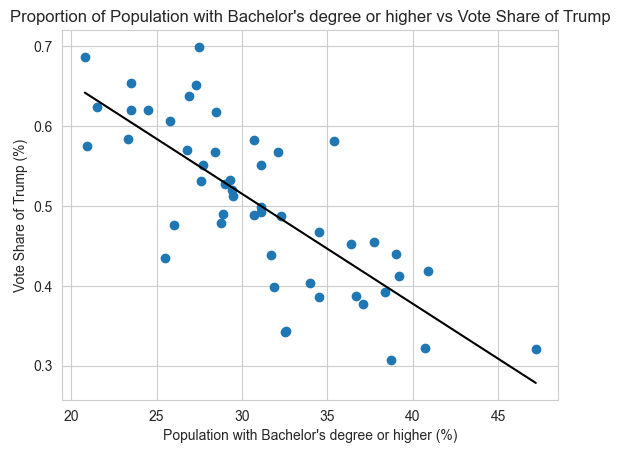

In [134]:
df_2 = compare_edu_vote.dropna(subset=['ratio', "Bachelor's degree or higher (%)"])

X = df_2["Bachelor's degree or higher (%)"]
y = df_2['ratio']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o')

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlabel("Population with Bachelor's degree or higher (%)")
plt.ylabel('Vote Share of Trump (%)')

plt.title("Proportion of Population with Bachelor's degree or higher vs Vote Share of Trump")

plt.show()

In [135]:
df_edu = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_county_educational_attainment.csv')
df_edu.head()

state   county  \
0  Alabama  Autauga   
1  Alabama  Baldwin   
2  Alabama  Barbour   
3  Alabama     Bibb   
4  Alabama   Blount   

   Population 18 to 24 years with Bachelor's degree or higher  \
0                                                612            
1                                               1360            
2                                                 84            
3                                                 24            
4                                                127            

   Population 25 years and over with Bachelor's degree or higher  
0                                              10721              
1                                              49636              
2                                               2067              
3                                               1814              
4                                               5276

In [136]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 4 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   state                                                          3221 non-null   object
 1   county                                                         3221 non-null   object
 2   Population 18 to 24 years with Bachelor's degree or higher     3221 non-null   int64 
 3   Population 25 years and over with Bachelor's degree or higher  3221 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 100.8+ KB


In [173]:
df_county_pop_copy = df_county_pop.copy()
df_county_pop_copy.drop(['population'], axis = 1, inplace = True)
df_county_pop_copy = pd.merge(df_county_pop_copy, df_county_population[['state', 'county', 'population']], on=['state', 'county'], how='left')
df_county_pop_copy.rename(columns={'NAME':'state'}, inplace=True)
df_county_pop_copy.head()

state    county     candidate party   won  won_votes  county_total_votes  \
0  Florida       Bay  Donald Trump   REP  True      66097               93024   
1  Florida   Brevard  Donald Trump   REP  True     207883              360764   
2  Florida  Escambia  Donald Trump   REP  True      96674              170372   
3  Florida   Flagler  Donald Trump   REP  True      43043               71716   
4  Florida  Hernando  Donald Trump   REP  True      70412              108922   

   trump_vote_share      lat      lng  density  effective_voting_rate  \
0         71.053707  30.1995 -85.6003    395.0              62.279234   
1         57.622989  27.9631 -80.6593    508.0              72.640947   
2         56.742892  30.4413 -87.1911    901.0              47.232272   
3         60.018685  29.5389 -81.2457    357.0              18.559321   
4         64.644424  28.4798 -82.5300    732.0              65.803560   

   population  
0    142019.0  
1    485337.0  
2    250446.0  
3     93780.0  
4    155637.0

In [180]:
df_pivot_copy = df_pivot.copy()
df_pivot_copy['trump_vote_share'] = 100*df_pivot_copy['Donald Trump']/(df_pivot_copy['Donald Trump']+df_pivot_copy['Joe Biden']+df_pivot_copy['Others'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   4633 non-null   object 
 1   county                  4633 non-null   object 
 2   Donald Trump            4633 non-null   int64  
 3   Joe Biden               4633 non-null   int64  
 4   Others                  4633 non-null   int64  
 5   Solid Indicator         4633 non-null   float64
 6   Polarization Indicator  4631 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 253.5+ KB


In [175]:
df_county_edu = pd.merge(df_county_pop_copy, df_edu, on = ['state', 'county'], how='outer')
df_county_edu = df_county_edu.dropna()
df_county_edu["Bachelor's degree or higher (%)"] = (df_county_edu["Population 18 to 24 years with Bachelor's degree or higher"] + df_county_edu["Population 25 years and over with Bachelor's degree or higher"])/df_county_edu['population']*100
df_county_edu.drop(df_county_edu[df_county_edu["Bachelor's degree or higher (%)"] >= 100].index, inplace = True)
df_county_edu.head()

state    county     candidate party   won  won_votes  county_total_votes  \
0  Florida       Bay  Donald Trump   REP  True    66097.0             93024.0   
1  Florida   Brevard  Donald Trump   REP  True   207883.0            360764.0   
2  Florida  Escambia  Donald Trump   REP  True    96674.0            170372.0   
3  Florida   Flagler  Donald Trump   REP  True    43043.0             71716.0   
4  Florida  Hernando  Donald Trump   REP  True    70412.0            108922.0   

   trump_vote_share      lat      lng  density  effective_voting_rate  \
0         71.053707  30.1995 -85.6003    395.0              62.279234   
1         57.622989  27.9631 -80.6593    508.0              72.640947   
2         56.742892  30.4413 -87.1911    901.0              47.232272   
3         60.018685  29.5389 -81.2457    357.0              18.559321   
4         64.644424  28.4798 -82.5300    732.0              65.803560   

   population  Population 18 to 24 years with Bachelor's degree or higher  \
0    142019.0                                              987.0            
1    485337.0                                             3967.0            
2    250446.0                                             4148.0            
3     93780.0                                              543.0            
4    155637.0                                              659.0            

   Population 25 years and over with Bachelor's degree or higher  \
0                                            31305.0               
1                                           136909.0               
2                                            58279.0               
3                                            22237.0               
4                                            27276.0               

   Bachelor's degree or higher (%)  
0                        22.737803  
1                        29.026429  
2                        24.926331  
3                        24.290894  
4                        17.948817

In [141]:
df_county_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 803
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   state                                                          684 non-null    object 
 1   county                                                         684 non-null    object 
 2   candidate                                                      684 non-null    object 
 3   party                                                          684 non-null    object 
 4   won                                                            684 non-null    object 
 5   won_votes                                                      684 non-null    float64
 6   county_total_votes                                             684 non-null    float64
 7   trump_vote_share                                              

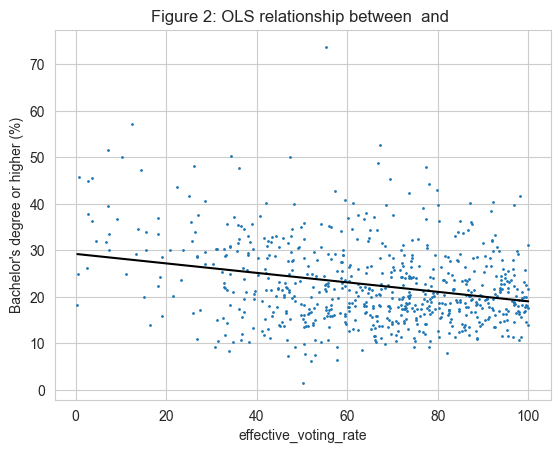

In [142]:
df_1 = df_county_edu.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['effective_voting_rate', "Bachelor's degree or higher (%)"])

X = df_2['effective_voting_rate']
y = df_2["Bachelor's degree or higher (%)"]

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('effective_voting_rate')
ax.set_ylabel("Bachelor's degree or higher (%)")
ax.set_title("Figure 2: OLS relationship between  and ")
plt.show()

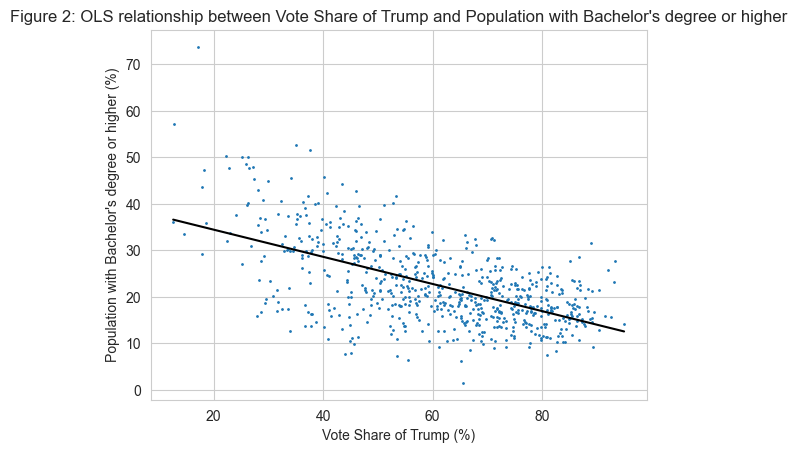

In [143]:
df_1 = df_county_edu.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['trump_vote_share', "Bachelor's degree or higher (%)"])

X = df_2['trump_vote_share']
y = df_2["Bachelor's degree or higher (%)"]

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('Vote Share of Trump (%)')
ax.set_ylabel("Population with Bachelor's degree or higher (%)")
ax.set_title("Figure 2: OLS relationship between Vote Share of Trump and Population with Bachelor's degree or higher")
plt.show()

### Second Dataset
New Dataset: https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations

In [144]:
df_county_income = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/kaggle_income.csv', encoding='Latin-1')
df_county_income.rename(columns={"State_Name": "state", 'County':'county'}, inplace=True)
df_county_income = df_county_income.loc[:, ['state', 'county', 'Mean', 'Median', 'Stdev']]
df_county_income['county'] = df_county_income['county'].replace(' County', '', regex=True)
df_county_income.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_county_income['Mean'] = df_county_income['Mean'].div(1000)
df_county_income['Median'] = df_county_income['Median'].div(1000)
df_county_income['Stdev'] = df_county_income['Stdev'].div(1000)
df_county_income.head()

state    county    Mean  Median   Stdev
0  Alabama    Mobile  38.773  30.506  33.101
1  Alabama   Barbour  37.725  19.528  43.789
2  Alabama    Shelby  54.606  31.930  57.348
5  Alabama   Cullman  50.715  42.643  35.886
6  Alabama  Escambia  33.737  23.610  28.256

In [145]:
df_county_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 32172
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   1678 non-null   object 
 1   county  1678 non-null   object 
 2   Mean    1678 non-null   float64
 3   Median  1678 non-null   float64
 4   Stdev   1678 non-null   float64
dtypes: float64(3), object(2)
memory usage: 78.7+ KB


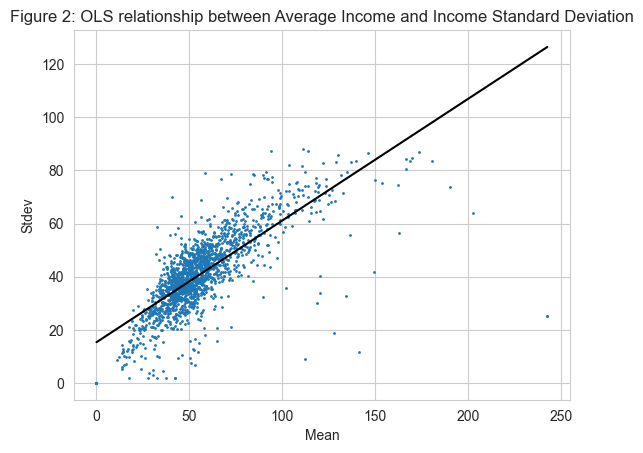

In [146]:
df_1 = df_county_income.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['Mean', 'Stdev'])

X = df_2['Mean']
y = df_2['Stdev']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('Mean')
ax.set_ylabel('Stdev')
ax.set_title("Figure 2: OLS relationship between Average Income and Income Standard Deviation")
plt.show()

In [147]:
df_income = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/income.csv')
df_income.rename(columns={"State_Name": "NAME"}, inplace=True)
df_income.head()

NAME  Average of Mean  Average of Median  Average of Stdev
0     Alabama      54023.75287        63252.24713       42045.37548
1      Alaska      79178.36893       111026.48540       52765.11650
2     Arizona      63400.11494        80416.21839       44199.91133
3    Arkansas      52213.93215        52536.12389       40938.36578
4  California      78654.29711       101260.92200       54015.27655

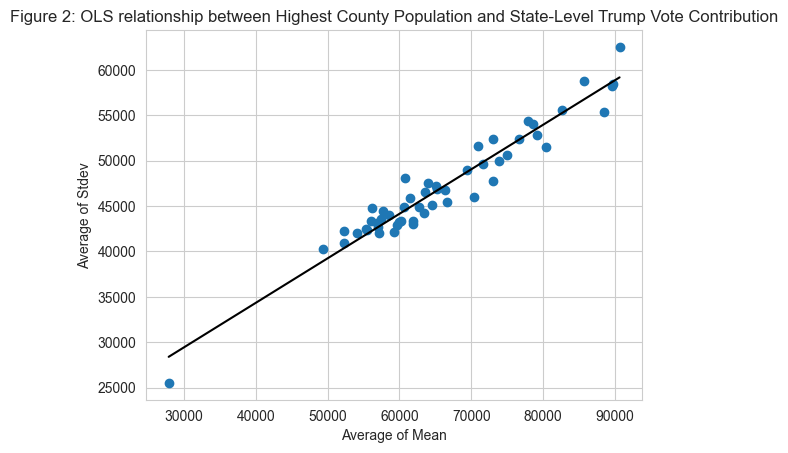

In [149]:
df_1 = df_income.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['Average of Mean', 'Average of Stdev'])

X = df_2['Average of Mean']
y = df_2['Average of Stdev']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o')

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('Average of Mean')
ax.set_ylabel('Average of Stdev')
ax.set_title("Figure 2: OLS relationship between Highest County Population and State-Level Trump Vote Contribution")
plt.show()

In [150]:
compare_income_vote = pd.merge(df_income, df_trump_vote_sum, on='NAME', how='left')
compare_income_vote.dropna(inplace=True)
compare_income_vote.head()

NAME  Average of Mean  Average of Median  Average of Stdev  \
0     Alabama      54023.75287        63252.24713       42045.37548   
1      Alaska      79178.36893       111026.48540       52765.11650   
2     Arizona      63400.11494        80416.21839       44199.91133   
3    Arkansas      52213.93215        52536.12389       40938.36578   
4  California      78654.29711       101260.92200       54015.27655   

        TRUE      FALSE  Grand Total  total_votes     ratio  
0  1234925.0   206243.0    1441168.0    2323304.0  0.620310  
1   119801.0    70091.0     189892.0     359530.0  0.528167  
2   413575.0  1248111.0    1661686.0    3387326.0  0.490560  
3   669488.0    91159.0     760647.0    1219069.0  0.623957  
4   709784.0  5296177.0    6005961.0   17495906.0  0.343278

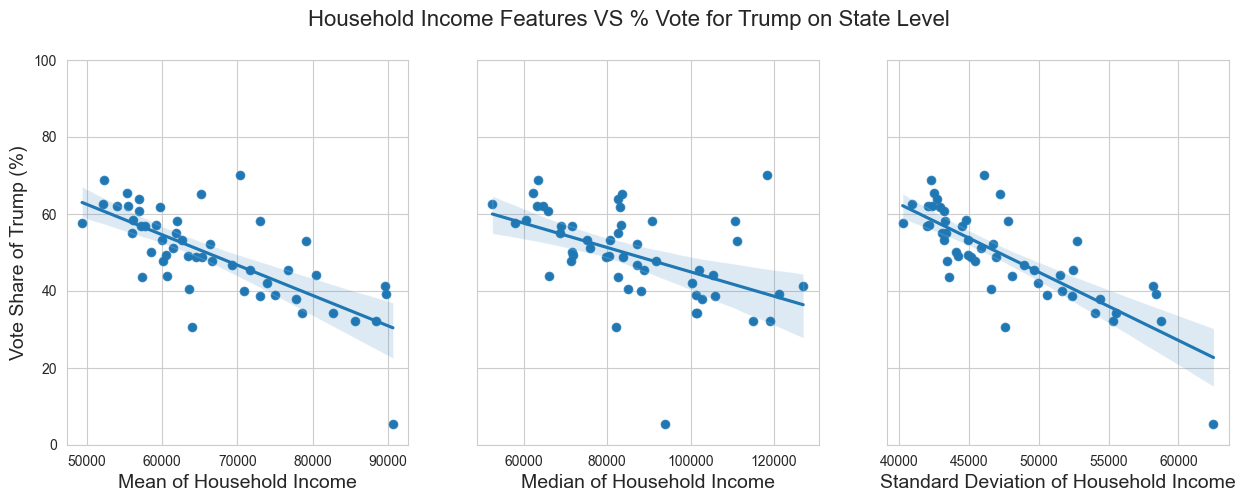

In [151]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(data=compare_income_vote, x='Average of Mean', y= compare_income_vote['ratio']*100, ax=ax1)
sns.regplot(data=compare_income_vote, x='Average of Mean', y= compare_income_vote['ratio']*100, ax=ax1)
sns.scatterplot(data=compare_income_vote, x='Average of Median', y= compare_income_vote['ratio']*100, ax=ax2)
sns.regplot(data=compare_income_vote, x='Average of Median', y= compare_income_vote['ratio']*100, ax=ax2)
sns.scatterplot(data=compare_income_vote, x='Average of Stdev', y= compare_income_vote['ratio']*100, ax=ax3)
sns.regplot(data=compare_income_vote, x='Average of Stdev', y= compare_income_vote['ratio']*100, ax=ax3)
ax1.set_ylabel("Vote Share of Trump (%)", fontsize=14)
ax1.set_xlabel("Mean of Household Income", fontsize=14)
ax2.set_xlabel("Median of Household Income", fontsize=14)
ax3.set_xlabel("Standard Deviation of Household Income", fontsize=14)
ax1.set_ylim([0, 100])
fig.suptitle("Household Income Features VS % Vote for Trump on State Level", fontsize=16)
plt.show()

Given the shaded area where the true regression lines is expected to fall with a 95% degree of confidence, it is evident that all three aspects of household income - mean, median, and standard deviation - are negatively correlated with the vote share of Trump. The richer the neighborhood is, the less likely they favor Trump. Related with the county size, as the population gathered in one county increases, the more industrialized and commercialized the county becomes. What follows is the widened gap among the rich and poor, which drives the three income features high. Therefore, the above graphs strengthens our initial statement that the likelihood of Trump being supported is higher in the smaller counties and rural places rather than urban cities.

In [152]:
df_median_age = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_median_age.csv')
df_median_age.head()

state   county  median_age
0  Alabama  Autauga        39.2
1  Alabama  Baldwin        43.7
2  Alabama  Barbour        40.8
3  Alabama     Bibb        40.2
4  Alabama   Blount        41.1

In [153]:
df_median_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       3143 non-null   object 
 1   county      3143 non-null   object 
 2   median_age  3143 non-null   float64
dtypes: float64(1), object(2)
memory usage: 73.8+ KB


In [154]:
df_county_age = pd.merge(df_county_pop, df_median_age, on = ['state', 'county'], how='left')
df_county_age = df_county_age.dropna()
df_county_age.head()

state    county     candidate party   won  won_votes  county_total_votes  \
0  Florida       Bay  Donald Trump   REP  True      66097               93024   
1  Florida   Brevard  Donald Trump   REP  True     207883              360764   
2  Florida  Escambia  Donald Trump   REP  True      96674              170372   
3  Florida   Flagler  Donald Trump   REP  True      43043               71716   
4  Florida  Hernando  Donald Trump   REP  True      70412              108922   

   trump_vote_share      lat      lng  population  density  \
0         71.053707  30.1995 -85.6003      149366    395.0   
1         57.622989  27.9631 -80.6593      496640    508.0   
2         56.742892  30.4413 -87.1911      360711    901.0   
3         60.018685  29.5389 -81.2457      386415    357.0   
4         64.644424  28.4798 -82.5300      165526    732.0   

   effective_voting_rate  median_age  
0              62.279234        41.9  
1              72.640947        47.4  
2              47.232272        37.5  
3              18.559321        52.5  
4              65.803560        48.5

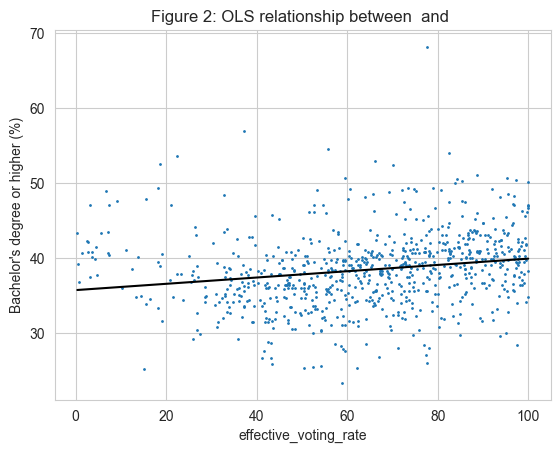

In [155]:
df_1 = df_county_age.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['effective_voting_rate', "median_age"])

X = df_2['effective_voting_rate']
y = df_2["median_age"]

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('effective_voting_rate')
ax.set_ylabel("Bachelor's degree or higher (%)")
ax.set_title("Figure 2: OLS relationship between  and ")
plt.show()

# Final Project
## OLS Regression
In this section, we will revisit four critical features of 2020 Presidential Election: VEP Turnout Rate, Vote Share of Trump, Solid Indicator, and Polarization Indicator.

The variables on the Regression Results tables are showing up in an order that the first variable is yielding the highest R-squared value on its own, the second variable is improving the R-squared the most amongst the rest of the variables, and so on.

### VEP Turnout Rate ~ Median age of the population, Average Annual Income (USD1,000), log(VEP)
A regression about VEP Turnout Rate is necessary because it is an important measure of political participation and democracy. Higher turnout rates indicate a higher level of engagement and civic responsibility among voters, which can lead to better representation and more responsive government. Voters casting their votes is the first step for the candidate to win. For Donald Trump specifically, it is important for him to promote attractive policy to regions with high turnout rate, so that he is spending the campaign funds in the most effective way. Here is the definition for VEP Turnout Rate used in the following regression:

$$\text{VEP Turnout Rate (\%) in a state} = 100*\frac{\text{Effective Votes in a state}}{\text{VEP in a state}} $$

There are three variables which are believed to be valuable in this regression model.

Median Age of Population: Age can play a role in determining voter turnout, as older individuals tend to have higher turnout rates than younger individuals (Dassonneville, 2016). This may be due to a variety of factors, including the fact that older individuals may have more experience with the political process, be more likely to have established a habit of voting, and have more resources available to them (e.g. retirement income) to devote to political campaigns.

Average Annual Income: Income is often seen as a predictor of political participation, with higher-income individuals being more likely to vote. This may be due to a variety of factors, including the fact that higher-income individuals may have more resources to devote to political campaigns, be more educated and politically informed, and be more invested in the political process (Filer, 1993).

VEP: One potential theory that could support a non-linear relationship is the idea of voter fatigue (Stockemer 2017). This theory suggests that as turnout rates increase, voters may become less likely to vote due to exhaustion, apathy, or other factors. If this theory is correct, we might expect to see a non-linear relationship between turnout rate and population, with higher turnout rates at lower levels of population, followed by a plateau or even a decline at higher levels of population.

In [156]:
df_county_turnout = pd.merge(df_pc, df_median_age, on=['state', 'county'], how='left')
df_county_turnout.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county_turnout.rename(columns={"current_votes":"county_total_votes"}, inplace=True)
df_county_turnout = pd.merge(df_county_turnout, df_county_vep, on=['state', 'county'], how='left')
df_county_turnout['VEP Turnout Rate (%)'] = 100*df_county_turnout['county_total_votes']/df_county_turnout['VEP']
df_county_turnout.drop(df_county_turnout[df_county_turnout["VEP Turnout Rate (%)"] >= 100].index, inplace = True)
df_county_turnout.drop(df_county_turnout[df_county_turnout["VEP Turnout Rate (%)"] <= 20].index, inplace = True)
df_county_turnout['Log of VEP'] = np.log(df_county_turnout['VEP'])
df_county_turnout = pd.merge(df_county_turnout, df_county_income, on=['state', 'county'], how='left')
df_county_turnout.rename(
    columns={"median_age": "Median Age (years)", "Mean":"Avg Annual Income (USD1,000)"}, inplace=True)
df_county_edu2 = df_county_edu.loc[:, ['state', 'county', "Bachelor's degree or higher (%)"]]
df_county_turnout = pd.merge(df_county_turnout, df_county_edu2, on=["state", 'county'], how='left')
df_county_turnout.drop(df_county_turnout[df_county_turnout["Avg Annual Income (USD1,000)"] <= 30].index, inplace = True)
df_county_turnout.drop(df_county_turnout[df_county_turnout["Bachelor's degree or higher (%)"] <= 5].index, inplace = True)

df_county_turnout.head()

state      county  county_total_votes  Median Age (years)  \
0              Delaware        Kent               87025                38.0   
1              Delaware  New Castle              287633                38.9   
2              Delaware      Sussex              129352                51.2   
3  District of Columbia      Ward 1               41681                 NaN   
4  District of Columbia      Ward 2               32881                 NaN   

             VEP  VEP Turnout Rate (%)  Log of VEP  \
0  129009.987494             67.456018   11.767645   
1  415138.923027             69.285963   12.936368   
2  178892.988059             72.306915   12.094543   
3            NaN                   NaN         NaN   
4            NaN                   NaN         NaN   

   Avg Annual Income (USD1,000)  Median   Stdev  \
0                        68.711  57.408  53.427   
1                        87.980  79.592  58.990   
2                        58.812  51.005  44.583   
3                           NaN     NaN     NaN   
4                           NaN     NaN     NaN   

   Bachelor's degree or higher (%)  
0                        22.566106  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN

Regression for VEP Turnout Rate:

In [158]:
df_county_turnout['const'] = 1
var1 = 'Median Age (years)'
var2 = "Bachelor's degree or higher (%)"
var3 = 'Log of VEP'
var4 = 'Avg Annual Income (USD1,000)'
reg1 = sm.OLS(endog = df_county_turnout['VEP Turnout Rate (%)'],
              exog = df_county_turnout[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_county_turnout['VEP Turnout Rate (%)'],
              exog = df_county_turnout[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_county_turnout['VEP Turnout Rate (%)'],
              exog = df_county_turnout[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_county_turnout['VEP Turnout Rate (%)'],
              exog = df_county_turnout[['const', var1, var2, var3, var4]], missing = 'drop')
result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
stargazer = Stargazer([result1, result2, result3, result4])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4'], [1,1,1,1])
stargazer.title("Regression Results")
HTML(stargazer.render_html())

From our results, we see that Model 3 has the best explanatory power:

- The intercept $ \hat{\beta}_0 = 100.81 $.
- The leading coefficient $ \hat{\beta}_1 = -0.833 $.
- The negative $ \hat{\beta}_1 $ parameter estimate implies that median age is negatively associated with VEP Turnout Rate
- The leading coefficient $ \hat{\beta}_2 = -0.138$.
- The negative $ \hat{\beta}_2 $ parameter estimate implies that average annual income is negatively associated with VEP Turnout Rate
- The leading coefficient $ \hat{\beta}_3 = 0$.
- The zero $ \hat{\beta}_3 $ parameter estimate implies that average annual income is not associated with VEP Turnout Rate
- The F-statistic of 10.771 has a df of 3 and 47, implies that the test was performed with four groups and that there is a significant difference between the variances of at least three of the groups.
- The p-value corresponding to the F-statistic implies that the effect of the three variables on VEP Turnout Rate is statistically significant (using p < 0.01 as a rejection rule).
- The R-squared value of 0.407 indicates that around 40.7% of variation in VEP Turnout Rate is explained by median age, average annual income, and VEP.

Using our parameter estimates, we can now write our estimated relationship as

$$
\widehat{\text{VEP Turnout Rate}_i} = 100.81 - 0.833 \ {\text{Median Age}}_i - 0.138 \ {\text{Average Annul Income}}_i
$$

Among these three models, the R-squared value suggests that Median Age has the highest explanatory power (37.4%) to the variation in the VEP Turnout Rate. And as we add on the other two variables, the improvement in the ability to explain was mild, each increased to 40.4%, and 40.7%. Overall, the three variables do not deliver strong estimation of VEP Turnout Rate, although those three are the top 3 variables that I tested to be the most correlated among many other variables such as educational attainment, number of campaigns, race, and et cetera.

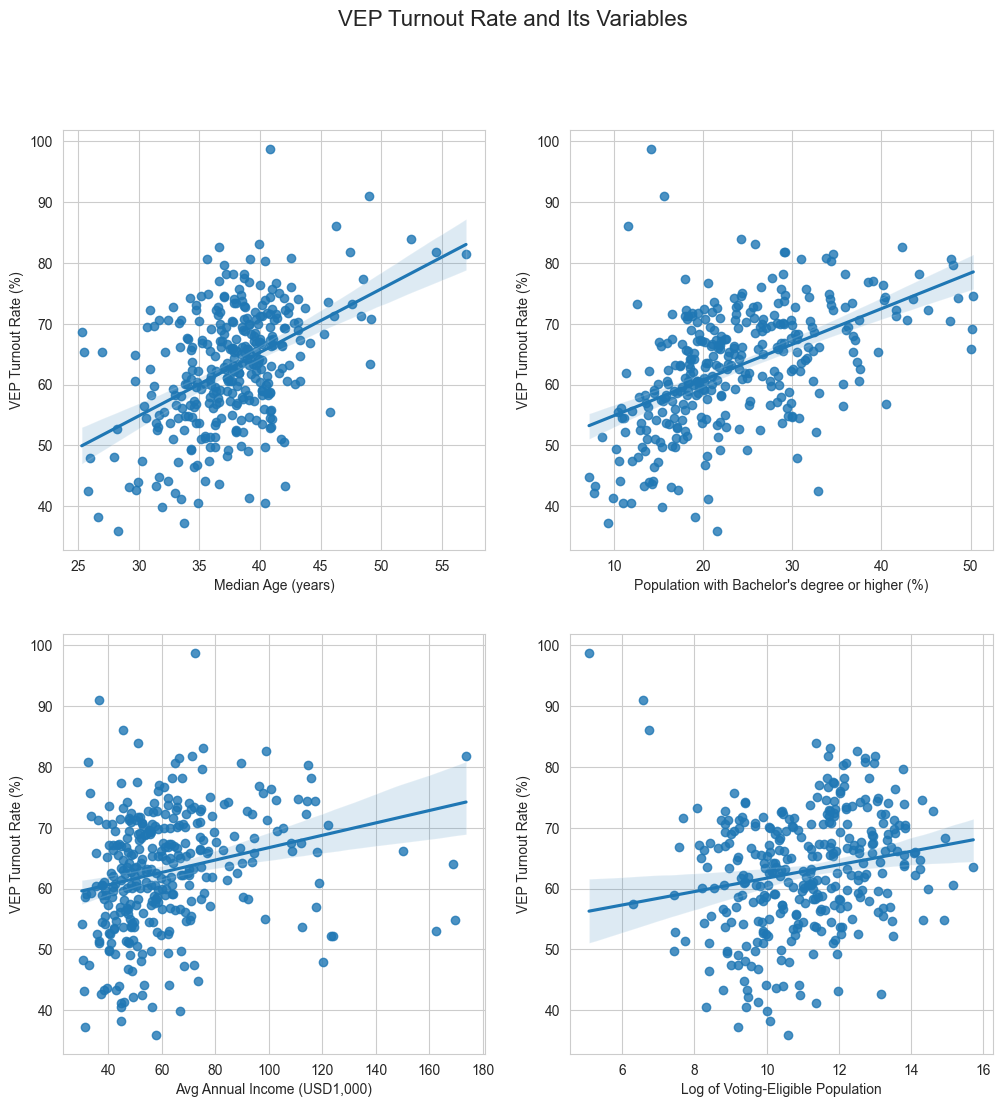

In [159]:
df_1 = df_county_turnout.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['VEP Turnout Rate (%)', 'Median Age (years)', 'Avg Annual Income (USD1,000)', "Bachelor's degree or higher (%)", 'Log of VEP'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

# Regression plot with Median Age
sns.regplot(x='Median Age (years)', y='VEP Turnout Rate (%)', data=df_2, ax=ax1)
ax1.set_xlabel('Median Age (years)')
ax1.set_ylabel('VEP Turnout Rate (%)')

# Regression plot with Log of Voting-Eligible Population
sns.regplot(x="Bachelor's degree or higher (%)", y='VEP Turnout Rate (%)', data=df_2, ax=ax2)
ax2.set_xlabel("Population with Bachelor's degree or higher (%)")

# Regression plot with Average Annual Income
sns.regplot(x='Avg Annual Income (USD1,000)', y='VEP Turnout Rate (%)', data=df_2, ax=ax3)
ax3.set_xlabel('Avg Annual Income (USD1,000)')

# Regression plot with Log of Voting-Eligible Population
sns.regplot(x="Log of VEP", y='VEP Turnout Rate (%)', data=df_2, ax=ax4)
ax4.set_xlabel("Log of Voting-Eligible Population")

plt.suptitle("VEP Turnout Rate and Its Variables", fontsize=16)

plt.show()

The above statement can also be supported by the regression graphs generated here. In the third plot for VEP, the 95% confidence interval for the true regression line indicates that there is less certainty in the regression line's estimate. In addition, since the line is almost flat, we can conclude that the VEP Turnout Rate has little to no correlation with VEP. Therefore, Trump's campaign strategy should consider less on the number of VEP, and more on the counties where the population are more aged and wealthier.

Additional information we can draw from the third graph is that all the dots are symmetrically distributed around 68% VEP Turnout Rate. This suggests that on average, the effective votes comes from 68% of VEP.

### Vote Share of Trump (%)~ Annual Income Standard Deviation (USD10,000), Bachelor's degree or higher (%), Unemployment Rate (%)

A regression about Vote Share of Trump is crucial in this paper because it measures the variables that would directly indicate the votes Trump would receive in a given state. By examining the factors that influence Vote Share, we can gain insights into what motivates people to support Trump, and how economic and social factors might influence political preferences. The formula for Vote Share of Trump is:

$$\text{Vote Share of Trump (\%)} = 100*\frac{\text{Total Votes for Trump in a state}}{\text{Total Votes in a state}}$$

This regression model will examine three variables that are believed to be valuable in explaining variation in Vote Share:

Annual Income Standard Deviation: Income inequality is a significant concern in many parts of the United States, and some research suggests that higher levels of income inequality may lead to greater polarization in political preferences (McCarty et al., 2016). By including Annual Income Standard Deviation as a variable in our regression, we can investigate whether higher levels of income inequality are associated with higher levels of support for Donald Trump.

Bachelor's degree or higher: Education attainment is often seen as a predictor of political participation and preferences, with more educated individuals being more likely to vote and having more liberal political preferences (Delli Carpini & Keeter, 1996). By including the percentage of individuals with Bachelor's degrees or higher as a variable in our regression, we can investigate whether education attainment is associated with lower levels of support for Donald Trump.

Unemployment Rate: Unemployment is a key economic indicator that has been shown to influence voting behavior in previous elections (Erikson et al., 1987). By including the Unemployment Rate as a variable in our regression, we can investigate whether higher levels of unemployment are associated with higher levels of support for Donald Trump.

In [160]:
df_vote_share = pd.merge(df_county_pop_copy, df_county_income, on=['state', 'county'], how='left')

df_county_edu2 = df_county_edu.loc[:, ['state', 'county', "Bachelor's degree or higher (%)"]]
df_vote_share = pd.merge(df_vote_share, df_county_edu2, on=["state", 'county'], how='left')
df_vote_share.drop(df_vote_share[df_vote_share["Bachelor's degree or higher (%)"] <= 5].index, inplace = True)
df_vote_share = pd.merge(df_vote_share, df_county_unemployment, on=['state', 'county'], how='left')
df_vote_share.rename(columns={"trump_vote_share":"Vote Share of Trump (%)", "Stdev":"Standard Deviation of Income (USD1,000)", "density":"Density (ppl/sq mi)"}, inplace=True)
df_vote_share = pd.merge(df_vote_share, df_white, on=['state', 'county'], how='left')
df_vote_share.drop(df_vote_share[df_vote_share["Standard Deviation of Income (USD1,000)"] < 1].index, inplace = True)
df_vote_share['White Population (%)'] = df_vote_share['White Population (%)'].astype(float)
df_vote_share.head()

state    county     candidate party   won  won_votes  county_total_votes  \
0  Florida       Bay  Donald Trump   REP  True      66097               93024   
1  Florida   Brevard  Donald Trump   REP  True     207883              360764   
2  Florida  Escambia  Donald Trump   REP  True      96674              170372   
3  Florida   Flagler  Donald Trump   REP  True      43043               71716   
4  Florida  Hernando  Donald Trump   REP  True      70412              108922   

   Vote Share of Trump (%)      lat      lng  Density (ppl/sq mi)  \
0                71.053707  30.1995 -85.6003                395.0   
1                57.622989  27.9631 -80.6593                508.0   
2                56.742892  30.4413 -87.1911                901.0   
3                60.018685  29.5389 -81.2457                357.0   
4                64.644424  28.4798 -82.5300                732.0   

   effective_voting_rate  population    Mean  Median  \
0              62.279234    142019.0     NaN     NaN   
1              72.640947    485337.0  71.120  53.932   
2              47.232272    250446.0  28.472  23.486   
3              18.559321     93780.0  51.038  36.323   
4              65.803560    155637.0  44.558  29.578   

   Standard Deviation of Income (USD1,000)  Bachelor's degree or higher (%)  \
0                                      NaN                        22.737803   
1                                   58.884                        29.026429   
2                                   24.358                        24.926331   
3                                   45.689                        24.290894   
4                                   31.196                        17.948817   

  State_ab  Labor Force  Employed  Unemployed  Unemployment Rate (%)  \
0       FL      82680.0   77353.0      5327.0                    6.4   
1       FL     281504.0  261302.0     20202.0                    7.2   
2       FL     143637.0  133112.0     10525.0                    7.3   
3       FL      47089.0   43263.0      3826.0                    8.1   
4       FL      71952.0   65730.0      6222.0                    8.6   

   White Population (%)  
0             77.329782  
1             76.557600  
2             67.504310  
3             78.240616  
4             80.712701

In [161]:
df_vote_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 802
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   state                                    793 non-null    object 
 1   county                                   793 non-null    object 
 2   candidate                                793 non-null    object 
 3   party                                    793 non-null    object 
 4   won                                      793 non-null    bool   
 5   won_votes                                793 non-null    int64  
 6   county_total_votes                       793 non-null    int64  
 7   Vote Share of Trump (%)                  793 non-null    float64
 8   lat                                      793 non-null    float64
 9   lng                                      793 non-null    float64
 10  Density (ppl/sq mi)                      793 non-n

df_vote_share = pd.merge(compare_income_vote, df_higher_edu, on='NAME', how='left')
df_vote_share = pd.merge(df_vote_share, df_unemployment, on='NAME', how='left')
df_vote_share = df_vote_share.loc[:, ['NAME', 'ratio', 'Average of Stdev', "Bachelor's degree or higher (%)", 'Unemployment Rate (%)']]
df_vote_share['Vote Share of Trump (%)'] = df_vote_share['ratio']*100
#df_vote_share['Land Per Capita'] = df_vote_share['Land Per Capita']/10000
df_vote_share['Average of Stdev'] = df_vote_share['Average of Stdev']/10000
df_vote_share.drop(['ratio'],axis = 1, inplace = True)
df_vote_share.rename(columns={"Average of Stdev": "Standard Deviation of Income (USD1,000)"}, inplace = True)

df_vote_share.head()

Regression for Vote Share of Trump:

In [162]:
df_vote_share['const'] = 1
var1 = 'Unemployment Rate (%)'
var2 = "Density (ppl/sq mi)"
var3 = 'Standard Deviation of Income (USD1,000)'
var4 = "White Population (%)"
var5 = "Bachelor's degree or higher (%)"
reg1 = sm.OLS(endog = df_vote_share['Vote Share of Trump (%)'],
              exog = df_vote_share[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_vote_share['Vote Share of Trump (%)'],
              exog = df_vote_share[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_vote_share['Vote Share of Trump (%)'],
              exog = df_vote_share[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_vote_share['Vote Share of Trump (%)'],
              exog = df_vote_share[['const', var1, var2, var3, var4]], missing = 'drop')
reg5 = sm.OLS(endog = df_vote_share['Vote Share of Trump (%)'],
              exog = df_vote_share[['const', var1, var2, var3, var4, var5]], missing = 'drop')
result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()
stargazer = Stargazer([result1, result2, result3, result4, result5])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], [1,1,1,1,1])
stargazer.title("Regression Results")
HTML(stargazer.render_html())

From our results, we see that Model 2 and Model 3 have the best explanatory power. To comprehensively analyze all variables, we select Model 3 for detailed examination.

- The intercept $ \hat{\beta}_0 = 102.871 $.
- The leading coefficient $ \hat{\beta}_1 = 0.99$, but here the more meaningful coefficient would be the coefficient in Model 4 where $ \hat{\beta}_1 = -17.701$. The reason why they differ so much is that the additional two independent variables bring in almost the equivalent if not greater explanatory power on vote share of Trump as the annual income standard deviation does.
- The negative $ \hat{\beta}_1 $ parameter estimate implies that educational attainment is negatively associated with vote share of Trump.
- The leading coefficient $ \hat{\beta}_2 = -4.117$.
- The negative $ \hat{\beta}_2 $ parameter estimate implies that unemployment rate is negatively associated with vote share of Trump
- The leading coefficient $ \hat{\beta}_3 = -1.244$.
- The negative $ \hat{\beta}_3 $ parameter estimate implies that average annual income is not associated with vote share of Trump
- The F-statistic of 46.458 has a df of 3 and 46, implies that the test was performed with four groups and that there is a significant difference between the variances of at least three of the groups.
- The p-value corresponding to the F-statistic implies that the effect of the three variables on vote share of Trump is statistically significant (using p < 0.01 as a rejection rule).
- The R-squared value of 0.752 indicates that around 75.2% of variation in vote share of Trump is explained by median age, average annual income, and VEP.

Since Model 2 and Model 3 has the same R-squared value and that Model 2 carries fewer variables, for simplicity, we will be using Model 2 for our parameter estimates, we can now write our estimated relationship as

$$
\widehat{\text{Vote Share of Trump}}_i = 103.084 - 1.237 \ {\text{Population with Bachelor's degree or higher}}_i - 4.16 \ {\text{Unemployment Rate}}_i
$$

From the above analysis and the R-squared values, the models suggests that annual income standard deviation has the highest explanatory power (63.4%) to the variation in the vote share of Trump. Overall, all three variables deliver strong estimation of vote share of Trump. An interesting finding from the data is that the predictive power of from the educational attainment and unemployment rate includes and surpasses that of annual income standard deviation. This could make economic sense as education and unemployment rate are important economic indicators that affect the standard deviation in people's income. Higher levels of education tend to lead to higher income and better job opportunities, while lower levels of education are associated with higher unemployment rates and lower income. Therefore, it would be reasonable to leave out income standard deviation and focus more on the other indepedent variables.

In [163]:
from scipy.optimize import curve_fit

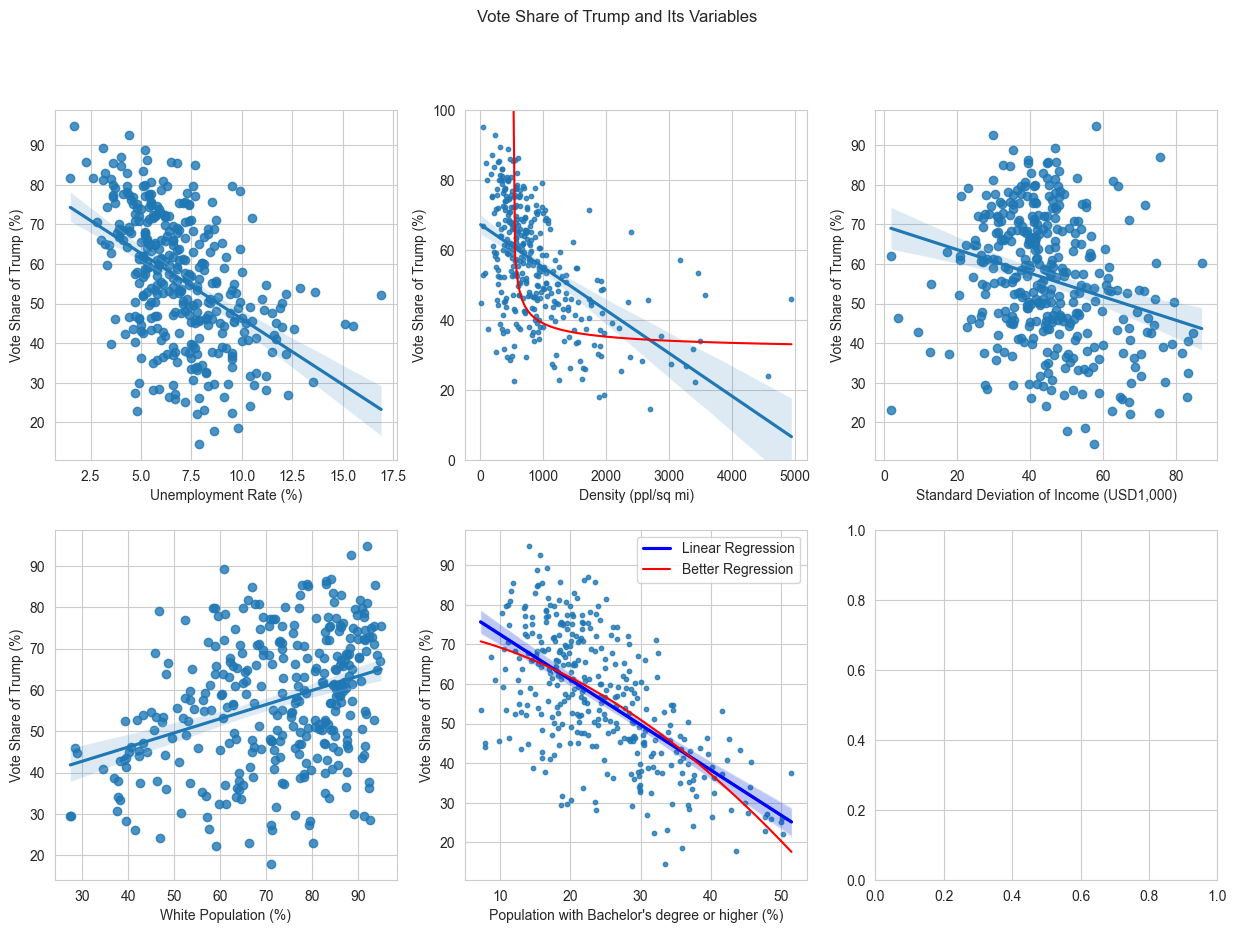

In [164]:
df_1 = df_vote_share.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['Vote Share of Trump (%)', 'Standard Deviation of Income (USD1,000)', 'Unemployment Rate (%)', "Bachelor's degree or higher (%)", ])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

# Regression plot with Unemployment Rate
sns.regplot(x='Unemployment Rate (%)', y='Vote Share of Trump (%)', data=df_2, ax=ax1)
ax1.set_xlabel('Unemployment Rate (%)')
ax1.set_ylabel('Vote Share of Trump (%)')

def func(x, a, b, c, d):
    return a / (x - b)**c + d

# initial guess for parameters
p0 = [200, 500, 0.5, 30]

# Fit the curve to the data
popt, pcov = curve_fit(func, df_2['Density (ppl/sq mi)'], df_2['Vote Share of Trump (%)'], p0=p0)

# Create a scatter plot with the curve fit
sns.regplot(x='Density (ppl/sq mi)', y='Vote Share of Trump (%)', data=df_2, ax=ax2, scatter_kws={'s': 10})
x_vals = np.linspace(df_2['Density (ppl/sq mi)'].min(), df_2['Density (ppl/sq mi)'].max(), 100)
y_vals = func(x_vals, *popt)
ax2.plot(x_vals, y_vals, 'r-', label='curve fit')

# Set the x- and y-axis labels
ax2.set_xlabel("Density (ppl/sq mi)")
ax2.set_ylabel('Vote Share of Trump (%)')
ax2.set_ylim([0,100])

# Set the x- and y-axis labels
ax2.set_xlabel("Density (ppl/sq mi)")
ax2.set_ylabel('Vote Share of Trump (%)')

# Regression plot with Standard Deviation of Income
sns.regplot(x='Standard Deviation of Income (USD1,000)', y='Vote Share of Trump (%)', data=df_2, ax=ax3)
ax3.set_xlabel('Standard Deviation of Income (USD1,000)')
ax3.set_ylabel('Vote Share of Trump (%)')

# Regression plot with White Population
sns.regplot(x="White Population (%)", y='Vote Share of Trump (%)', data=df_2, ax=ax4)
ax4.set_xlabel("White Population (%)")
ax4.set_ylabel('Vote Share of Trump (%)')

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x="Bachelor's degree or higher (%)", y='Vote Share of Trump (%)', data=df_2, ax=ax5, scatter_kws={'s': 10})
sns.regplot(x="Bachelor's degree or higher (%)", y='Vote Share of Trump (%)', data=df_2, ax=ax5, scatter=False, line_kws={'color': 'blue'}, label='Linear Regression')
ax5.legend()
ax5.set_xlabel("Population with Bachelor's degree or higher (%)")
ax5.set_ylabel('Vote Share of Trump (%)')

# Fit a second-order polynomial to the data for ax5
x = df_2["Bachelor's degree or higher (%)"]
y = df_2["Vote Share of Trump (%)"]
coeffs = np.polyfit(x, y, 2)

# Generate points for the curve
x_curve = np.linspace(x.min(), x.max(), 100)
y_curve = coeffs[0] * x_curve**2 + coeffs[1] * x_curve + coeffs[2]

# Plot the curve
ax5.plot(x_curve, y_curve, color='red', label='Better Regression')
ax5.legend()

plt.suptitle("Vote Share of Trump and Its Variables")

plt.show()

zsRecall that the average annual income is positively correlated to VEP Turnout Rate, but here the annual income standard deviation is negatively correlated with vote share of Trump. This combination indicates that when the state gets wealthier, on one side, the average annual income increases, then the VEP Turnout Rate increase, which means the candidates will receive more effective votes. On the other side, the annual income standard deviation

### Solid Indicator ~ white population/total population, bachelor's degree or higher (age over 18), # of campaigns hosted

Formula for Solid indicator:
$$ \text{Solid Indicator} = \frac{|\text{Votes for Trump} - \text{Votes for Biden}|}{\text{Votes for other candidates}}$$


The solid indicator captures the likelihood of an electoral district staying solid to either Trump or Biden during the election.

The indicator number has no special meaning, the ranking matters (ordinal not cardinal). Higher solid indicator means either Trump or Biden is in the dominant position, and it is unlikely that pulling more voters to the submissive side is going to change the result of election. Lower polarization indicator means there are plenty of voters that could be pulled to either side of Trump and Biden and make a change on the election.

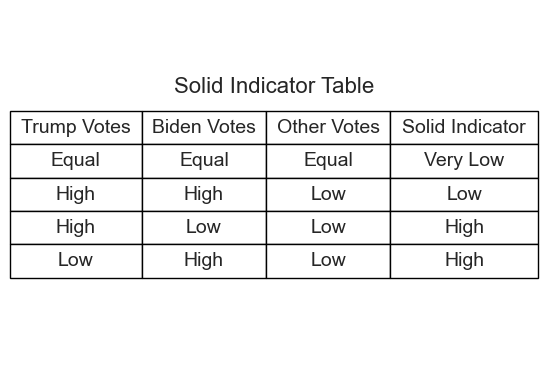

In [165]:
solid_table = {
    'Trump Votes': ['Equal', 'High', 'High', 'Low'],
    'Biden Votes': ['Equal', 'High', 'Low', 'High'],
    'Other Votes': ['Equal', 'Low', 'Low', 'Low'],
    'Solid Indicator': ['Very Low', 'Low', 'High', 'High'],
}

# Create a DataFrame from the dictionary
df_solid_table = pd.DataFrame(solid_table)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=df_solid_table.values, colLabels=df_solid_table.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(df_solid_table.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Solid Indicator Table'
plt.text(0, 0.035, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# Show the plot
plt.show()

In [166]:
df_solid = df_vote_share.copy()
df_solid = pd.merge(df_county_polar, df_solid, on=['state','county'], how='left')
df_solid = pd.merge(df_solid, df_rallies, on=['state', 'county'], how='left')
df_solid['# of 2020 Trump Presidential Campaigns'] = df_solid['# of 2020 Trump Presidential Campaigns'].fillna(0)
df_solid = pd.merge(df_solid, df_county_turnout[['state', 'county', 'VEP Turnout Rate (%)']], on=['state', 'county'], how='left')
df_solid.head()

state   county  Solid Indicator     candidate party   won  won_votes  \
0  Alabama  Autauga         3.358739  Donald Trump   REP  True    19838.0   
1  Alabama  Baldwin         3.634200           NaN   NaN   NaN        NaN   
2  Alabama  Barbour         2.310057  Donald Trump   REP  True     5622.0   
3  Alabama     Bibb         4.188752           NaN   NaN   NaN        NaN   
4  Alabama   Blount         4.533960           NaN   NaN   NaN        NaN   

   county_total_votes  Vote Share of Trump (%)      lat      lng  \
0             27770.0                71.436802  32.4597 -86.4573   
1                 NaN                      NaN      NaN      NaN   
2             10518.0                53.451226  31.9102 -85.1505   
3                 NaN                      NaN      NaN      NaN   
4                 NaN                      NaN      NaN      NaN   

   Density (ppl/sq mi)  effective_voting_rate  population    Mean  Median  \
0                399.0              75.876390     42496.0  63.066  57.698   
1                  NaN                    NaN         NaN     NaN     NaN   
2                 77.0              88.550261     19804.0  37.725  19.528   
3                  NaN                    NaN         NaN     NaN     NaN   
4                  NaN                    NaN         NaN     NaN     NaN   

   Standard Deviation of Income (USD1,000)  Bachelor's degree or higher (%)  \
0                                   41.175                        26.668392   
1                                      NaN                              NaN   
2                                   43.789                        10.861442   
3                                      NaN                              NaN   
4                                      NaN                              NaN   

  State_ab  Labor Force  Employed  Unemployed  Unemployment Rate (%)  \
0       AL      26405.0   24985.0      1420.0                    5.4   
1      NaN          NaN       NaN         NaN                    NaN   
2       AL       8680.0    8004.0       676.0                    7.8   
3      NaN          NaN       NaN         NaN                    NaN   
4      NaN          NaN       NaN         NaN                    NaN   

   White Population (%)  const  # of 2020 Trump Presidential Campaigns  \
0             73.609146    1.0                                     0.0   
1                   NaN    NaN                                     0.0   
2             47.591139    1.0                                     0.0   
3                   NaN    NaN                                     0.0   
4                   NaN    NaN                                     0.0   

   VEP Turnout Rate (%)  
0             64.988449  
1             62.628836  
2             54.431188  
3             57.020820  
4             63.311176

Regression for Solid Indicator:

In [167]:
df_solid['const'] = 1
var1 = 'Vote Share of Trump (%)'
var2 = "White Population (%)"
var3 = "Unemployment Rate (%)"
var4 = "VEP Turnout Rate (%)"
reg1 = sm.OLS(endog = df_solid['Solid Indicator'],
              exog = df_solid[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_solid['Solid Indicator'],
              exog = df_solid[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_solid['Solid Indicator'],
              exog = df_solid[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_solid['Solid Indicator'],
              exog = df_solid[['const', var1, var2, var3, var4]], missing = 'drop')
result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
stargazer = Stargazer([result1, result2, result3, result4])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4'], [1,1,1,1])
stargazer.title("Regression Results")
HTML(stargazer.render_html())

From our results, we see that Model 4 have the best explanatory power:

- The intercept $ \hat{\beta}_0 = 24.332 $.
- The leading coefficient $ \hat{\beta}_1 = -0.945 $.
- The negative $ \hat{\beta}_1 $ parameter estimate implies that number of 2020 Trump presidential campaign is negatively associated with Solid Indicator.
- The leading coefficient $ \hat{\beta}_2 = -0.571 $.
- The negative $ \hat{\beta}_2 $ parameter estimate implies that the VEP Turnout Rate is negatively associated with Solid Indicator
- The leading coefficient $ \hat{\beta}_3 = 0.319 $.
- The positive $ \hat{\beta}_3 $ parameter estimate implies that educational attainment is positively associated with the Solid Indicator
- The leading coefficient $ \hat{\beta}_4 = 0.167 $.
- The positive $ \hat{\beta}_4 $ parameter estimate implies that proportion of single race population is positively associated with the Solid Indicator
- The F-statistic of 12.954 has a df of 4 and 45, implies that the test was performed with four groups and that there is a significant difference between the variances of at least three of the groups.
- The p-value corresponding to the F-statistic implies that the effect of the three variables on Solid Indicator is statistically significant (using p < 0.01 as a rejection rule).
- The R-squared value of 0.535 indicates that around 53.5% of variation in Solid Indicator is explained by number of 2020 Trump presidential campaign, VEP Turnout Rate, educational attainment, and proportion of single race population.

Using Model 4 for our parameter estimates, we can now write our estimated relationship as

$$
\widehat{\text{Solid Indicator}}_i = 24.332 - 0.945 \ {\text{# of 2020 Presidential Campaigns}}_i - 0.571 \ {\text{VEP Turnout Rate}}_i - 0.945 \ {\text{Proportion with Bachelor's degree or higher}}_i - 4.16 \ {\text{Proportion of Single Race Population}}_i
$$

From the above analysis and the R-squared values, the models suggests that annual income standard deviation has the highest explanatory power (63.4%) to the variation in the vote share of Trump. Overall, all three variables deliver strong estimation of vote share of Trump. An interesting finding from the data is that the predictive power of from the educational attainment and unemployment rate includes and surpasses that of annual income standard deviation. This could make economic sense as education and unemployment rate are important economic indicators that affect the standard deviation in people's income. Higher levels of education tend to lead to higher income and better job opportunities, while lower levels of education are associated with higher unemployment rates and lower income. Therefore, it would be reasonable to leave out income standard deviation and focus more on the other indepedent variables.

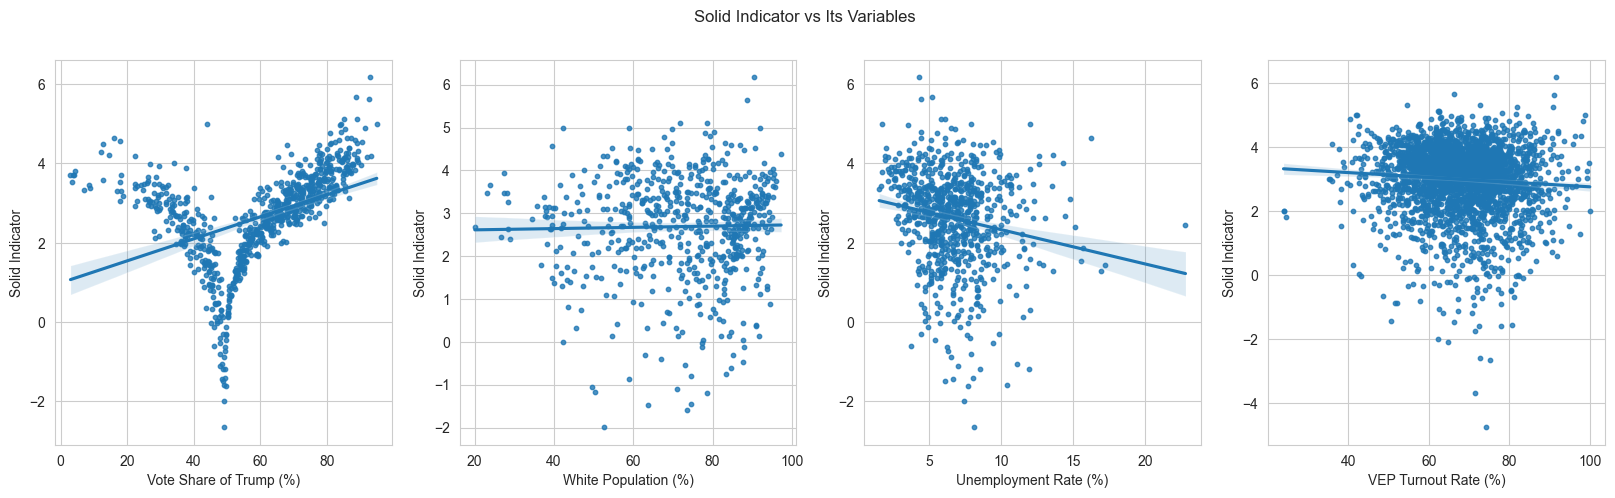

In [168]:
df_1 = df_solid.copy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))

var1 = 'Vote Share of Trump (%)'
var2 = "White Population (%)"
var3 = "Unemployment Rate (%)"
var4 = "VEP Turnout Rate (%)"

# Reciprocal regression plot with Annual Income Standard Deviation
sns.regplot(x=var1, y='Solid Indicator', data=df_1, ax=ax1, scatter_kws={'s': 10})
ax1.set_xlabel(var1)
ax1.set_ylabel('Solid Indicator')

# Regression plot with Unemployment Rate
sns.regplot(x=var2, y='Solid Indicator', data=df_1, ax=ax2, scatter_kws={'s': 10})
ax2.set_xlabel(var2)
ax2.set_ylabel('Solid Indicator')

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var3, y='Solid Indicator', data=df_1, ax=ax3, scatter_kws={'s': 10})
ax3.set_xlabel(var3)
ax3.set_ylabel('Solid Indicator')

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var4, y='Solid Indicator', data=df_1, ax=ax4, scatter_kws={'s': 10})
ax4.set_xlabel(var4)
ax4.set_ylabel('Solid Indicator')

plt.suptitle("Solid Indicator vs Its Variables")

plt.show()

In the 95% confidence interval of last two graphs, it is clear that there is a big chance that true regression line may have a positive slope or negative slope. Therefore, it is very unlikely that the Solid Indicator is correlated with education attainment and the proportion. The reason why I believe this regression is meaningful is that there are arguments against and for the relationship between citizen's educational attainment and political polarization. Researchers who believe they are positively correlated argue that due to people's increased capacity in understanding information and critical thinking, they are more likely to engage in politically motivated reasoning (Kahan et al., 2017). In contrast, the opponent argue that the people gone through higher education are less likely to be emotionally incited by politicians and propaganda, therefore less likely to take a firm stance anywhere of political spectrum. Here in the

### Polarization Indicator ~ median of % Trump vote share in counties, log of median of county population, # of counties

Formula of Polarization Indicator
$$ \text{Polarization Indicator} = \frac{|(\text{Votes for Trump} - \text{Votes for other candidates})(\text{Votes for Biden} - \text{Votes for other candidates})|}{\text{Total Votes}}$$

This is an indicator of a highly contentious and divisive political environment, where different groups have strongly opposing views and are unwilling to compromise.

The indicator number has no special meaning, the ranking matters (ordinal not cardinal). Higher polarization indicator means Trump and Biden are in fierce competition, suggests that the voters in that district or state are deeply divided, with significant support for both Trump and Biden. Lower polarization indicator means there is a lower level of political division within the electoral district.

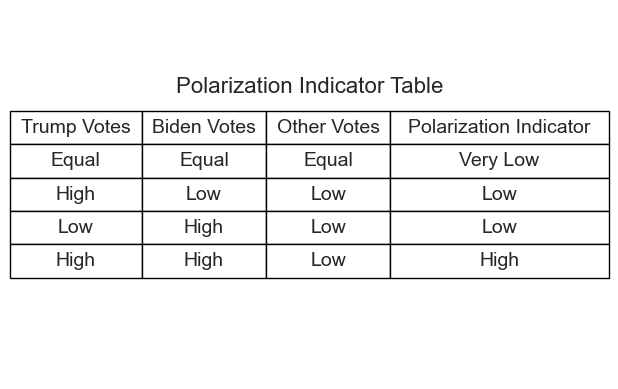

In [169]:
polar_table = {
    'Trump Votes': ['Equal', 'High', 'Low', 'High'],
    'Biden Votes': ['Equal', 'Low', 'High', 'High'],
    'Other Votes': ['Equal', 'Low', 'Low', 'Low'],
    'Polarization Indicator': ['Very Low', 'Low', 'Low', 'High'],
}

# Create a DataFrame from the dictionary
df_polar_table = pd.DataFrame(polar_table)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=df_polar_table.values, colLabels=df_polar_table.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(df_polar_table.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Polarization Indicator Table'
plt.text(0, 0.035, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# Show the plot
plt.show()

We are going to investigate the polarization indicator from

In [170]:
df_polarization = df_solid.copy()
df_polarization = pd.merge(df_polarization, df_pivot[['state', 'county', 'Polarization Indicator']], on=['state', 'county'], how='left')
df_polarization.head()

state   county  Solid Indicator     candidate party   won  won_votes  \
0  Alabama  Autauga         3.358739  Donald Trump   REP  True    19838.0   
1  Alabama  Baldwin         3.634200           NaN   NaN   NaN        NaN   
2  Alabama  Barbour         2.310057  Donald Trump   REP  True     5622.0   
3  Alabama     Bibb         4.188752           NaN   NaN   NaN        NaN   
4  Alabama   Blount         4.533960           NaN   NaN   NaN        NaN   

   county_total_votes  Vote Share of Trump (%)      lat      lng  \
0             27770.0                71.436802  32.4597 -86.4573   
1                 NaN                      NaN      NaN      NaN   
2             10518.0                53.451226  31.9102 -85.1505   
3                 NaN                      NaN      NaN      NaN   
4                 NaN                      NaN      NaN      NaN   

   Density (ppl/sq mi)  effective_voting_rate  population    Mean  Median  \
0                399.0              75.876390     42496.0  63.066  57.698   
1                  NaN                    NaN         NaN     NaN     NaN   
2                 77.0              88.550261     19804.0  37.725  19.528   
3                  NaN                    NaN         NaN     NaN     NaN   
4                  NaN                    NaN         NaN     NaN     NaN   

   Standard Deviation of Income (USD1,000)  Bachelor's degree or higher (%)  \
0                                   41.175                        26.668392   
1                                      NaN                              NaN   
2                                   43.789                        10.861442   
3                                      NaN                              NaN   
4                                      NaN                              NaN   

  State_ab  Labor Force  Employed  Unemployed  Unemployment Rate (%)  \
0       AL      26405.0   24985.0      1420.0                    5.4   
1      NaN          NaN       NaN         NaN                    NaN   
2       AL       8680.0    8004.0       676.0                    7.8   
3      NaN          NaN       NaN         NaN                    NaN   
4      NaN          NaN       NaN         NaN                    NaN   

   White Population (%)  const  # of 2020 Trump Presidential Campaigns  \
0             73.609146      1                                     0.0   
1                   NaN      1                                     0.0   
2             47.591139      1                                     0.0   
3                   NaN      1                                     0.0   
4                   NaN      1                                     0.0   

   VEP Turnout Rate (%)  Polarization Indicator  
0             64.988449                0.268157  
1             62.628836                0.306877  
2             54.431188                0.126358  
3             57.020820                0.426677  
4             63.311176                0.996052

In [172]:
df_polarization['const'] = 1

var1 = "Standard Deviation of Income (USD1,000)"
var2 = "Unemployment Rate (%)"
var3 = "VEP Turnout Rate (%)"
var4 = 'Vote Share of Trump (%)'

reg1 = sm.OLS(endog = df_polarization['Polarization Indicator'],
              exog = df_polarization[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_polarization['Polarization Indicator'],
              exog = df_polarization[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_polarization['Polarization Indicator'],
              exog = df_polarization[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_polarization['Polarization Indicator'],
              exog = df_polarization[['const', var4]], missing = 'drop')
result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
stargazer = Stargazer([result1, result2, result3, result4])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4'], [1,1,1,1])
stargazer.title("Regression Results")
stargazer.covariate_order(['Vote Share of Trump (%)', "Standard Deviation of Income (USD1,000)", "Unemployment Rate (%)", "VEP Turnout Rate (%)"])
HTML(stargazer.render_html())

In [ ]:
df_1 = df_polarization.copy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))

var1 = 'Vote Share of Trump (%)'
var2 = "White Population (%)"
var3 = "Unemployment Rate (%)"
var4 = "VEP Turnout Rate (%)"

# Reciprocal regression plot with Annual Income Standard Deviation
sns.regplot(x=var1, y='Polarization Indicator', data=df_1, ax=ax1, scatter_kws={'s': 10})
ax1.set_xlabel(var1)
ax1.set_ylabel('Polarization Indicator')

# Regression plot with Unemployment Rate
sns.regplot(x=var2, y='Polarization Indicator', data=df_1, ax=ax2, scatter_kws={'s': 10})
ax2.set_xlabel(var2)
ax2.set_ylabel('Polarization Indicator')

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var3, y='Polarization Indicator', data=df_1, ax=ax3, scatter_kws={'s': 10})
ax3.set_xlabel(var3)
ax3.set_ylabel('Polarization Indicator')

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var4, y='Polarization Indicator', data=df_1, ax=ax4, scatter_kws={'s': 10})
ax4.set_xlabel(var4)
ax4.set_ylabel('Polarization Indicator')

plt.suptitle("Polarization Indicator vs Its Variables")

plt.show()

# Machine Learning

In [ ]:
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import tree
import plotly.graph_objects as go
import qeds

In [ ]:
X = df_polarization.drop(["state"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)

X = X.dropna()
X.head()

In [ ]:
y = list(X["Vote Share of Trump (%)"])

In [ ]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)

In [ ]:
y_pred_linear = lr_model.predict(X)
#from sklearn import metrics
full_mse = metrics.mean_squared_error(y, y_pred_linear)
print('Mean Squared Error:', full_mse)

Regression Tree

In [ ]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

In [ ]:
# use the fitted tree to predict
y_pred_tree = sqft_tree.predict(X)

# find the error of prediction (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

In [ ]:
sqrf_fig = plt.figure(figsize=(20,10))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True, fontsize = 12)

In [ ]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

RandomForest

In [ ]:
regr2 = RandomForestRegressor(max_features=2, random_state=1)
regr2.fit(X, y)
pred = regr2.predict(X)
mean_squared_error(y, pred)

# Regression Tree for Random Forest
n = 1000
Xsim = np.random.rand(n,2)
def Ey_x(x):
    return 1/3*(np.sin(5*x[0])*np.sqrt(x[1])*np.exp(-(x[1]-0.5)**2))
#np.apply_along_axis applys a function (Ey_x here) to 1-D slices along the given axis which is Xsim here
ysim = np.apply_along_axis(Ey_x, 1, Xsim) + np.random.randn(n)*0.1

qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE

#defining a 3D scatter plot to show the data
def surface_scatter_plot(X,y,f, xlo=0., xhi=1., ngrid=50,
                         width=860, height=700, f0=Ey_x, show_f0=False):
    scatter = go.Scatter3d(x=X[:,0],y=X[:,1],z=y,
                           mode='markers',
                           marker=dict(size=2, opacity=0.3)
    )
    xgrid = np.linspace(xlo,xhi,ngrid)
    ey = np.zeros((len(xgrid),len(xgrid)))
    ey0 = np.zeros((len(xgrid),len(xgrid)))
    colorscale = [[0, colors[0]], [1, colors[2]]]
    for i in range(len(xgrid)):
        for j in range(len(xgrid)):
            ey[j,i] = f([xgrid[i],xgrid[j]])
            ey0[j,i]= f0([xgrid[i],xgrid[j]])
    surface = go.Surface(x=xgrid, y=xgrid, z=ey, colorscale=colorscale, opacity=1.0)
    if (show_f0):
        surface0 = go.Surface(x=xgrid, y=xgrid, z=ey0, opacity=0.8, colorscale=colorscale)
        layers = [scatter, surface, surface0]
    else:
        layers = [scatter, surface]
    fig = go.FigureWidget(
        data=layers,
        layout = go.Layout(
            autosize=True,
            scene=dict(
                xaxis_title='X1',
                yaxis_title='X2',
                zaxis_title='Y'
            ),
            width=width,
            height=height,
            template=plotly_template,
        )
    )
    return fig

fig = surface_scatter_plot(Xsim, ysim, Ey_x)
fig

fitted_tree = tree.DecisionTreeRegressor(max_depth=3).fit(Xsim,ysim)
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(fitted_tree, feature_names=["var1", "var2"], filled=True)


## Conclusion
In conclusion, the results of the four different electoral systems applied to the same election data reveal the significance of the electoral process in determining the outcome of an election. The outcome can vary greatly depending on the specific system being used. In this case, Joe Biden was declared the winner under Electoral System I, where each county was allotted the same number of votes as its number of voters and all votes were cast for the candidate who won the majority of votes in that county. On the other hand, Donald Trump was declared the winner in the remaining three systems - Electoral System II, III, and IV.

In [ ]:
result_4 = [['I', 'Joe Biden'],
            ['II', 'Donald Trump'],
            ['III', 'Donald Trump'],
            ['IV', 'Donald Trump']]
pd.DataFrame(result_4, columns = ['Electoral System', 'Winner'])

 This highlights the importance of choosing an appropriate electoral system that aligns with the values and goals of a given society. It also demonstrates how different electoral systems can have a significant impact on the representation of different regions, communities, and individuals. The analysis shows that the design of an electoral system can greatly influence the outcome of an election and should be carefully considered.

The differences in funding received by Trump and Biden in different sectors also suggest the complex interplay between policy positions, industry interests, and political strategy in the 2020 US Presidential election. It underscores the importance of money and resources in modern political campaigns and reflects the changing dynamics of American politics.

This research paper also highlights the need for ongoing research into the role of outside groups in political campaigns, particularly in the context of the increasing influence of money and resources.